<div style="background-color: #2020D1; padding: 40px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🏦 CREDIT RISK PREDICTION WITH FEATURES EXTRACT FROM MULTI-LAYER NEURAL NETWORK </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;">Precision: 0.9995 &nbsp;&nbsp; Accuracy: 0.9963	</p>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTitfBKMcp-K-Yu_9wTbUVAro0EzqSyCVIVUw&usqp=CAU" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- Bank Money Theme -->
<div style="border-radius: 0px; border: 2px solid #2020ff; padding: 15px; background-color: #2020d1; font-size: 120%; text-align: center; color: #FFFFFF; font-weight: bold;">
   Table of Contents
</div>


* [1. 💾 Import Libraries](#1.-Import-Libraries)

* [2. 📑 Read and Explain Dataset](#2.-Read-and-Explain-Dataset)

* [3. 📊 Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

* [4. 🎯 Dealing with Outliers](#4.-Dealing-with-Outliers)

* [5. 🛠️ Data Preprocessing](#5.-Data-Preprocessing)

* [6. 🤖 Build Multi layer Graphs](#6.-Build-Multi-layer-Graphs)

* [7. 💡 Feature Engineering](#7.-Feature-Engineering)

    * [7.1. ⤴️ Extract Features from Multi-layer Graphs](#7.1.-Extract-Features-From-Multi-Layer-Graphs)
    
    * [7.2. ⤴️ Extract Features from Modality Graphs](#7.1.-Extract-Features-From-Modality-Graphs)

* [8. 🌴 ML Classification Models](#8.-ML-Classification-Models)

* [9. 🚀 Visualization Of Statistic Results](#9.-Visualization-Of-Statistic-Results)

* [10. 〽️ Summary](#10.-Summary)


## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">1. Import Libraries</div>

In [1]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
#import shap

# modeling
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#from catboost import CatBoostClassifier
#import lightgbm as lgb
#from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,accuracy_score,f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# graph
import networkx as nx
from pyvis.network import Network

# utils functions
import time
import collections

# saving
import joblib

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")



## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">2. Read and Explain Dataset</div>

In [2]:
#Read data for AFB Loan
data_original =  pd.read_csv("./datasets/credit_risk_dataset.csv")
data = data_original.drop(['loan_grade'], axis=1) # remove loan grade which is a feature build from loan_status dimension so  ot useful
prefix = 'GERMAN'

<div style="background-color: #2020d1; padding: 10px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #FFFFFF; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;; color: #2026d1">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


## <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">3. Exploratory Data Analysis</div>

In [3]:
data.shape

(32581, 11)

In [4]:
data.head().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [5]:
data.tail().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [6]:
data.describe().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [10]:
data.duplicated().sum()

165

**Observations: Il existe 573 exemples qui n'ajoute aucune connaissance au jeu de données car sont des replications**

In [11]:
data.corr().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

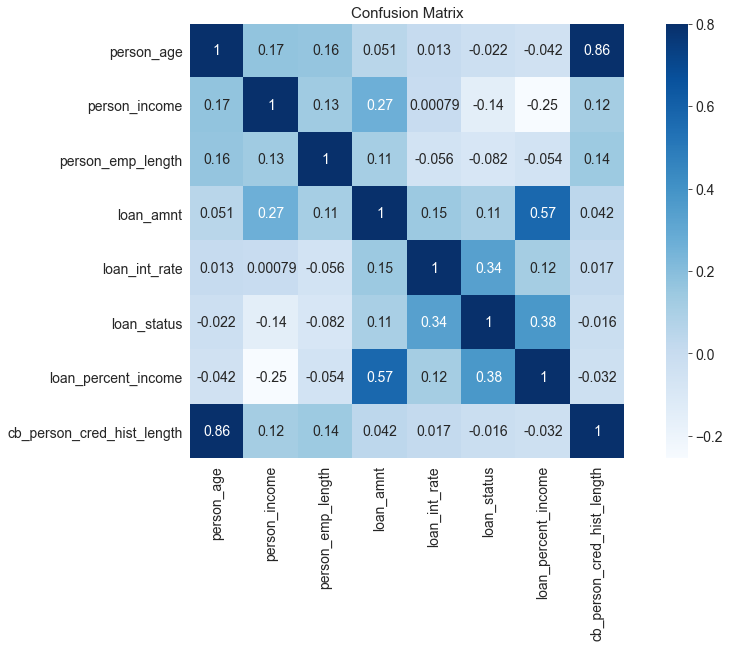

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

In [3]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#2020d1; color: #FFFFFF;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')


In [4]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in data.columns.tolist()}

multi_table([nunique_df[col] for col in data.columns.tolist()])

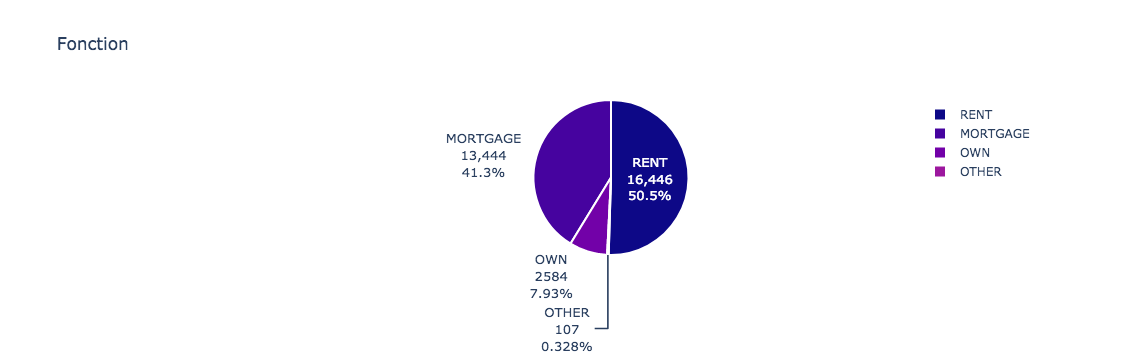

In [15]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Plasma,
          title= 'Fonction'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#2020d1', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_person_home_ownership_pie_'+timestr+'.png'
fig.write_image(filename1, scale=1.5) #.png,.pdf will also support here
fig.show()

**Observations: Les demandeurs de prêt les plus important sont d'abord Les FONCTIONNAIRES, puis les EMPLOYESECTUERPRIVE et enfin les PROFESSEUR**


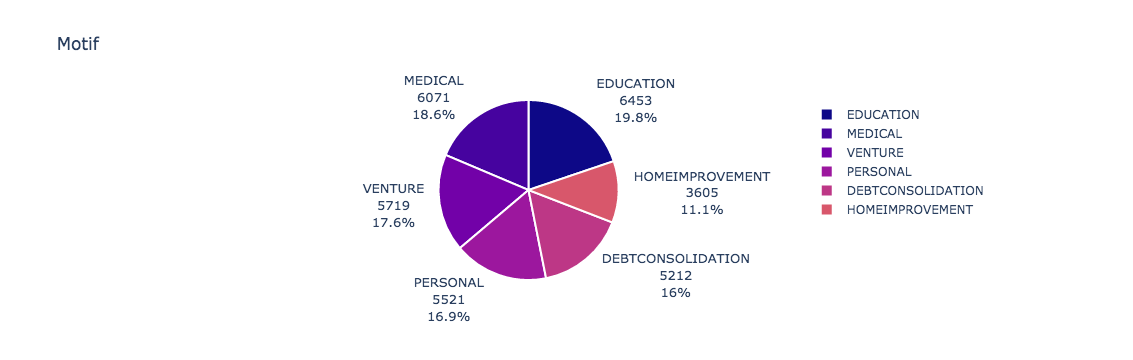

In [16]:
level_counts=data.loan_intent.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Plasma,
          title= 'Motif'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#2020d1', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_loan_intent_pie_'+timestr+'.png'
fig.write_image(filename1, scale=1.5)  #.png,.pdf will also support here
fig.show()

**Observations: CMTCONSOMMATION possède 42.5% des motifs de demande de prêt et CCTPRETSCOLAIRE 21.9%**

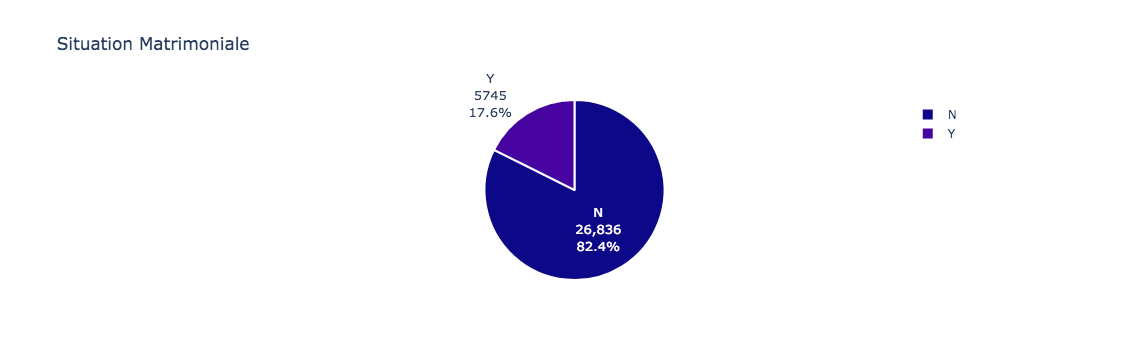

In [17]:
level_counts=data['cb_person_default_on_file'].value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Plasma,
          title= 'Situation Matrimoniale'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#2020d1', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_cb_person_default_on_file_pie_'+timestr+'.png'
fig.write_image(filename1, scale=1.5)  #.png,.pdf will also support here
fig.show()

**Observations: La plupart des demandeurs de prêt sont des célibataires**

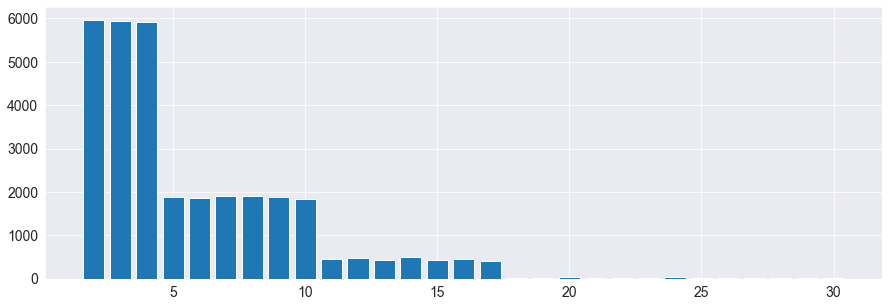

In [18]:
verti = data['cb_person_cred_hist_length'].value_counts().values
hori = data['cb_person_cred_hist_length'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_cb_person_cred_hist_length_bar_'+timestr+'.png'
plt.savefig(filename1,dpi=1000) #.png,.pdf will also support here
plt.show()
# after 80 it is rare

**Observations: La plupart des demandeurs de prêt sont des jeunes de la tranche 30-40 ans**

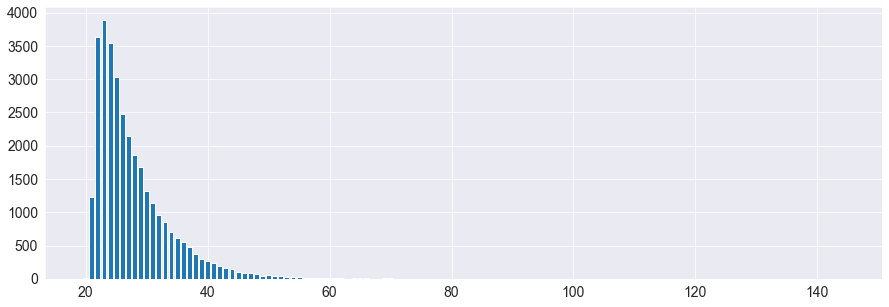

In [19]:
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_person_age_bar_'+timestr+'.png'
plt.savefig(filename1,dpi=1000) #.png,.pdf will also support here
plt.show()
# after 80 it is rare

**Observations: La durée de prêt la plus fréquente est celle de 10 mois**

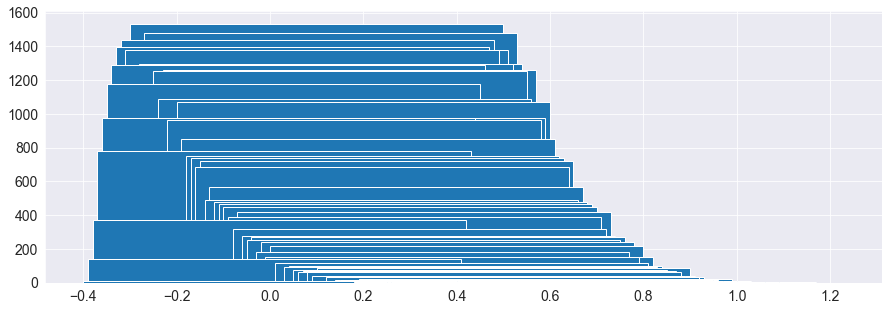

In [20]:
verti = data['loan_percent_income'].value_counts().values
hori = data['loan_percent_income'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/german_loan_percent_income_bar_'+timestr+'.png'
plt.savefig(filename1,dpi=1000) #.png,.pdf will also support here
plt.show()
# after 80 it is rare

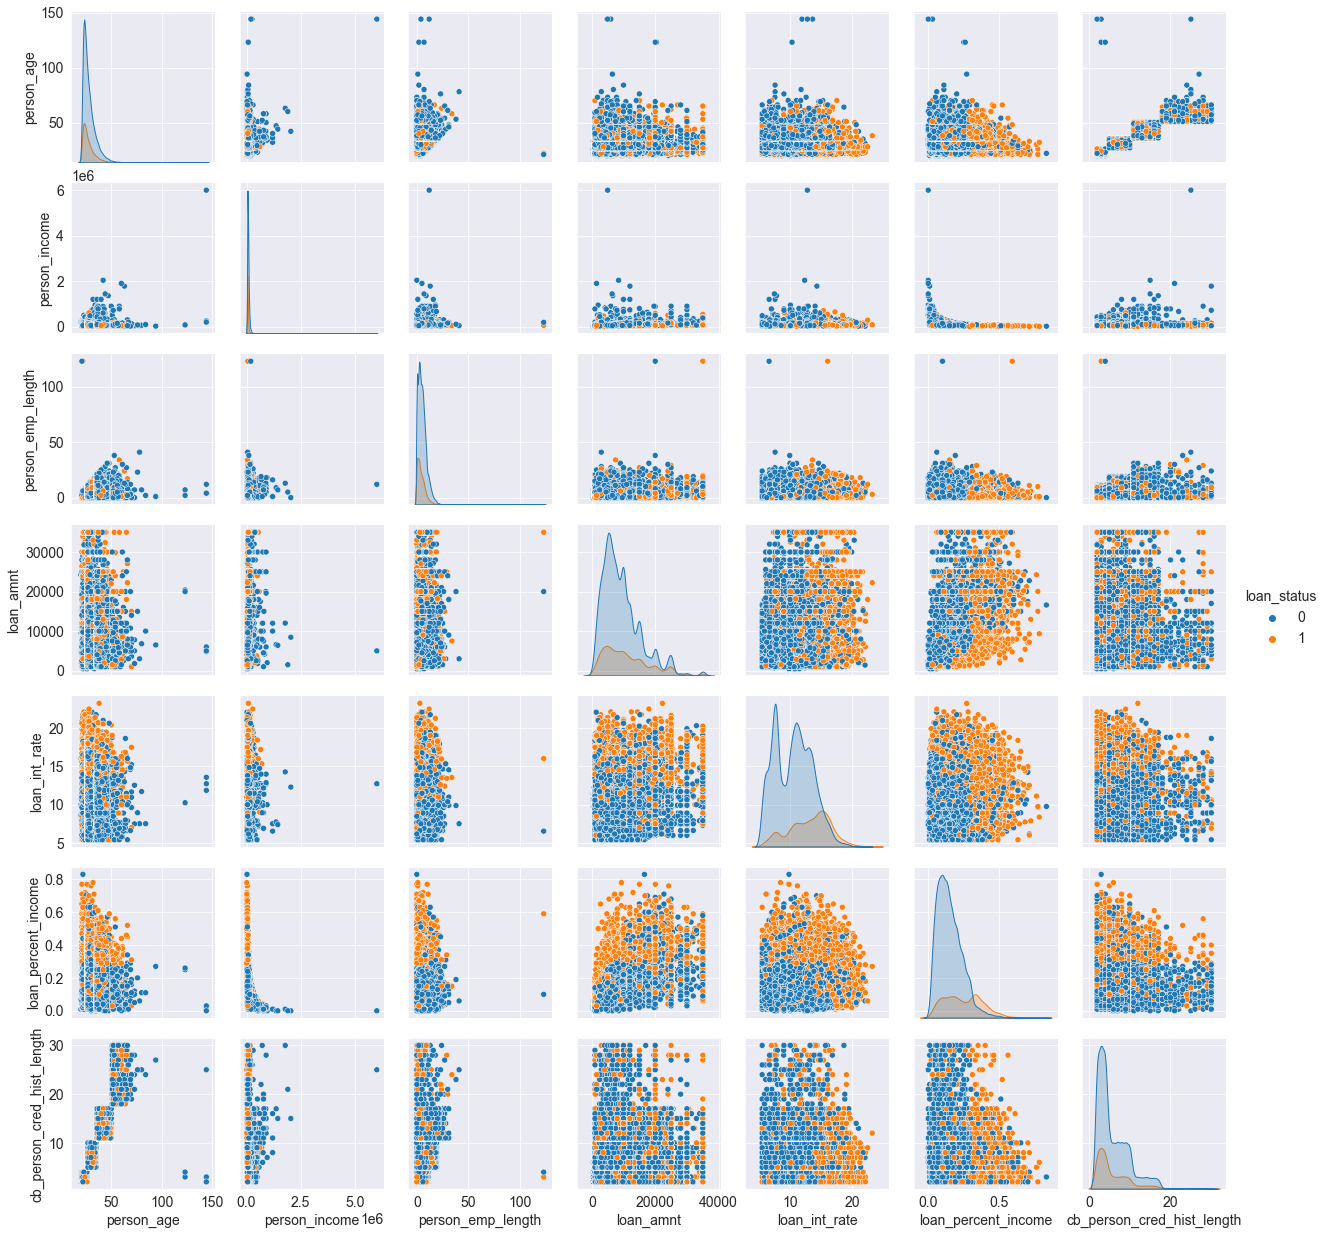

In [22]:
sns.pairplot(data,hue="loan_status")

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">4. Dealing with Outliers</div>

In [23]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Observations: Il n'existe pas de valeur manquante dans le jeu de données**

In [24]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].quantile(0.5))
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].quantile(0.5))

In [25]:
data['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

**Observations: La classe des prêts impayés est insignifiante et necessite un équilibrage**

In [26]:
data.reset_index(inplace = True)

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">5. Data Preprocessing</div>


In [3]:
col_list = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length']


ordinal_factor_colums = []

nominal_factor_colums = [
    'person_home_ownership',
    'loan_intent',
    'cb_person_default_on_file'
]

numeric_uniform_colums = [
    'loan_amnt',
    'loan_int_rate',
    'person_income',
    'loan_percent_income']

numeric_with_outliers_columns = [
    'person_age',
    'person_emp_length',
    'cb_person_cred_hist_length']

check = ordinal_factor_colums.copy()
check.extend(nominal_factor_colums)
check.extend(numeric_uniform_colums)
check.extend(numeric_with_outliers_columns)
print("Good") if len(list(set(col_list)-set(check)) if len(check) <= len(col_list) else list(set(check)-set(col_list))) == 1 else print(f"Error")

Good


In [28]:
def numeric_standardization_with_outliers(data, variables_list):
    """Use IQR to standardize dimension with extrem values
    Args:
      data: A dataframe containing the dimension to standardize
      variables_list: List of dimension on which apply the standardization aware outliers

    Returns:
      The new dataframe with all dimension standardized.
    """
    
    dataframe = data.copy()
    # 1) for each variable
    for var in variables_list:
        # a) compute Q1 and Q3
        Q1 = dataframe[var].quantile(0.25)
        Q3 = dataframe[var].quantile(0.75)
        # b) compute IQR
        IQR = Q3 - Q1
        # c) compute sup and inf
        sup = Q3 + (1.5 * IQR)
        inf = Q1 - (1.5 * IQR)
        for line in dataframe.index.values.tolist():
            # if less than inf
            if dataframe.loc[line, var] < inf:
                dataframe.loc[line, var] = inf/sup
            # else greater than sup
            elif dataframe.loc[line, var] > sup:
                dataframe.loc[line, var] = 1
            # else
            else:
                dataframe.loc[line, var] = dataframe.loc[line, var]/sup
    return dataframe


In [29]:
def numeric_uniform_standardization(data, variables_list):
    """Use max division standardize dimension
    Args:
      data: A dataframe containing the dimension to standardize
      variables_list: List of dimension on which apply the standardization

    Returns:
      The new dataframe with all dimension standardized.
    """
    
    dataframe = data.copy()
    # 1) for each variable
    for var in variables_list:
        # get maximum value
        maxi = dataframe[var].max()
        dataframe[var] = dataframe[var]/maxi
    return dataframe



In [30]:
def ordinal_factor_encoding(data, variables_list):
    """Apply LabelEncoding on ordinal factor dimension
    Args:
      data: A dataframe containing the dimension to standardize
      variables_list: List of dimension on which apply the encode

    Returns:
      The new dataframe with all dimension encoded.
    """
    
    dataframe = data.copy()
    from sklearn.preprocessing import LabelEncoder
    # 1) for each variable
    for var in variables_list:
        label_encoder = LabelEncoder()
        dataframe[var] = label_encoder.fit_transform(dataframe[var])
    return dataframe



In [4]:
def nominal_factor_encoding(data, variables_list):
    """Apply One Hot Encoding (OHE) on ordinal factor dimension
    Args:
      data: A dataframe containing the dimension to standardize
      variables_list: List of dimension on which apply the OHE

    Returns:
      The new dataframe with all dimension standardized.
    """
    
    dataframe = data.copy()
    ohe = OneHotEncoder()
    ohe.fit(dataframe[variables_list])
    merge_ohe_col = np.concatenate((ohe.categories_)) # list of all new dimension names
    ohe_data = pd.DataFrame(ohe.transform(dataframe[variables_list]).toarray(), columns=merge_ohe_col) # make the one hot encoding and save the result inside a temp source
    dataframe = pd.concat([ohe_data, dataframe], axis=1) #  concat existing and news columns dimensions
    dataframe = dataframe.drop(variables_list, axis=1) # remove all nominal unencoded dimensions
    return (dataframe, ohe.categories_)



In [5]:
def save_model(clf, clf_name):
    """Save model
    Args:
      clf: An instance of model
      clf_name: their name

    Returns:
      None
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './model_storage/'+prefix+'_'+clf_name+'_'+timestr+'.sav'
    joblib.dump(clf, filename)



In [6]:
def save_graph(graph, name, rows_len, cols_len):
    """Save graph
    Args:
      graph: An instance of graph
      name: their name
      rows_len: number of examples used to build
      cols_len: number of dimension used

    Returns:
      None
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './graph_storage/'+prefix+'_'+name+'_'+str(rows_len)+'_'+str(cols_len)+'_'+timestr+'.gml.gz'
    nx.write_gml(graph, filename)



In [7]:
def save_digraph(graph, name, rows_len, cols_len):
    """Save directed graph
    Args:
      graph: An instance of digraph
      name: their name
      rows_len: number of examples used to build
      cols_len: number of dimension used

    Returns:
      None
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './graph_storage/'+prefix+'_'+name+'_'+str(rows_len)+'_'+str(cols_len)+'_'+timestr+'.gml.gz'
    nx.write_graphml_lxml(graph, filename)
    


In [8]:
def save_dataset(dataframe, name, sep='\t'):
    """Save a dataframe
    Args:
      dataframe: An instance of dataframe
      name: their name
      sep: the separator

    Returns:
      None
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './data_selection_storage/'+prefix+'_'+name+'_'+timestr+'.csv'
    dataframe.to_csv(filename, sep=sep, encoding='utf-8')
    


In [9]:
def read_model(path):
    """Read model
    Args:
      path: path to model

    Returns:
      The model instance saved previously
    """
    
    return joblib.load(path)



In [10]:
def read_graph(path):
    """Read graph
    Args:
      path: path to graph

    Returns:
      The graph instance saved previously
    """
    
    return nx.read_gml(path)



In [11]:
def read_digraph(path):
    """Read directed graph
    Args:
      path: path to digraph

    Returns:
      The digraph instance saved previously
    """
    
    return nx.read_graphml_lxml(path)
    


In [12]:
def read_dataset(path,sep='\t'):
    """Read graph
    Args:
      path: path to dataset
      sep: the separator

    Returns:
      The dataset instance saved previously as dataframe
    """
    
    return pd.read_csv(path, sep=sep, encoding='utf-8',index_col=0)

In [13]:
# binariser les variables factorielles non quantifiable
DATA_OHE, OHE = nominal_factor_encoding(data, nominal_factor_colums)

In [41]:
# quantifier la variables ENIMPAYEOUPAS pour n'avoir que des nombres
DATA_OHE_LB = ordinal_factor_encoding(DATA_OHE,ordinal_factor_colums)
save_dataset(DATA_OHE_LB, 'DATA_OHE_LB')

In [42]:
# normaliser les variables factorielles quantifiable quantifiées
DATA_OHE_LB_LBU = numeric_uniform_standardization(DATA_OHE_LB,ordinal_factor_colums)
save_dataset(DATA_OHE_LB_LBU, 'DATA_OHE_LB_LBU')

In [43]:
# normaliser les variables numériques uniformes pour les ramener dans la fourchette 0,1
DATA_OHE_LB_LBU_STDU = numeric_uniform_standardization(DATA_OHE_LB_LBU,numeric_uniform_colums)
save_dataset(DATA_OHE_LB_LBU_STDU, 'DATA_OHE_LB_LBU_STDU')

In [44]:
# normaliser les variables numériques avec valeurs extrême pour les ramener dans la fourchette 0,1
DATA_OHE_LB_LBU_STDU_STDWO = numeric_uniform_standardization(DATA_OHE_LB_LBU_STDU,numeric_with_outliers_columns)
save_dataset(DATA_OHE_LB_LBU_STDU_STDWO, 'DATA_OHE_LB_LBU_STDU_STDWO')

In [45]:
DATA_OHE_LB_LBU_STDU_STDWO.describe()

MORTGAGE         OTHER           OWN          RENT  \
count  32581.000000  32581.000000  32581.000000  32581.000000   
mean       0.412633      0.003284      0.079310      0.504773   
std        0.492315      0.057214      0.270226      0.499985   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000   
75%        1.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       DEBTCONSOLIDATION     EDUCATION  HOMEIMPROVEMENT       MEDICAL  \
count       32581.000000  32581.000000     32581.000000  32581.000000   
mean            0.159971      0.198060         0.110647      0.186336   
std             0.366584      0.398544         0.313700      0.389383   
min             0.000000      0.000000         0.000000      0.000000   
25%             0.000000      0.000000         0.000000      0.000000   
50%             0.000000      0.000000         0.000000      0.000000   
75%             0.000000      0.000000         0.000000      0.000000   
max             1.000000      1.000000         1.000000      1.000000   

           PERSONAL       VENTURE  ...             Y         index  \
count  32581.000000  32581.000000  ...  32581.000000  32581.000000   
mean       0.169455      0.175532  ...      0.176330  16290.000000   
std        0.375159      0.380427  ...      0.381106   9405.468897   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.000000      0.000000  ...      0.000000   8145.000000   
50%        0.000000      0.000000  ...      0.000000  16290.000000   
75%        0.000000      0.000000  ...      0.000000  24435.000000   
max        1.000000      1.000000  ...      1.000000  32580.000000   

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   32581.000000       32581.000000  32581.000000   
mean       0.192601       0.011012           0.038764      0.273982   
std        0.044084       0.010331           0.033231      0.180631   
min        0.138889       0.000667           0.000000      0.014286   
25%        0.159722       0.006417           0.016260      0.142857   
50%        0.180556       0.009167           0.032520      0.228571   
75%        0.208333       0.013200           0.056911      0.348571   
max        1.000000       1.000000           1.000000      1.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean        0.474144      0.218164             0.205064   
std         0.132714      0.413006             0.128653   
min         0.233419      0.000000             0.000000   
25%         0.365633      0.000000             0.108434   
50%         0.473299      0.000000             0.180723   
75%         0.564599      0.000000             0.277108   
max         1.000000      1.000000             1.000000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     0.193474  
std                      0.135167  
min                      0.066667  
25%                      0.100000  
50%                      0.133333  
75%                      0.266667  
max                      1.000000  

[8 rows x 21 columns]

**Nous avons remarqué précedemment un deséquilibre des classes, donc compte tenu que le domaine des credit est 
un domaine plutôt sensible, il est important de ne pas combler ce deséquilibre avec une méthodes qui 
vas ajouter des informations potentiellement fausses. Ce qui nous renvoit deux solution possibles, soit diminuer la
majoritaire soit augmenter la classe minoritaire sans gain d'information**

In [46]:
X = DATA_OHE_LB_LBU_STDU_STDWO.drop(['loan_status'], axis=1)
y = DATA_OHE_LB_LBU_STDU_STDWO.loan_status

In [47]:
# augmentation aleatoire de la classe minoritaire
#oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=42)
oversampler = RandomOverSampler(random_state=42)
# Data for oversampling
X_r, y_r = oversampler.fit_resample(X, y)

In [48]:
DATA_OVER = X_r
DATA_OVER['loan_status'] = y_r

In [49]:
DATA_OVER.shape

(50946, 21)

In [51]:
DATA_OVER['loan_status'].value_counts()

1    25473
0    25473
Name: loan_status, dtype: int64

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">6. Build Multi layer Graphs</div>

In [52]:
def matrix_2d_test(matrix):
    """Check if Matrix is 2D
    Args:
      matrix: 2D Matrix to check out

    Returns:
      True if it's a 2D Matrix anf False else
    """
    
    flag = False
    
    if isinstance(matrix, list):
        if isinstance(matrix[0], list):
            intern_flag =True
            for row in matrix:
                if len(row) != len(matrix):
                    intern_flag = False
            flag = intern_flag
            
    return flag



In [14]:
def generate_entity_nodes_list(data):
    """Generate entity nodes list
    Args:
      data: a source of data which be a dataframe, series, list or 2D matrix

    Returns:
      NODE_LIST
    """
    
    NB_ENTITY = 0
    NODE_LIST = []
    if isinstance(data, pd.DataFrame):
        NB_ENTITY = data.shape[0]
        
    if isinstance(data, pd.Series):
        NB_ENTITY = data.size
        
    """if isinstance(data, list):
        NB_ENTITY = len(data)
    if isinstance(data, list):
        if isinstance(data[0], list):
            if matrix_2d_test(data):"""
    
    NODE_LIST = [i for i in range(NB_ENTITY)]
    
    return NODE_LIST

In [15]:
def build_mlg(data, features):
    """Build a multi-layer graph
    Args:
      data: a dataframe
      features: a list of dimension

    Returns:
      A directed graph
    """
    
    CRP_G = nx.DiGraph() # create an empty directed graph

    # build edges
    list_of_edges = []
    list_of_nodes = []
    
    LIST_OF_CUSTOMERS = data.index.values.tolist()
    LEN_OF_FEATURES = len(features)
    
    colors = [
        '#e6194b',
        '#ffe119',
        '#4363d8',
        '#f58231',
        '#911eb4',
        '#46f0f0',
        '#f032e6',
        '#bcf60c',
        '#fabebe',
        '#008080',
        '#e6beff',
        '#9a6324',
        '#fffac8',
        '#800000',
        '#aafdc9',
        '#808000',
        '#ffd8b1',
        '#000075',
        '#9cb44b',
        '#808080'

    ]
    
    for el in LIST_OF_CUSTOMERS: #fetch on custumers list
        # layer building
        for i in range(LEN_OF_FEATURES):
            # add nodes
            list_of_nodes.append(('C'+str(i)+'-U-'+str(el),{'color': 'g'}))
            for attr in features[i].tolist(): # fetch on home ownership encode values
                code = f"#{format(255-10*i, '02x')}{format(150+9*i, '02x')}{format(55+10*i, '02x')}"
                if int(data.loc[el,attr]) == 1: # check if exists relation between both
                    # bidirectional relation between home ownership and user
                    list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i)+'-M-'+attr, {'color': 'b'})) # add edge to list
                    list_of_edges.append(('C'+str(i)+'-M-'+attr, 'C'+str(i)+'-U-'+str(el), {'color': 'b'})) # add edge to list
                    # add nodes
                    list_of_nodes.append(('C'+str(i)+'-M-'+attr,{'color': colors[i]}))
            # add directed relation between user node from C1 and C2
            list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i+1 if i+1 < LEN_OF_FEATURES else i-1)+'-U-'+str(el), {'color': 'r'})) # add edge to list
            list_of_edges.append(('C'+str(i+1 if i+1 < LEN_OF_FEATURES else i-1 )+'-U-'+str(el), 'C'+str(i)+'-U-'+str(el), {'color': 'r'})) # add edge to list

    # add edges to the oriented graph
    print(list_of_nodes)
    CRP_G.add_nodes_from(list_of_nodes)
    CRP_G.add_edges_from(list_of_edges)

    # return the graph
    return CRP_G

In [16]:
#DATA_OVER=read_dataset('./data_selection_storage/GERMAN_DATA_OVER_2023_10_15_07_22_56.csv')

In [17]:
# Create Credit Risk Prediction bipartite graph
CRP_G_1 = build_mlg(DATA_OVER.sample(50), [OHE[0],OHE[1]])

[('C0-U-40456', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-40456', {'color': 'g'}), ('C1-M-VENTURE', {'color': '#ffe119'}), ('C0-U-27324', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-27324', {'color': 'g'}), ('C1-M-VENTURE', {'color': '#ffe119'}), ('C0-U-10410', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-10410', {'color': 'g'}), ('C1-M-MEDICAL', {'color': '#ffe119'}), ('C0-U-48925', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-48925', {'color': 'g'}), ('C1-M-MEDICAL', {'color': '#ffe119'}), ('C0-U-15169', {'color': 'g'}), ('C0-M-OWN', {'color': '#e6194b'}), ('C1-U-15169', {'color': 'g'}), ('C1-M-HOMEIMPROVEMENT', {'color': '#ffe119'}), ('C0-U-48307', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-48307', {'color': 'g'}), ('C1-M-MEDICAL', {'color': '#ffe119'}), ('C0-U-18563', {'color': 'g'}), ('C0-M-OWN', {'color': '#e6194b'}), ('C1-U-18563', {'color': 'g'}), ('C1-M-PERSONAL', {'color': '#ffe1

In [18]:
CRP_G_2 = build_mlg(DATA_OVER.sample(50), [OHE[0],OHE[2]])

[('C0-U-13991', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-13991', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-21246', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-21246', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-18681', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-18681', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-42370', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-42370', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-48106', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-48106', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-49427', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-49427', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-15088', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-15088', {'color': 'g'}), ('C1-M-Y', {'color': '#ffe119'}), ('C0-U-9420', {'color': 'g'}), ('C0-M-RENT

In [19]:
CRP_G_3 = build_mlg(DATA_OVER.sample(50), [OHE[1],OHE[2]])

[('C0-U-17330', {'color': 'g'}), ('C0-M-MEDICAL', {'color': '#e6194b'}), ('C1-U-17330', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-22167', {'color': 'g'}), ('C0-M-VENTURE', {'color': '#e6194b'}), ('C1-U-22167', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-49576', {'color': 'g'}), ('C0-M-MEDICAL', {'color': '#e6194b'}), ('C1-U-49576', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-20480', {'color': 'g'}), ('C0-M-MEDICAL', {'color': '#e6194b'}), ('C1-U-20480', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-43436', {'color': 'g'}), ('C0-M-PERSONAL', {'color': '#e6194b'}), ('C1-U-43436', {'color': 'g'}), ('C1-M-Y', {'color': '#ffe119'}), ('C0-U-50698', {'color': 'g'}), ('C0-M-EDUCATION', {'color': '#e6194b'}), ('C1-U-50698', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-26690', {'color': 'g'}), ('C0-M-DEBTCONSOLIDATION', {'color': '#e6194b'}), ('C1-U-26690', {'color': 'g'}), ('C1-M-N', {'color': '#ffe119'}), ('C0-U-18675', {'col

In [20]:
CRP_G_all = build_mlg(DATA_OVER.sample(50), [*OHE])

[('C0-U-37567', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-37567', {'color': 'g'}), ('C1-M-HOMEIMPROVEMENT', {'color': '#ffe119'}), ('C2-U-37567', {'color': 'g'}), ('C2-M-N', {'color': '#4363d8'}), ('C0-U-8784', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-8784', {'color': 'g'}), ('C1-M-DEBTCONSOLIDATION', {'color': '#ffe119'}), ('C2-U-8784', {'color': 'g'}), ('C2-M-N', {'color': '#4363d8'}), ('C0-U-34760', {'color': 'g'}), ('C0-M-RENT', {'color': '#e6194b'}), ('C1-U-34760', {'color': 'g'}), ('C1-M-EDUCATION', {'color': '#ffe119'}), ('C2-U-34760', {'color': 'g'}), ('C2-M-N', {'color': '#4363d8'}), ('C0-U-19780', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-19780', {'color': 'g'}), ('C1-M-EDUCATION', {'color': '#ffe119'}), ('C2-U-19780', {'color': 'g'}), ('C2-M-N', {'color': '#4363d8'}), ('C0-U-30098', {'color': 'g'}), ('C0-M-MORTGAGE', {'color': '#e6194b'}), ('C1-U-30098', {'color': 'g'}), ('C1-M-DEBTCONSOLIDATION', {'color': '#ffe1

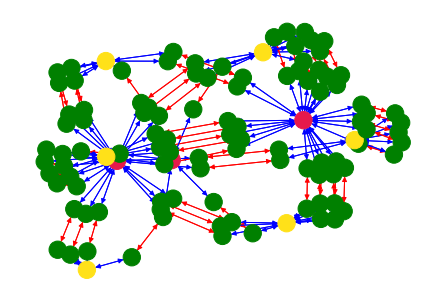

In [21]:
# show
colors = nx.get_edge_attributes(CRP_G_1,'color').values()
colorsN = nx.get_node_attributes(CRP_G_1,'color').values()
nx.draw(
    CRP_G_1
    ,edge_color=colors
    ,node_color=colorsN
    #,with_labels=True
)
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/graph_mln_1_person_home_ownership_loan_intent'+'_'+timestr+'.png'
plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
plt.show()
# 'person_home_ownership',
# 'loan_intent',
# 'cb_person_default_on_file'

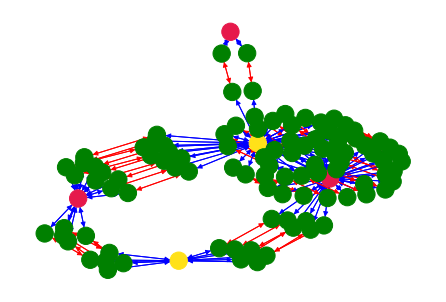

In [22]:
# show
colors = nx.get_edge_attributes(CRP_G_2,'color').values()
colorsN = nx.get_node_attributes(CRP_G_2,'color').values()
nx.draw(
    CRP_G_2
    ,edge_color=colors
    ,node_color=colorsN
    #,with_labels=True
)
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/graph_mln_2_person_home_ownership_cb_person_default_on_file'+'_'+timestr+'.png'
plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
plt.show()
# 'person_home_ownership',
# 'loan_intent',
# 'cb_person_default_on_file'

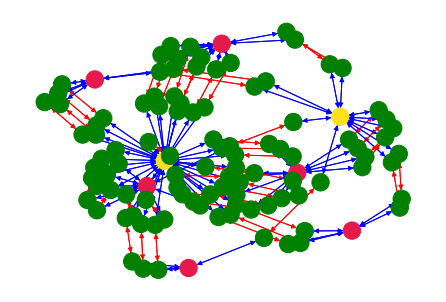

In [23]:
# show
colors = nx.get_edge_attributes(CRP_G_3,'color').values()
colorsN = nx.get_node_attributes(CRP_G_3,'color').values()
nx.draw(
    CRP_G_3
    ,edge_color=colors
    ,node_color=colorsN
    #,with_labels=True
)
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/graph_mln_3_loan_intent_cb_person_default_on_file'+'_'+timestr+'.png'
plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
plt.show()
# 'person_home_ownership',
# 'loan_intent',
# 'cb_person_default_on_file'

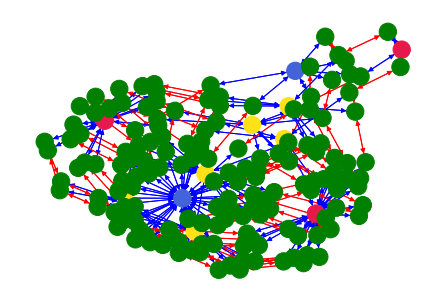

In [24]:
# show
colors = nx.get_edge_attributes(CRP_G_all,'color').values()
colorsN = nx.get_node_attributes(CRP_G_all,'color').values()
nx.draw(
    CRP_G_all
    ,edge_color=colors
    ,node_color=colorsN
    #,with_labels=True
)
timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
filename1 = './plots/graph_mln_4_loan_intent_cb_person_default_on_file'+'_'+timestr+'.png'
plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
plt.show()
# 'person_home_ownership',
# 'loan_intent',
# 'cb_person_default_on_file'

In [58]:
save_graph(CRP_G_1, 'ml_graph', DATA_OVER.shape[0], len(OHE[0])+len(OHE[1]))

In [59]:
save_graph(CRP_G_2, 'ml_graph', DATA_OVER.shape[0], len(OHE[0])+len(OHE[2]))

In [60]:
save_graph(CRP_G_3, 'ml_graph', DATA_OVER.shape[0], len(OHE[1])+len(OHE[2]))

In [61]:
def find_indices(list_to_check, item_to_find):
    """Find indices
    Args:
      list_to_check: a list of binary value
      item_to_find: a value

    Returns:
      A list of indices or index
    """
    
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]



In [62]:
def build_modalities_graph(X,Y,n):
    """Build a modalities graph
    Args:
      X: a dataframe without class
      Y: a vector of class values
      n: the number of rows

    Returns:
      A modality graph
    """
    
    CRP_G = nx.DiGraph() # create an empty directed graph

    # join X and Y
    data = X.copy()
    data.astype('int')
    temp = data.copy()
    data["CLASS"] = Y.values
    data = data.head(n)

    # cast columns type to int
    data.astype('int')



    # build edges
    LIST_OF_CUSTOMERS = data.index.values.tolist()
    
    for el in LIST_OF_CUSTOMERS: #fetch on custumers list
        # find all columns belong to customer
        LINE = temp.loc[el,].values
        COLUMNS_BELONG = find_indices(LINE,1)

        # create edges
        COLUMNS = X.columns
        for i, col in enumerate(COLUMNS_BELONG): # fetch belong columns
            #print([i for i in range(i+1,len(COLUMNS_BELONG))], COLUMNS_BELONG)
            for j in range(i+1,len(COLUMNS_BELONG)): # fetch successor
                #if j < len(COLUMNS_BELONG) - 1: # check if it's the last column
                if CRP_G.has_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[j]]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[col]][COLUMNS[COLUMNS_BELONG[j]]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[j]], weight=1)

                if CRP_G.has_edge(COLUMNS[COLUMNS_BELONG[j]], COLUMNS[col]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[COLUMNS_BELONG[j]]][COLUMNS[col]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[COLUMNS_BELONG[j]], COLUMNS[col], weight=1)

            """if i == len(COLUMNS_BELONG) - 2: # check if it's the last column
                if CRP_G.has_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[i+1]]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[col]][COLUMNS[COLUMNS_BELONG[i+1]]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[col], COLUMNS[COLUMNS_BELONG[i+1]], weight=1)

                if CRP_G.has_edge(COLUMNS[COLUMNS_BELONG[i+1]], COLUMNS[col]):
                    # we added this one before, just increase the weight by one
                    CRP_G[COLUMNS[COLUMNS_BELONG[i+1]]][COLUMNS[col]]['weight'] += 1
                else:
                    # new edge. add with weight=1
                    CRP_G.add_edge(COLUMNS[COLUMNS_BELONG[i+1]], COLUMNS[col], weight=1)"""



            # add to class
            CLASS = data.loc[el,'CLASS']
            if CRP_G.has_edge(COLUMNS[col], CLASS):
                # we added this one before, just increase the weight by one
                CRP_G[COLUMNS[col]][CLASS]['weight'] += 1
            else:
                # new edge. add with weight=1
                CRP_G.add_edge(COLUMNS[col], CLASS, weight=1)

            if CRP_G.has_edge(CLASS, COLUMNS[col]):
                # we added this one before, just increase the weight by one
                CRP_G[CLASS][COLUMNS[col]]['weight'] += 1
            else:
                # new edge. add with weight=1
                CRP_G.add_edge(CLASS, COLUMNS[col], weight=1)




    # return the graph
    return CRP_G, data

In [63]:
MODALITIES_GRAPHE, datas = build_modalities_graph(DATA_OVER[[*OHE[0],*OHE[1],*OHE[2]]], DATA_OVER['loan_status'], DATA_OVER.shape[0])

In [64]:
save_digraph(MODALITIES_GRAPHE, 'modality_graph', DATA_OVER.shape[0], len([*OHE[0],*OHE[1],*OHE[2]]))

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">7. Feature Engineering</div>

In [65]:
def get_intra_node_label(graph):
    """Get intra nodel labels
    Args:
      graph: a multilayer graph

    Returns:
      A list of all intra nodes inside the graph
    """
    
    nodes = graph.nodes()
    intras = [k for k in nodes if '-M-' in k]
    return intras




In [66]:
def get_inter_node_label(graph):
    """Get inter nodel labels
    Args:
      graph: a multilayer graph

    Returns:
      A list of all inter nodes inside the graph
    """
    
    nodes = graph.nodes()
    inters = [k for k in nodes if '-U-' in k]
    return inters



In [67]:
def compute_personlization(node_list):
    """Compute personalization
    Args:
      node_list: nodes list

    Returns:
      A list of initial influence of nodes
    """
    
    personlized = dict()
    a = [ personlized.update({ k : 1/len(node_list) }) for k in node_list ]
    return personlized


In [68]:
def get_number_of_borrowers_with_same_first_layer_value(borrower, graph):
    """Get number of borrower with same value in first layer
    Args:
      borrower: index of borrower
      graph: a graph

    Returns:
      A list of list of borrower and their length
    """
    
    edge = [
          B # return the modaliy
          for (A,B) in graph.edges(['C0-U-' + str(borrower)]) # for each nodes link to my borower's
          if ('C0-M-' in B) and ('C0-U-' + str(borrower) == A) # if clause is respect
      ]
    #print(edge[0][1])
    edges = [
      (A,B) 
      for (A,B) in graph.edges(edge)]
    #print(edges)
    return [edges,len(edges) - 1]



In [69]:
def get_number_of_borrowers_with_same_second_layer_value(borrower, graph):
    """Get number of borrower with same value in second layer
    Args:
      borrower: index of borrower
      graph: a graph

    Returns:
      A list of list of borrower and their length
    """
    
    edge = [
          B # return the modaliy
          for (A,B) in graph.edges(['C1-U-' + str(borrower)]) # for each nodes link to my borower's
          if ('C1-M-' in B) and ('C1-U-' + str(borrower) == A) # if clause is respect
      ]
    #print(edge[0][1])
    edges = [
      (A,B) 
      for (A,B) in graph.edges(edge)]
    #print(edges)
    return [edges,len(edges) - 1]



In [70]:
def get_max_borrower_pr(pr):
    """Get max modality of borrower in the pagerank output
    Args:
      pr: a specify pagerank

    Returns:
      A list of max modality pagerank for each borrower
    """
    
    borrower = {}
    for key, val in pr.items():
        if '-U-' in key:
            borrower[int(key.split("-U-")[1])] = max(val, borrower[int(key.split("-U-")[1])]) if int(key.split("-U-")[1]) in borrower else val
    return [val for key, val in collections.OrderedDict(sorted(borrower.items())).items()]



In [71]:
def get_number_of_borrowers_with_same_first_and_same_second_layer_value(borrower, graph):
    """Get number of borrower with same value in first and second layer
    Args:
      borrower: index of borrower
      graph: a graph

    Returns:
      A list of list of example and their length
    """
    
    edges_sho = get_number_of_borrowers_with_same_first_layer_value(borrower, graph)[0] # get the number of borrower with same modality inside each layer
    edges_sli = get_number_of_borrowers_with_same_second_layer_value(borrower, graph)[0]

    just_sho_borrowers = [B.split("-U-")[1] for (A,B) in edges_sho] # get index of borrower only inside each layer
    just_sli_borrowers = [B.split("-U-")[1] for (A,B) in edges_sli]


    just_sho_borrowers = set(just_sho_borrowers) # convert the list to set to have values once
    just_sli_borrowers = set(just_sli_borrowers)

    intersection = just_sli_borrowers.intersection(just_sho_borrowers) # compute the intersection of the two sets
    return [
        list(intersection), # convert intersection set to list 
        len(intersection) - 1 # compute the len 
    ]



In [72]:
def get_max_modality_pagerank_score(borrower, graph, modal, pr):
    """Get max modality of borrower in the pagerank output belong to specify layer
    Args:
        borrower: indice of the borrower
        graph: the graph mln
        modal: the layer      
        pr: a specify pagerank

    Returns:
        The max score
    """
    
    edges = graph.edges(['C'+str(modal)+'-U-'+str(borrower)]) # get all edges of the borrower
    maxi = 0 # default maxi to 0
    for A, B in edges: # for each edge of the borower in the layer
        if '-U-'+str(borrower) in A and 'C'+str(modal)+'-M-' in B: # verify the form
            maxi = maxi if max(maxi,pr[B]) == maxi else pr[B] # update the max
            #break
    return maxi #return the max



In [73]:
def get_persons(dataframe):
    """Get index dimension of dataframe
    Args:
        dataframe: a dataframe

    Returns:
        The index list
    """
    
    index_users = dataframe.index.values.tolist() # get all index present in the dataset as list
    return index_users # return it

In [11]:
# standardization of new features
def standard_extraction(extracts, feats):
    """Standardize the features extracted
    Args:
        extracts: features dict
        feats: list of keys feature to standardize 

    Returns:
        None
    """
    
    for key in feats:
        extracts[key] = [el/max(extracts[key]) for el in extracts[key]]


In [12]:
def inject_features_extracted(data,features):
    """inject features extracted in dataframe
    Args:
        data: dataframe of loan
        features: dict of features extracted 

    Returns:
        A new loan dataset
    """
    
    dataframe = data.copy()
    for key, val in features.items():
        dataframe[key] = val
    return dataframe

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:90%; text-align:center; color: #FFFFFF">7.1. Extract Features from Multi-layer Graphs</div>

In [76]:
# Binome page rank
bipart_combine_1 = nx.pagerank(CRP_G_1, alpha=0.85)

In [77]:
bipart_combine_2 = nx.pagerank(CRP_G_2, alpha=0.85)

In [78]:
bipart_combine_3 = nx.pagerank(CRP_G_3, alpha=0.85)

In [79]:
# get intra page rank
bipart_intra_pagerank_1 = nx.pagerank(CRP_G_1,personalization=compute_personlization(get_intra_node_label(CRP_G_1)), alpha=0.85)

In [80]:
bipart_intra_pagerank_2 = nx.pagerank(CRP_G_2,personalization=compute_personlization(get_intra_node_label(CRP_G_2)), alpha=0.85)

In [81]:
bipart_intra_pagerank_3 = nx.pagerank(CRP_G_3,personalization=compute_personlization(get_intra_node_label(CRP_G_3)), alpha=0.85)

In [82]:
# get inter page rank
bipart_inter_pagerank_1 = nx.pagerank(CRP_G_1,personalization=compute_personlization(get_inter_node_label(CRP_G_1)), alpha=0.85)

In [83]:
bipart_inter_pagerank_2 = nx.pagerank(CRP_G_2,personalization=compute_personlization(get_inter_node_label(CRP_G_2)), alpha=0.85)

In [84]:
bipart_inter_pagerank_3 = nx.pagerank(CRP_G_3,personalization=compute_personlization(get_inter_node_label(CRP_G_3)), alpha=0.85)

In [85]:
extracts = {}
extracts['MLN1_person_home_ownership_degré'] = [get_number_of_borrowers_with_same_first_layer_value(index,CRP_G_1)[1] for index in get_persons(DATA_OVER)]
extracts['MLN2_person_home_ownership_degré'] = extracts['MLN1_person_home_ownership_degré']

In [86]:
extracts['MLN1_loan_intent_degré'] = [get_number_of_borrowers_with_same_second_layer_value(index,CRP_G_1)[1] for index in get_persons(DATA_OVER)]
extracts['MLN3_loan_intent_degré'] = extracts['MLN1_loan_intent_degré']

In [87]:
extracts['MLN2_cb_person_default_on_file_degré'] = [get_number_of_borrowers_with_same_second_layer_value(index,CRP_G_2)[1] for index in get_persons(DATA_OVER)]
extracts['MLN3_cb_person_default_on_file_degré'] = extracts['MLN2_cb_person_default_on_file_degré']

In [88]:
extracts['MLN1_person_home_ownership_et_loan_intent_degré'] = [get_number_of_borrowers_with_same_first_and_same_second_layer_value(index,CRP_G_1)[1] for index in get_persons(DATA_OVER)]

In [89]:
extracts['MLN2_person_home_ownership_et_cb_person_default_on_file_degré'] = [get_number_of_borrowers_with_same_first_and_same_second_layer_value(index,CRP_G_2)[1] for index in get_persons(DATA_OVER)]

In [90]:
extracts['MLN3_loan_intent_et_cb_person_default_on_file_degré'] = [get_number_of_borrowers_with_same_first_and_same_second_layer_value(index,CRP_G_3)[1] for index in get_persons(DATA_OVER)]

In [91]:
extracts['MLN1_bipart_intra_person_home_ownership_loan_intent'] = get_max_borrower_pr(bipart_intra_pagerank_1)

In [92]:
extracts['MLN2_bipart_intra_person_home_ownership_cb_person_default_on_file'] = get_max_borrower_pr(bipart_intra_pagerank_2)

In [93]:
extracts['MLN3_bipart_intra_loan_intent_cb_person_default_on_file'] = get_max_borrower_pr(bipart_intra_pagerank_3)

In [94]:
extracts['MLN1_bipart_inter_person_home_ownership_loan_intent'] = get_max_borrower_pr(bipart_inter_pagerank_1)

In [95]:
extracts['MLN2_bipart_inter_person_home_ownership_cb_person_default_on_file'] = get_max_borrower_pr(bipart_inter_pagerank_2)

In [96]:
extracts['MLN3_bipart_inter_loan_intent_cb_person_default_on_file'] = get_max_borrower_pr(bipart_inter_pagerank_3)

In [97]:
extracts['MLN3_bipart_combine_loan_intent_cb_person_default_on_file'] = get_max_borrower_pr(bipart_combine_3)

In [98]:
extracts['MLN2_bipart_combine_person_home_ownership_cb_person_default_on_file'] = get_max_borrower_pr(bipart_combine_2)

In [99]:
extracts['MLN1_bipart_combine_person_home_ownership_loan_intent'] = get_max_borrower_pr(bipart_combine_1)

"\n'person_home_ownership',\n    'loan_intent',\n    'cb_person_default_on_file'\n"

In [101]:
extracts['MLN1_bipart_intra_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 0, bipart_intra_pagerank_1) for index in get_persons(DATA_OVER)]

In [102]:
extracts['MLN1_bipart_inter_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 0, bipart_inter_pagerank_1) for index in get_persons(DATA_OVER)]

In [103]:
extracts['MLN1_bipart_combine_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 0, bipart_combine_1) for index in get_persons(DATA_OVER)]

In [104]:
extracts['MLN2_bipart_intra_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 0, bipart_intra_pagerank_2) for index in get_persons(DATA_OVER)]

In [105]:
extracts['MLN2_bipart_inter_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 0, bipart_inter_pagerank_2) for index in get_persons(DATA_OVER)]

In [106]:
extracts['MLN2_bipart_combine_person_home_ownership_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 0, bipart_combine_2) for index in get_persons(DATA_OVER)]

In [107]:
extracts['MLN1_bipart_intra_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 1, bipart_intra_pagerank_1) for index in get_persons(DATA_OVER)]

In [108]:
extracts['MLN1_bipart_inter_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 1, bipart_inter_pagerank_1) for index in get_persons(DATA_OVER)]

In [109]:
extracts['MLN1_bipart_combine_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_1, 1, bipart_combine_1) for index in get_persons(DATA_OVER)]

In [110]:
extracts['MLN3_bipart_intra_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 0, bipart_intra_pagerank_3) for index in get_persons(DATA_OVER)]

In [111]:
extracts['MLN3_bipart_inter_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 0, bipart_inter_pagerank_3) for index in get_persons(DATA_OVER)]

In [112]:
extracts['MLN3_bipart_combine_loan_intent_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 0, bipart_combine_3) for index in get_persons(DATA_OVER)]

In [113]:
extracts['MLN2_bipart_intra_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 1, bipart_intra_pagerank_2) for index in get_persons(DATA_OVER)]

In [114]:
extracts['MLN2_bipart_inter_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 1, bipart_inter_pagerank_2) for index in get_persons(DATA_OVER)]

In [115]:
extracts['MLN2_bipart_combine_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_2, 1, bipart_combine_2) for index in get_persons(DATA_OVER)]

In [116]:
extracts['MLN3_bipart_intra_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 1, bipart_intra_pagerank_3) for index in get_persons(DATA_OVER)]

In [117]:
extracts['MLN3_bipart_inter_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 1, bipart_inter_pagerank_3) for index in get_persons(DATA_OVER)]

In [118]:
extracts['MLN3_bipart_combine_cb_person_default_on_file_max'] = [get_max_modality_pagerank_score(index,CRP_G_3, 1, bipart_combine_3) for index in get_persons(DATA_OVER)]

In [119]:
standard_extraction(extracts, extracts.keys())

In [120]:
saver = pd.DataFrame(extracts)
save_dataset(saver, 'extracted_features_mln')

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:90%; text-align:center; color: #FFFFFF">7.2. Extract Features from Modality Graphs</div>

In [121]:
# Binome page rank
modal_combine = nx.pagerank(MODALITIES_GRAPHE, alpha=0.85)

In [122]:
#save_dataset(pd.DataFrame(modal_combine.items(), columns=modal_combine.keys()), 'modal_combine')

In [123]:
saver1 = pd.DataFrame(extracts)
save_dataset(saver1, 'extracted_features_modality')

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">8. ML Classification Models</div>

In [13]:
def test_train(dataframe, target, test_size=0.2, random_state=12):
    """Split train test data labels
    Args:
        dataframe: dataframe
        target: hue variables
        test_size: test data size,
        random_state: way to randomize example choose
        

    Returns:
        x_train, x_test, y_train, y_test
    """
    
    X = dataframe.drop([target], axis=1)
    Y = dataframe[target]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    #save_dataset(x_train, 'x_train')
    x_train.reset_index(inplace = True)
    x_test.reset_index(inplace = True)

    x_train = x_train.drop(['index'], axis=1)
    x_train.reset_index(inplace = True)
    x_train = x_train.drop(['index'], axis=1)

    x_test = x_test.drop(['index'], axis=1)
    x_test.reset_index(inplace = True)
    x_test = x_test.drop(['index'], axis=1)

    return x_train, x_test, y_train, y_test

In [14]:
svc = SVC(
    kernel = 'linear'
    #,cache_size = 7100
    #, verbose = True
)
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
#mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
#abc = AdaBoostClassifier()
#bc = BaggingClassifier()
#etc = ExtraTreesClassifier()
#gbdt = GradientBoostingClassifier()
xgb = XGBClassifier(booster = 'gbtree')
#cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
#lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265)

#

In [15]:
clfs = {
        'xgb':xgb,
        'dtc':dtc,
        'lrc':lrc,
        'rfc':rfc,
        #'sv' :svc,
        #'knn':knc
    }

In [16]:
def init_training_store(dataframe):
    """Initialize training information storage dataframe
    Args:
        dataframe: a dataframe 
        

    Returns:
        New dataframe with just columns
    """
    
    cols = dataframe.columns.to_list()
    #print(cols)
    cols.extend([
        'precision',
        'accuracy',
        'recall',
        'f1-score'
    ])
    return pd.DataFrame(columns=cols)



In [17]:
def get_xgb_imp(xgb):
    """Get XGBOOST feature score in prediction before training
    Args:
        xgb: a xgboost classifier
        

    Returns:
       The dict of features with their importance
    """
    
    imp_vals = xgb.get_booster().get_fscore()
    total = sum(imp_vals.values())
    return {k:v/total for k,v in imp_vals.items()}



In [129]:
def save_shap(clf, name, x_test):
    explainer = shap.Explainer(clf.predict, x_test)
    shap_values = explainer(x_test)
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = './plots/shap_summary_'+name+'_'+timestr+'.png'
    shap.summary_plot(shap_values,show=False)
    plt.savefig(filename,dpi=700) #.png,.pdf will also support here
    filename1 = './plots/shap_bar_'+name+'_'+timestr+'.png'
    shap.plots.bar(shap_values,show=False)
    plt.savefig(filename1,dpi=700) #.png,.pdf will also support here



In [18]:
def train_classifier(name, clf,X_train,y_train,X_test,y_test, store, domain):
    """Train a classifier on a dataframe
    Args:
        name: name of classifier
        clf: classifier instance
        X_train: training data
        y_train: training class
        X_test: test data
        y_test: test class
        store: storage dataframe
        domain: domain action training
        

    Returns:
       the training storage
    """
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred, average='macro')
    f1_score_r = f1_score(y_test,y_pred, average='macro')
    
    save_model(clf, name+'_'+domain)
    if 'lr' in name or 'sv' in name:
        #print(f"support_vectors_:{clf.support_vectors_} dual_coef_{clf.dual_coef_}")
        vals = list(clf.coef_[0])
        #print(f"len {len(vals)}")
        #print(vals)
        vals.extend([precision,accuracy,recall,f1_score_r])
        keys = X_train.columns.to_list()
        keys.extend([
            'precision',
            'accuracy',
            'recall',
            'f1-score'
        ])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} ---")
        #save_dataset(store, name+'_'+domain)
    elif 'rf' in name or 'dt' in name or 'kn' in name:
        vals = list(clf.feature_importances_)
        #print(f"len {len(vals)}")
        vals.extend([precision,accuracy,recall,f1_score_r])
        keys = X_train.columns.to_list()
        keys.extend([
            'precision',
            'accuracy',
            'recall',
            'f1-score'
        ])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} +++")
        #save_dataset(store, name+'_'+domain)
    elif 'xg' in name:
        vals = get_xgb_imp(clf)
        keys = list(vals.keys())
        vals = list(vals.values())
        keys.extend([
                'precision',
                'accuracy',
                'recall',
                'f1-score'
            ])
        vals.extend([precision,accuracy,recall,f1_score_r])
        #print(f"{name} keys:{len(keys)} vals:{len(vals)}")
        store = store.append(
                    pd.Series(
                        vals, 
                        index=keys,
                        name= name
                    )
                    #.sort_values(ascending=False)
                )
        store.fillna(0, inplace=True)
        #print(f"{store.isna().sum()} ***")
        #save_dataset(store, name+'_'+domain)
    
    return store

In [19]:

def train(clfs,x_train,y_train,x_test,y_test, store, domain):
    """Train our baseline classifiers
    Args:
        clfs: dict of classifiers instance
        X_train: training data
        y_train: training class
        X_test: test data
        y_test: test class
        store: storage dataframe
        domain: domain action training
        

    Returns:
       The training storage
    """
    
    for name,clf in clfs.items():
        print(name)
        store = train_classifier(name, clf, x_train,y_train,x_test,y_test, store, domain)

    # save of model training logs    
    save_dataset(store, domain)
    
    return store



In [132]:
def call_shap(classifier, x_test, name):
    save_shap(classifier, name, x_test)

In [133]:
# save the classic dataframe
save_dataset(DATA_OVER, 'DATA_OVER')

In [20]:
#DATA_OVER = read_dataset('./data_selection_storage/GERMAN_DATA_OVER_2023_10_15_07_22_56.csv')#

### A. Train on classic features

In [147]:
x_train_c, x_test_c, y_train_c, y_test_c = test_train(DATA_OVER,'loan_status')

In [148]:
STORE_STD_c = init_training_store(x_train_c)

In [149]:
store_original=train(clfs,x_train_c,y_train_c,x_test_c,y_test_c,STORE_STD_c,'classic')

xgb
[10:55:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [21]:
#store_original = read_dataset('./data_selection_storage/GERMAN_classic_2023_10_15_10_17_23.csv')

In [150]:
store_original.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [151]:
save_dataset(x_train_c, 'x_train_c')

In [152]:
save_dataset(x_test_c, 'x_test_c')

In [153]:
save_dataset(y_train_c, 'y_train_c')

In [154]:
save_dataset(y_test_c, 'y_test_c')

### B. Train on classic + MLN features

In [143]:
DATA_OVER_MLN = inject_features_extracted(DATA_ OVER, extracts)

In [144]:
save_dataset(DATA_OVER_MLN, 'DATA_OVER_MLN')

In [145]:
x_train_mln, x_test_mln, y_train_mln, y_test_mln = test_train(DATA_OVER_MLN,'loan_status')

In [146]:
STORE_STD_mln = init_training_store(x_train_mln)

In [147]:
store_mln=train(clfs,x_train_mln,y_train_mln,x_test_mln,y_test_mln,STORE_STD_mln,'classic_mln')

[16:40:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
#store_mln = read_dataset('./data_selection_storage/GERMAN_classic_mln_2023_10_15_16_40_50.csv')

In [149]:
store_mln.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [150]:
save_dataset(x_train_mln, 'x_train_mln')

In [151]:
save_dataset(x_test_mln, 'x_test_mln')

In [152]:
save_dataset(y_train_mln, 'y_train_mln')

In [153]:
save_dataset(y_test_mln, 'y_test_mln')

***Get extract features for each mln build***

In [22]:
#extracts = read_dataset('./data_selection_storage/GERMAN_extracted_features_mln_2023_10_15_07_22_43.csv')

In [23]:
mln_f = {
    'mln1': {},
    'mln2': {},
    'mln3': {}
}

In [24]:
for name in extracts.keys():
    if 'MLN1' in name:
        mln_f['mln1'][name] = list(extracts[name])
    elif 'MLN2' in name:
        mln_f['mln2'][name] = list(extracts[name])
    elif 'MLN2' in name:
        mln_f['mln3'][name] = list(extracts[name])

In [ ]:
#mln_f

### C. Train on classic - MLN attributs

In [ ]:
"""
'person_home_ownership',
    'loan_intent',
    'cb_person_default_on_file'
"""

#### MLN 1 (person_home_ownership - loan_intent)

In [158]:
DATA_OVER_C1 = DATA_OVER.drop([*OHE[0],*OHE[1]], axis=1)

In [159]:
save_dataset(DATA_OVER_C1, 'DATA_OVER_C1')

In [25]:
#DATA_OVER_C1 = read_dataset('./data_selection_storage/GERMAN_DATA_OVER_C1_2023_10_15_16_41_03.csv')

In [26]:
x_train_c1, x_test_c1, y_train_c1, y_test_c1 = test_train(DATA_OVER_C1,'loan_status')

In [27]:
STORE_STD_c1 = init_training_store(x_train_c1)

In [28]:
store_c1 = train(clfs,x_train_c1,y_train_c1,x_test_c1,y_test_c1,STORE_STD_c1,'classic1')

xgb
[10:02:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [26]:
#store_c1 = read_dataset('./data_selection_storage/AFB_classic1_2023_09_30_15_08_22.csv')

In [29]:
store_c1.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [30]:
save_dataset(x_train_c1, 'x_train_c1')

In [31]:
save_dataset(x_test_c1, 'x_test_c1')

In [32]:
save_dataset(y_train_c1, 'y_train_c1')

In [33]:
save_dataset(y_test_c1, 'y_test_c1')

In [34]:
DATA_OVER_C1_MLN = inject_features_extracted(DATA_OVER_C1, mln_f['mln1'])

In [35]:
save_dataset(DATA_OVER_C1_MLN, 'DATA_OVER_C1_MLN')

In [36]:
x_train_c1_mln, x_test_c1_mln, y_train_c1_mln, y_test_c1_mln = test_train(DATA_OVER_C1_MLN,'loan_status')

In [37]:
STORE_STD_c1_mln = init_training_store(x_train_c1_mln)

In [38]:
store_c1_mln = train(clfs,x_train_c1_mln,y_train_c1_mln,x_test_c1_mln,y_test_c1_mln,STORE_STD_c1_mln,'classic1_mln')

xgb
[10:03:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
#store_c1_mln = read_dataset('./data_selection_storage/AFB_classic1_mln_2023_09_30_15_10_44.csv')

In [39]:
store_c1_mln.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [40]:
save_dataset(x_train_c1_mln, 'x_train_c1_mln')

In [41]:
save_dataset(x_test_c1_mln, 'x_test_c1_mln')

In [42]:
save_dataset(y_train_c1_mln, 'y_train_c1_mln')

In [43]:
save_dataset(y_test_c1_mln, 'y_test_c1_mln')

#### MLN 2 (person_home_ownership - cb_person_default_on_file)

In [44]:
DATA_OVER_C2 = DATA_OVER.drop([*OHE[0],*OHE[2]], axis=1)

In [45]:
save_dataset(DATA_OVER_C2, 'DATA_OVER_C2')

In [46]:
x_train_c2, x_test_c2, y_train_c2, y_test_c2 = test_train(DATA_OVER_C2,'loan_status')

In [47]:
STORE_STD_c2 = init_training_store(x_train_c2)

In [48]:
store_c2 = train(clfs,x_train_c2,y_train_c2,x_test_c2,y_test_c2,STORE_STD_c2,'classic2')

xgb
[10:03:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
#store_c2 = read_dataset('./data_selection_storage/AFB_classic2_2023_09_30_15_12_02.csv')

In [49]:
store_c2.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [50]:
save_dataset(x_train_c2, 'x_train_c2')

In [51]:
save_dataset(x_test_c2, 'x_test_c2')

In [52]:
save_dataset(y_train_c2, 'y_train_c2')

In [53]:
save_dataset(y_test_c2, 'y_test_c2')

In [54]:
DATA_OVER_C2_MLN = inject_features_extracted(DATA_OVER_C2, mln_f['mln2'])

In [55]:
save_dataset(DATA_OVER_C2_MLN, 'DATA_OVER_C2_MLN')

In [56]:
x_train_c2_mln, x_test_c2_mln, y_train_c2_mln, y_test_c2_mln = test_train(DATA_OVER_C2_MLN,'loan_status')

In [57]:
STORE_STD_c2_mln = init_training_store(x_train_c2_mln)

In [58]:
store_c2_mln = train(clfs,x_train_c2_mln,y_train_c2_mln,x_test_c2_mln,y_test_c2_mln,STORE_STD_c2_mln,'classic2_mln')

xgb
[10:04:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
#store_c2_mln = read_dataset('./data_selection_storage/AFB_classic2_mln_2023_09_30_15_14_20.csv')

In [59]:
store_c2_mln.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [60]:
save_dataset(x_train_c2_mln, 'x_train_c2_mln')

In [61]:
save_dataset(x_test_c2_mln, 'x_test_c2_mln')

In [62]:
save_dataset(y_train_c2_mln, 'y_train_c2_mln')

In [63]:
save_dataset(y_test_c2_mln, 'y_test_c2_mln')

#### MLN 3 (loan_intent - cb_person_default_on_file)

In [73]:
DATA_OVER_C3 = DATA_OVER.drop([*OHE[1],*OHE[2]], axis=1)

In [74]:
save_dataset(DATA_OVER_C3, 'DATA_OVER_C3')

In [75]:
x_train_c3, x_test_c3, y_train_c3, y_test_c3 = test_train(DATA_OVER_C3,'loan_status')

In [76]:
STORE_STD_c3 = init_training_store(x_train_c3)

In [77]:
store_c3 = train(clfs,x_train_c3,y_train_c3,x_test_c3,y_test_c3,STORE_STD_c3,'classic3')

xgb
[10:10:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
#store_c3 = read_dataset('./data_selection_storage/AFB_classic3_2023_09_30_15_17_16.csv')

In [78]:
store_c3.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [79]:
save_dataset(x_train_c3, 'x_train_c3')

In [80]:
save_dataset(x_test_c3, 'x_test_c3')

In [81]:
save_dataset(y_train_c3, 'y_train_c3')

In [82]:
save_dataset(y_test_c3, 'y_test_c3')

In [83]:
DATA_OVER_C3_MLN = inject_features_extracted(DATA_OVER_C3, mln_f['mln3'])

In [84]:
save_dataset(DATA_OVER_C3_MLN, 'DATA_OVER_C3_MLN')

In [85]:
x_train_c3_mln, x_test_c3_mln, y_train_c3_mln, y_test_c3_mln = test_train(DATA_OVER_C3_MLN,'loan_status')

In [86]:
STORE_STD_c3_mln = init_training_store(x_train_c3_mln)

In [87]:
store_c3_mln = train(clfs,x_train_c3_mln,y_train_c3_mln,x_test_c3_mln,y_test_c3_mln,STORE_STD_c3_mln,'classic3_mln')

xgb
[10:10:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
#store_c3_mln = read_dataset('./data_selection_storage/AFB_classic3_mln_2023_09_30_15_19_44.csv')

In [88]:
store_c3_mln.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [89]:
save_dataset(x_train_c3_mln, 'x_train_c3_mln')

In [90]:
save_dataset(x_test_c3_mln, 'x_test_c3_mln')

In [91]:
save_dataset(y_train_c3_mln, 'y_train_c3_mln')

In [92]:
save_dataset(y_test_c3_mln, 'y_test_c3_mln')

In [ ]:
#DATA_OVER = read_dataset('./data_selection_storage/AFB_DATA_OVER_2023_09_30_14_59_59.csv')

In [93]:
DATA_OVER_MLN_1 = inject_features_extracted(DATA_OVER, mln_f['mln1'])

In [94]:
DATA_OVER_MLN_2 = inject_features_extracted(DATA_OVER, mln_f['mln2'])

In [95]:
DATA_OVER_MLN_3 = inject_features_extracted(DATA_OVER, mln_f['mln3'])

In [96]:
save_dataset(DATA_OVER_MLN_1, 'DATA_OVER_MLN_1')
save_dataset(DATA_OVER_MLN_2, 'DATA_OVER_MLN_2')
save_dataset(DATA_OVER_MLN_3, 'DATA_OVER_MLN_3')

In [97]:
DATA_OVER_AMLNs = DATA_OVER.drop([*OHE[0], *OHE[1], *OHE[2]], axis=1)
save_dataset(DATA_OVER_AMLNs, 'DATA_OVER_AMLNs')

In [98]:
DATA_OVER_AMLN_MLNs = inject_features_extracted(
    inject_features_extracted(
        inject_features_extracted(DATA_OVER_AMLNs, mln_f['mln1']), mln_f['mln2']), 
    mln_f['mln3'])

In [99]:
save_dataset(DATA_OVER_AMLN_MLNs, 'DATA_OVER_AMLN_MLNs')

In [100]:
x_train_mln_1, x_test_mln_1, y_train_mln_1, y_test_mln_1 = test_train(DATA_OVER_MLN_1,'loan_status')

In [101]:
x_train_mln_2, x_test_mln_2, y_train_mln_2, y_test_mln_2 = test_train(DATA_OVER_MLN_2,'loan_status')

In [102]:
x_train_mln_3, x_test_mln_3, y_train_mln_3, y_test_mln_3 = test_train(DATA_OVER_MLN_3,'loan_status')

In [103]:
x_train_amln, x_test_amln, y_train_amln, y_test_amln = test_train(DATA_OVER_AMLNs,'loan_status')

In [ ]:
#x_train_amln_mlns, x_test_amln_mlns, y_train_amln_mlns, y_test_amln_mlns = test_train(DATA_OVER_AMLN_MLNs,'loan_statuss')

In [ ]:
#save_dataset(x_train_amln_mlns, 'x_train_amln_mlns')
#save_dataset(x_test_amln_mlns, 'x_test_amln_mlns')
#save_dataset(y_train_amln_mlns, 'y_train_amln_mlns')
#save_dataset(y_test_amln_mlns, 'y_test_amln_mlns')

In [104]:
save_dataset(x_train_mln_1, 'x_train_mln_1')
save_dataset(x_test_mln_1, 'x_test_mln_1')
save_dataset(y_train_mln_1, 'y_train_mln_1')
save_dataset(y_test_mln_1, 'y_test_mln_1')

In [105]:
save_dataset(x_train_mln_2, 'x_train_mln_2')
save_dataset(x_test_mln_2, 'x_test_mln_2')
save_dataset(y_train_mln_2, 'y_train_mln_2')
save_dataset(y_test_mln_2, 'y_test_mln_2')

In [106]:
save_dataset(x_train_mln_3, 'x_train_mln_3')
save_dataset(x_test_mln_3, 'x_test_mln_3')
save_dataset(y_train_mln_3, 'y_train_mln_3')
save_dataset(y_test_mln_3, 'y_test_mln_3')

In [107]:
save_dataset(x_train_amln, 'x_train_amln')
save_dataset(x_test_amln, 'x_test_amln')
save_dataset(y_train_amln, 'y_train_amln')
save_dataset(y_test_amln, 'y_test_amln')

In [108]:
STORE_STD_mln_1 = init_training_store(x_train_mln_1)

In [109]:
STORE_STD_mln_2 = init_training_store(x_train_mln_2)

In [110]:
STORE_STD_mln_3 = init_training_store(x_train_mln_3)

In [111]:
STORE_STD_amln = init_training_store(x_train_amln)

In [114]:
#STORE_STD_amln_mlns = init_training_store(x_train_amln_mlns)

In [115]:
store_mln_1 = train(clfs,x_train_mln_1,y_train_mln_1,x_test_mln_1,y_test_mln_1,STORE_STD_mln_1,'classic_mln_1')

xgb
[10:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [116]:
store_mln_2 = train(clfs,x_train_mln_2,y_train_mln_2,x_test_mln_2,y_test_mln_2,STORE_STD_mln_2,'classic_mln_2')

xgb
[10:12:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [117]:
store_mln_3 = train(clfs,x_train_mln_3,y_train_mln_3,x_test_mln_3,y_test_mln_3,STORE_STD_mln_3,'classic_mln_3')

xgb
[10:12:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [118]:
store_amln = train(clfs,x_train_amln,y_train_amln,x_test_amln,y_test_amln,STORE_STD_amln,'classic_amln')

xgb
[10:13:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
dtc
lrc
rfc


In [ ]:
store_amln_mlns = train(clfs,x_train_amln_mlns,y_train_amln_mlns,x_test_amln_mlns,y_test_amln_mlns,STORE_STD_amln_mlns,'classic_amln_mlns')

In [ ]:
#store_mln_1 = read_dataset('./data_selection_storage/AFB_classic_mln_1_2023_10_04_15_30_44.csv')
#store_mln_2 = read_dataset('./data_selection_storage/AFB_classic_mln_2_2023_10_04_15_32_04.csv')
#store_mln_3 = read_dataset('./data_selection_storage/AFB_classic_mln_3_2023_10_04_15_33_40.csv')

In [119]:
store_mln_1.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [120]:
store_mln_2.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [121]:
store_mln_3.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

In [ ]:
#store_amln.head(10).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">9. Visualization Of Statistic Results</div>

In [122]:

def custom_color(dataframe, graph_a=[]):
    cols= dataframe.columns.tolist()
    colors= []
    for col in cols:
        if col in graph_a:
            colors.append('yellow')
        elif 'MLN_' in col:
            colors.append('green')
        elif 'STAT_' in col:
            colors.append('blue')
        else:
            colors.append('dodgerblue')
    return [colors, cols]


In [123]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [124]:
def plot_features_importance_as_barh(data, getColor, modelDictName,plotTitle, graph_a=[], save=True):
    for index in data.index.values.tolist():
        ok = data.drop([
                'f1-score',
                'recall',
                'precision',
                'accuracy'
                ], axis=1
            )
        
        ok = ok.sort_values(
                by = index,
                axis = 1, 
                ascending = True
            )
        
        ok.loc[index].plot.barh(
                figsize=(10, 20), 
                color=getColor(ok, graph_a)[0]
            )
        
        plt.title(f"{plotTitle}")
        plt.axvline(x=0, color=".5")
        
        label = f"""
        {modelDictName[index]}
        ACCURACY: {data.loc[index,'accuracy']}, PRECISION: {data.loc[index,'precision']},
        RECALL: {data.loc[index,'recall']}, F1-SCORE: {data.loc[index,'f1-score']}
        """
        
        plt.xlabel(label)
        plt.subplots_adjust(left=0.3)
        
        if save == True:
            timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
            filename1 = './plots/2_scale_matter_'+('_'.join(plotTitle.split(' ')))+'_'+index+'_'+timestr+'.png'
            plt.savefig(filename1,dpi=700) #.png,.pdf will also support here
            
        plt.show()

In [144]:
modelD = {
        #'sv' :'SVM',
        'xgb':'XGBOOST',
        'dtc':'DECISION TREE',
        'lrc':'LOGISTIC REGRESSION',
        'rfc':'RANDOM FOREST',
        #'knn':knc
    }

***Visualiser le coefficient de contribution de chaque attributs classique dans nos modèles de base***

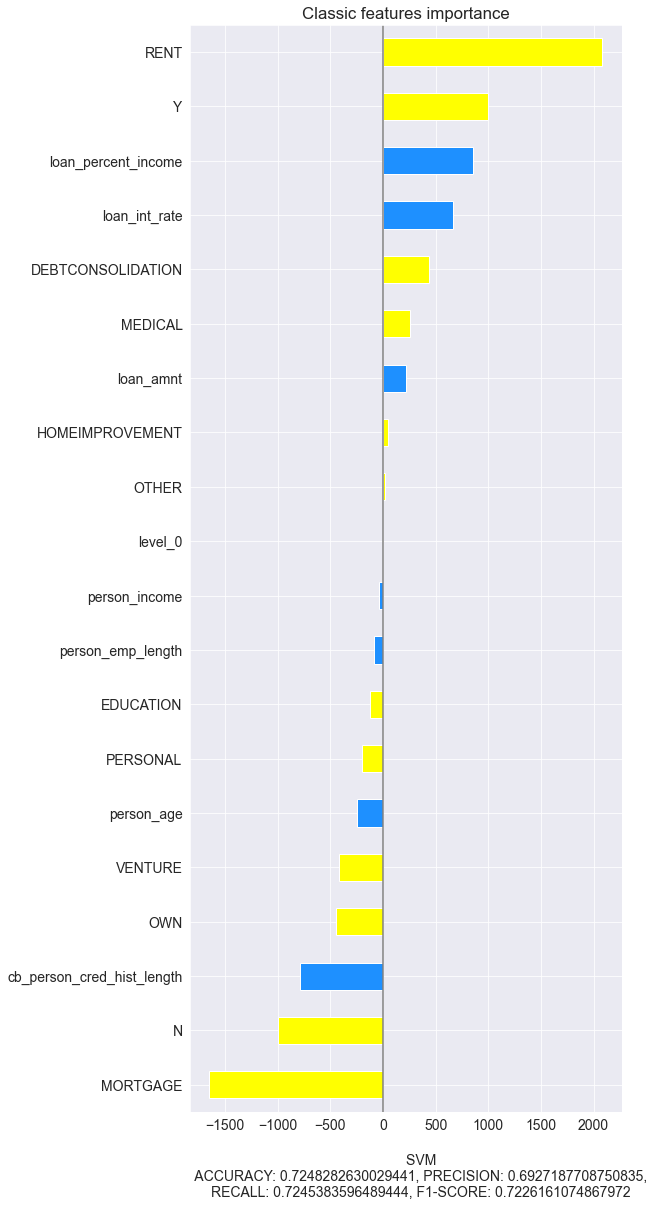

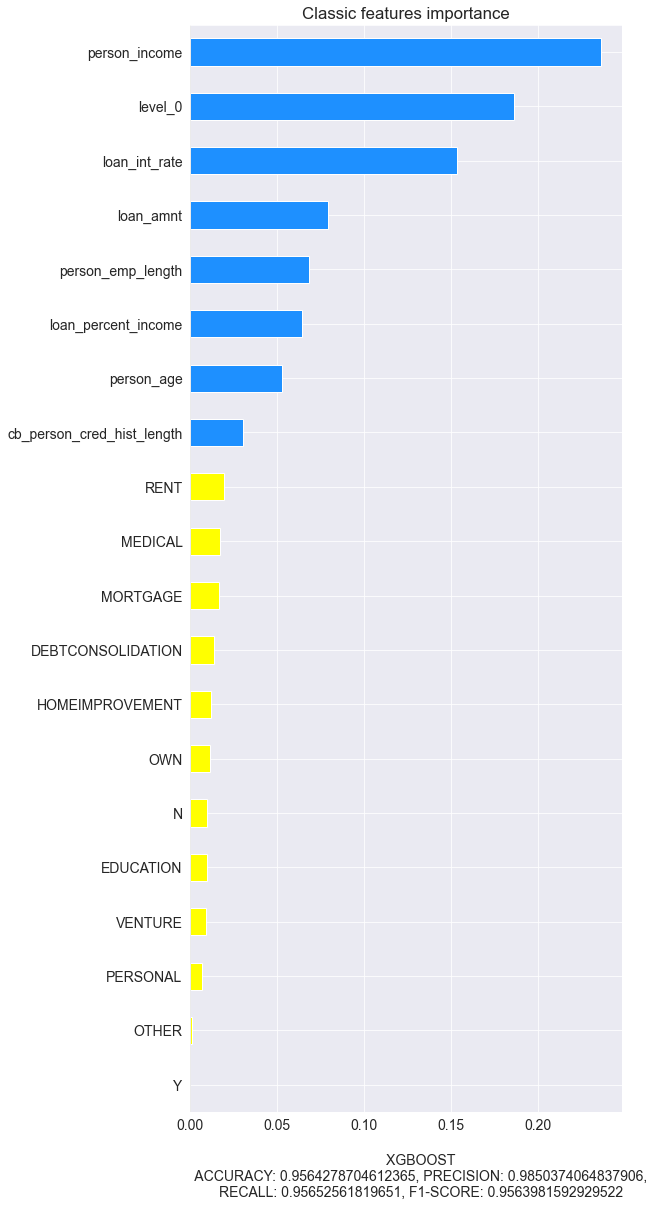

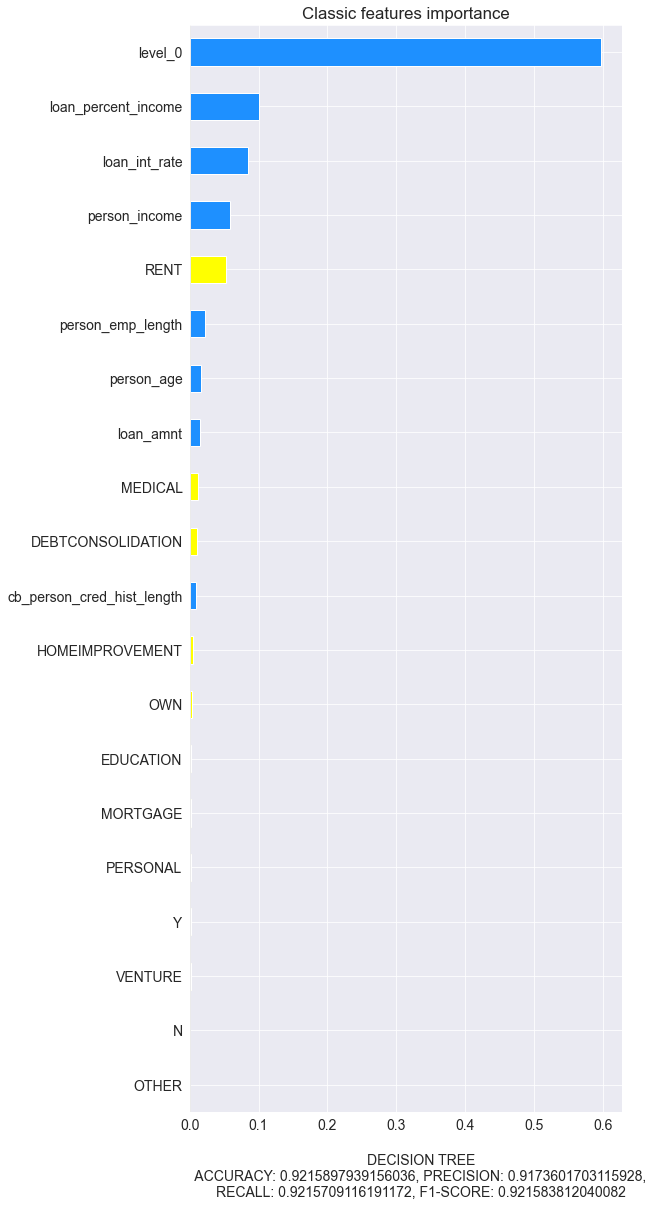

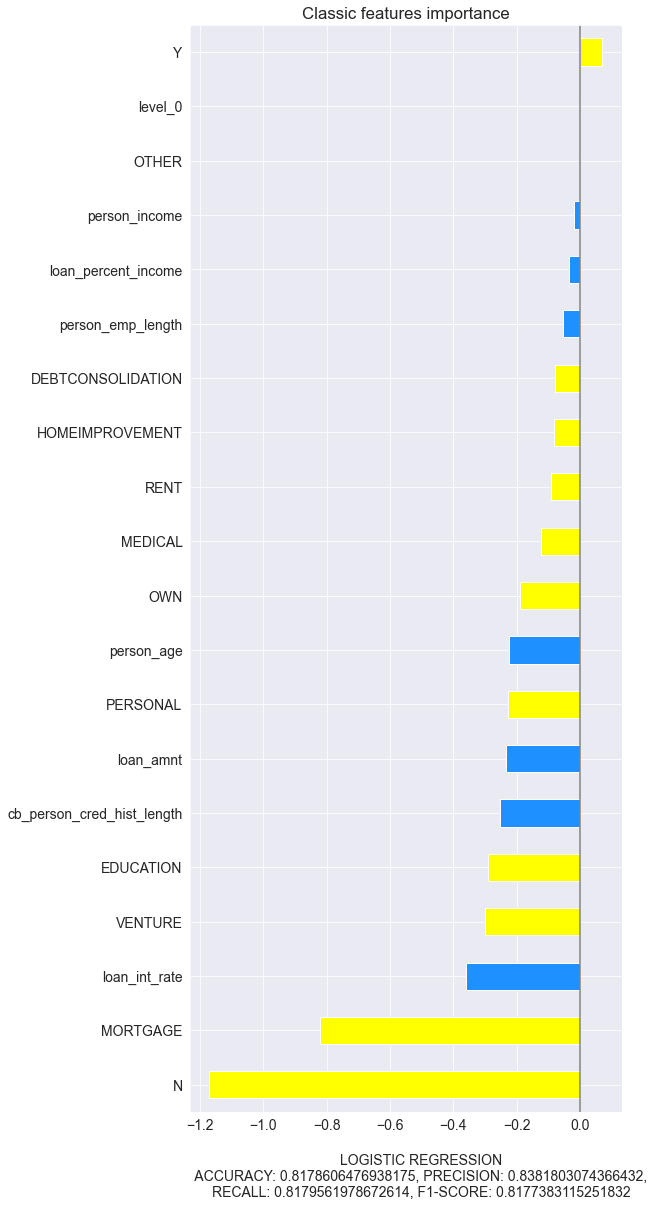

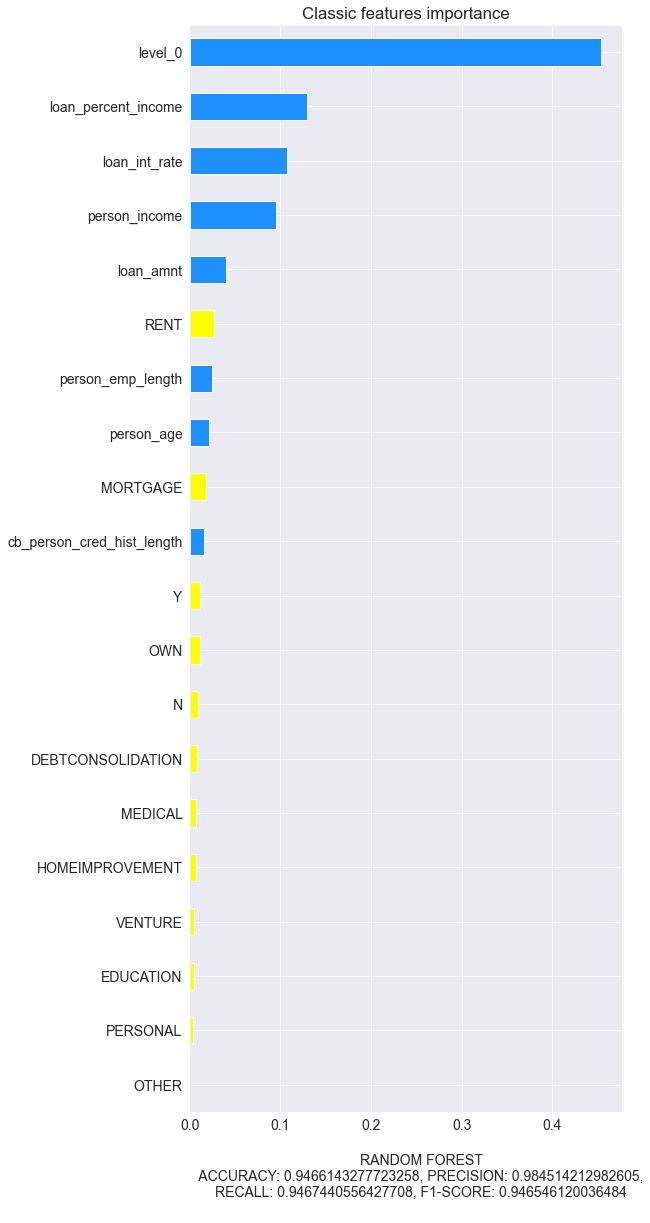

In [126]:
plot_features_importance_as_barh(
    store_original,
    custom_color,
    modelD,
    "Classic features importance",
    [*OHE[0],*OHE[1],*OHE[2]]
)

***Visualiser le coefficient de contribution de chaque attributs classique et celles de toutes les variables extraitent du MLN dans nos modèles de base***

In [127]:
plot_features_importance_as_barh(
    store_mln,
    custom_color,
    modelD,
    "Classic + MLN features importance",
    [*OHE[0],*OHE[1],*OHE[2]]
)

NameError: name 'store_mln' is not defined

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN1 dans nos modèles de base***

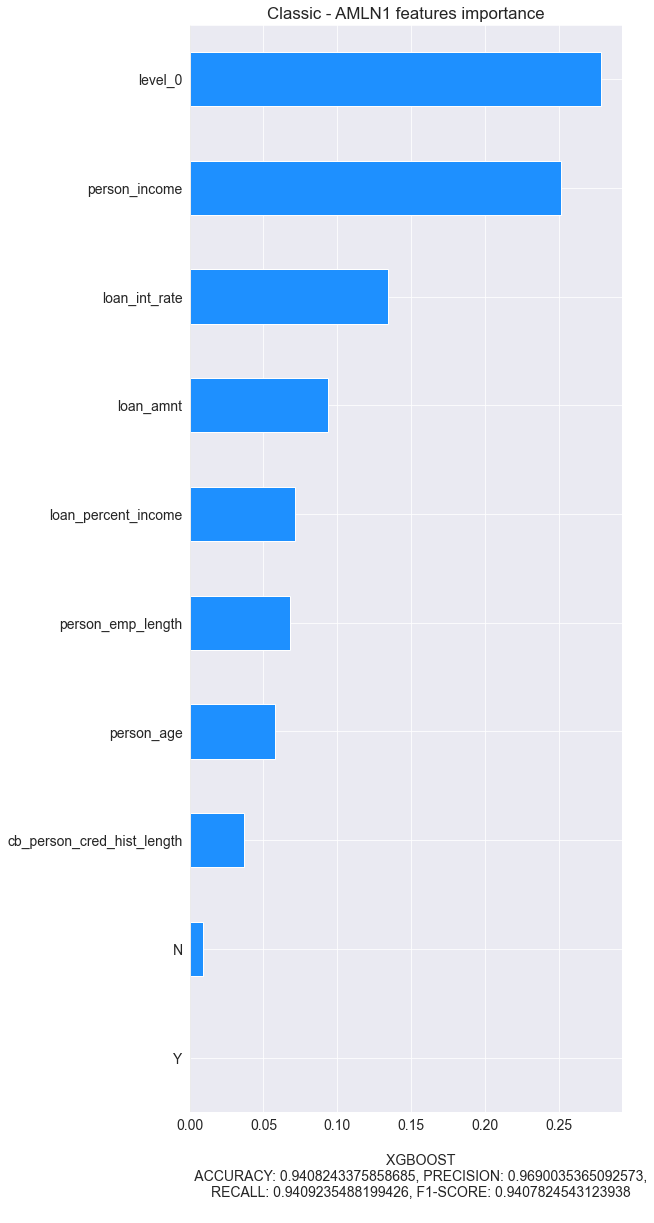

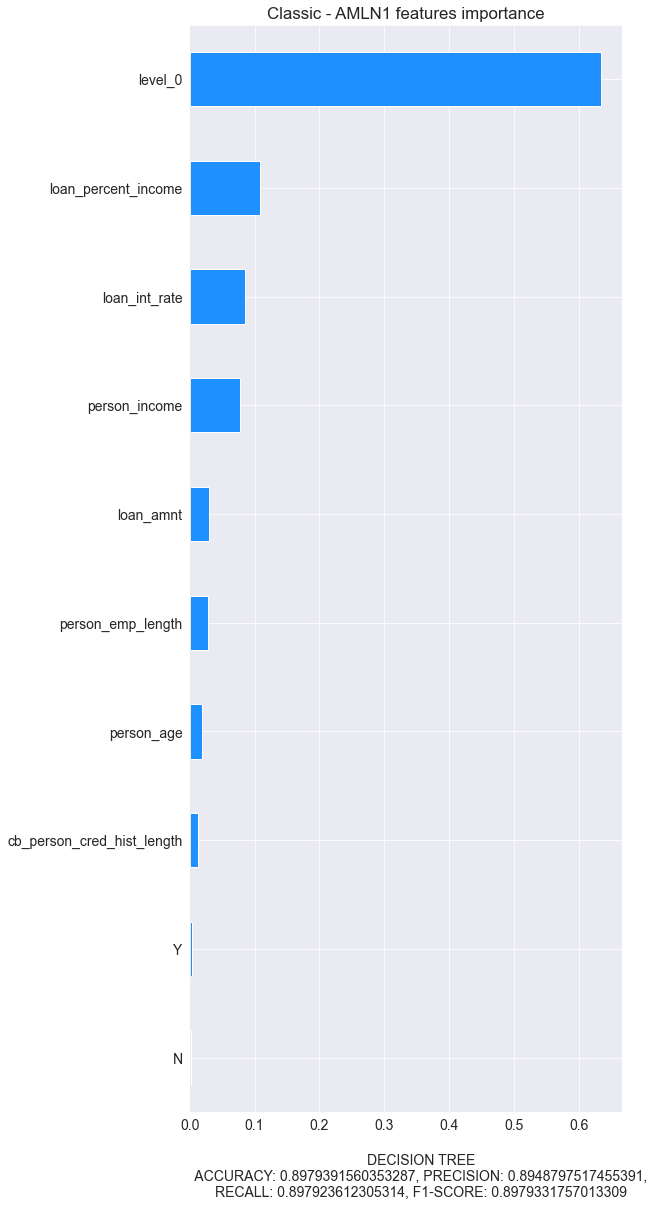

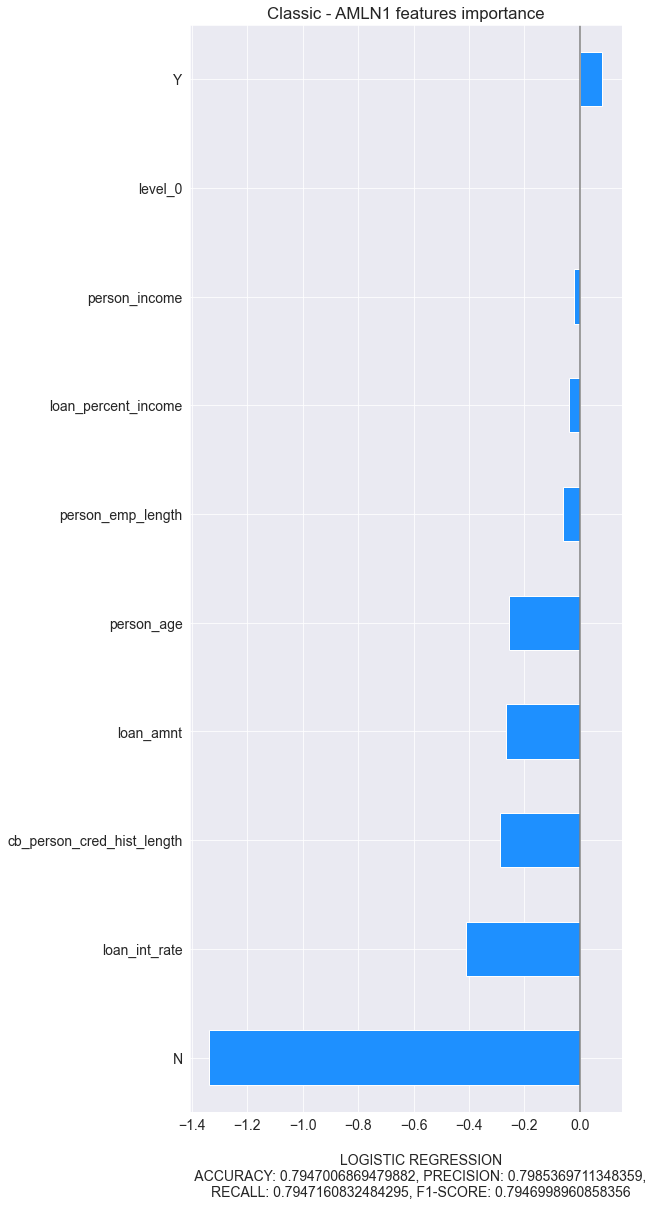

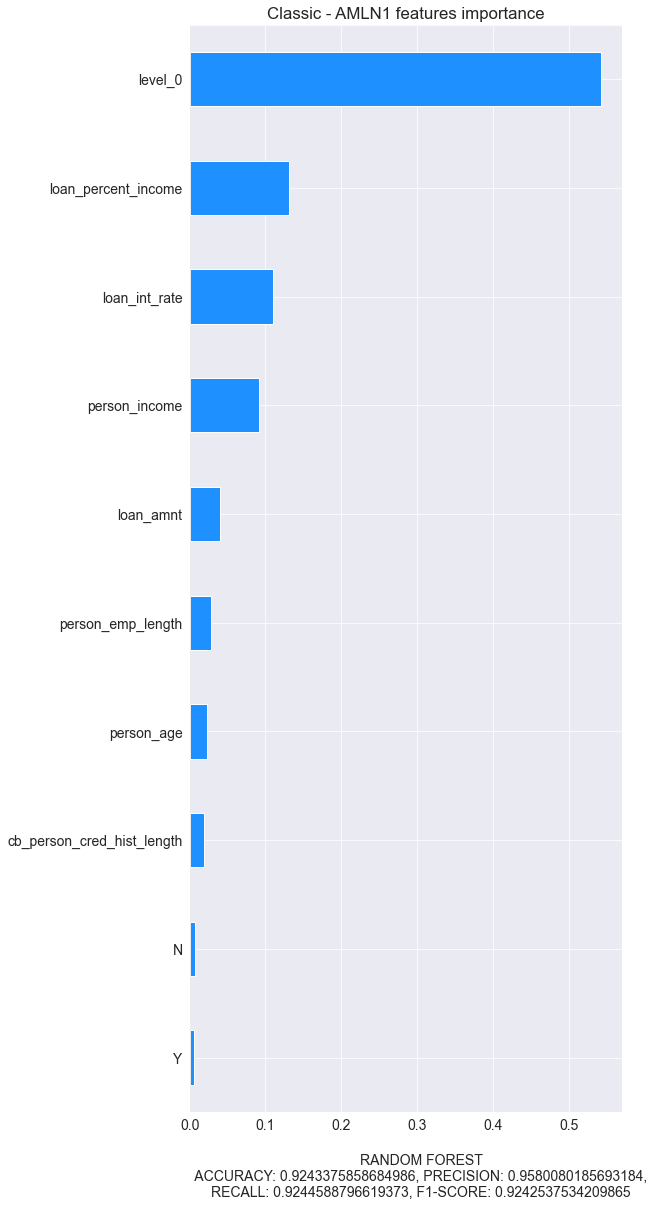

In [128]:
plot_features_importance_as_barh(
    store_c1,
    custom_color,
    modelD,
    "Classic - AMLN1 features importance"
)

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN2 dans nos modèles de base***

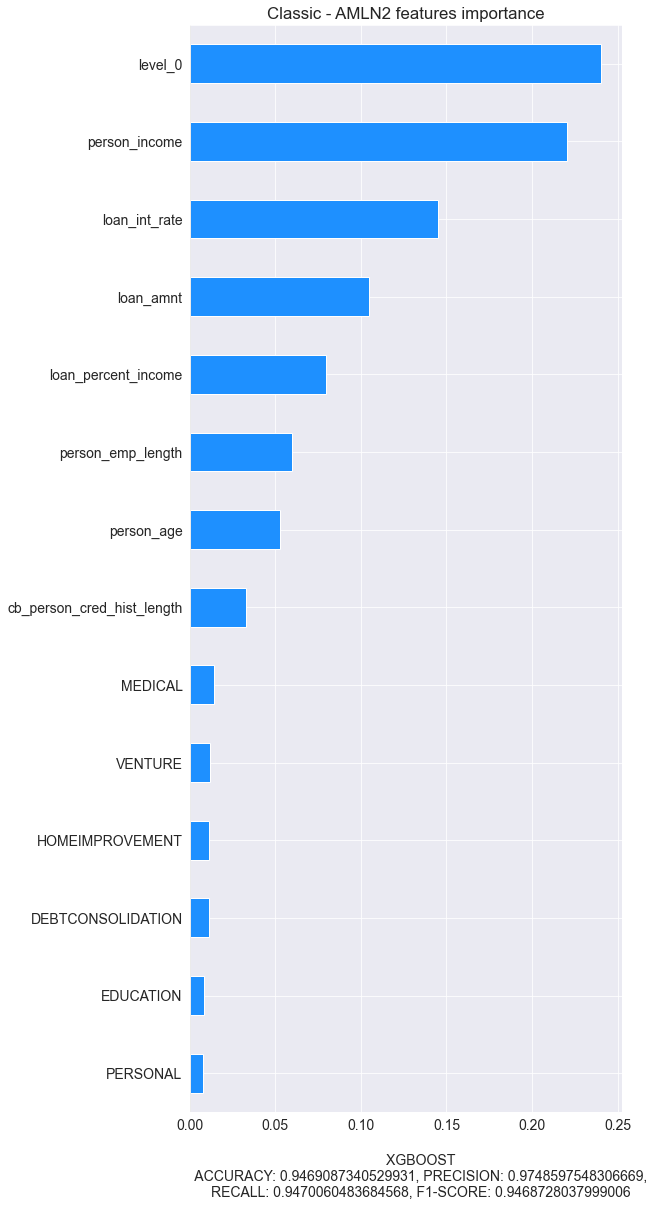

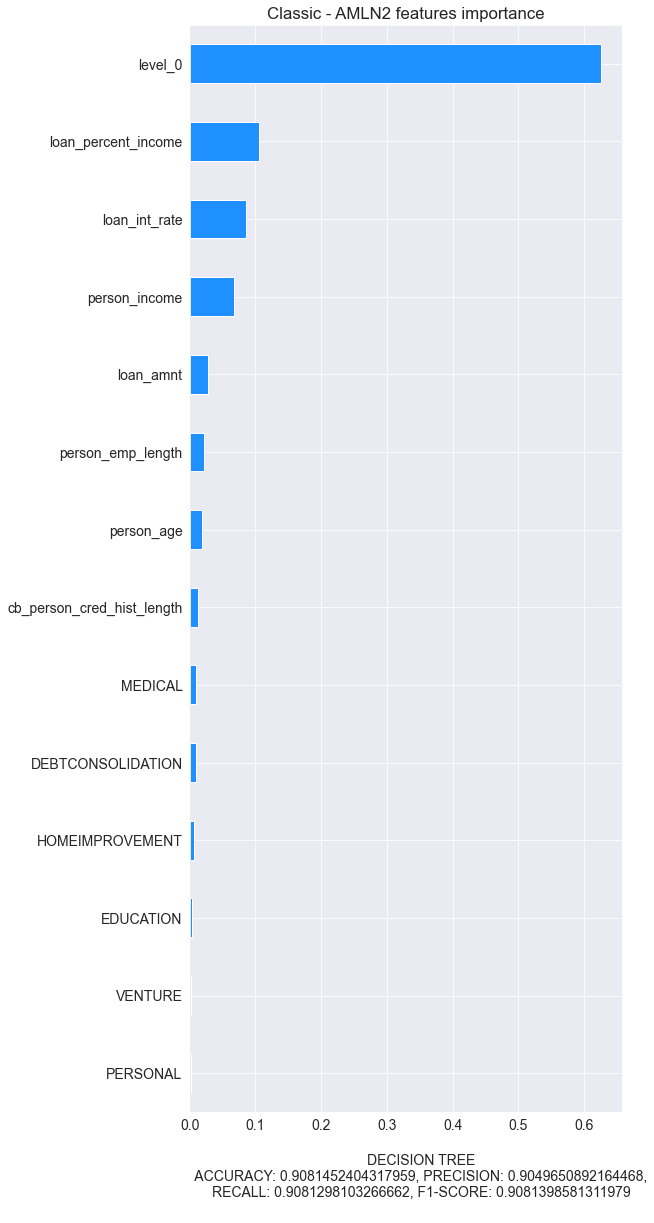

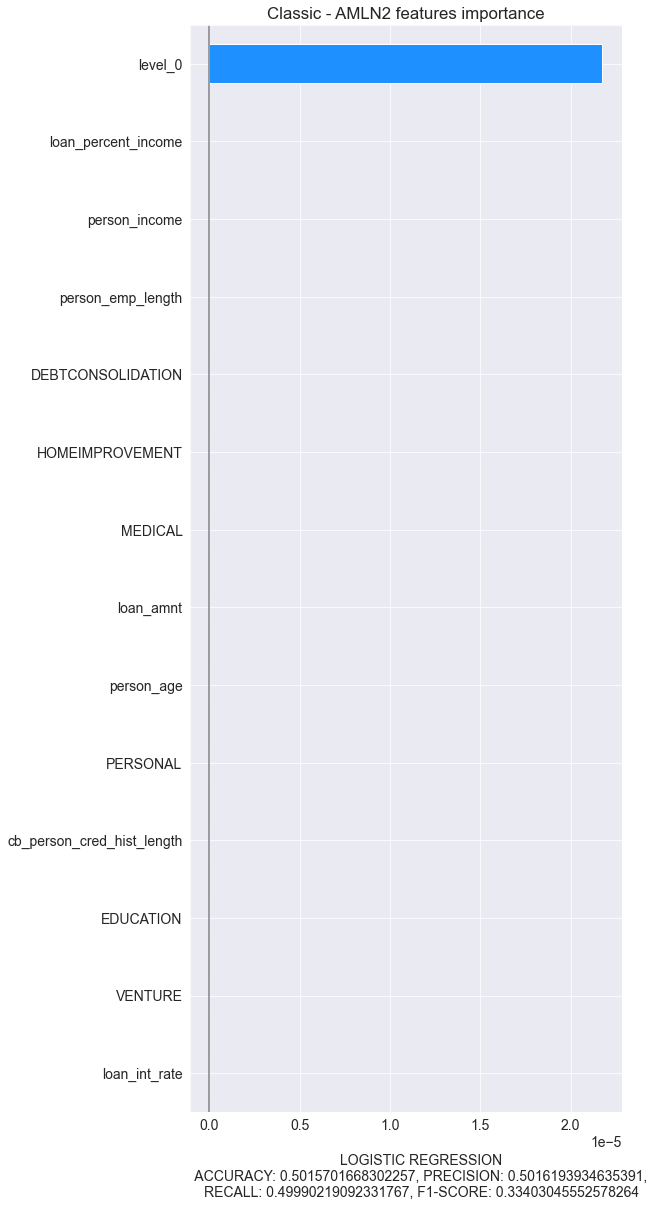

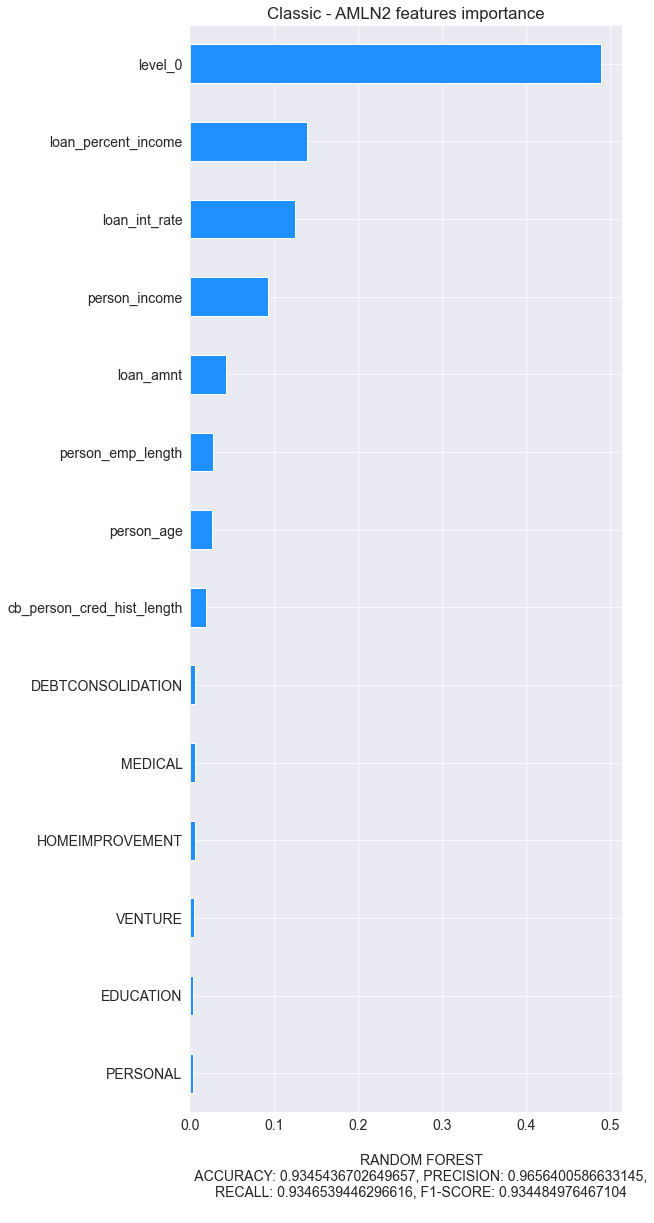

In [129]:
plot_features_importance_as_barh(
    store_c2,
    custom_color,
    modelD,
    "Classic - AMLN2 features importance"
)

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN3 dans nos modèles de base***

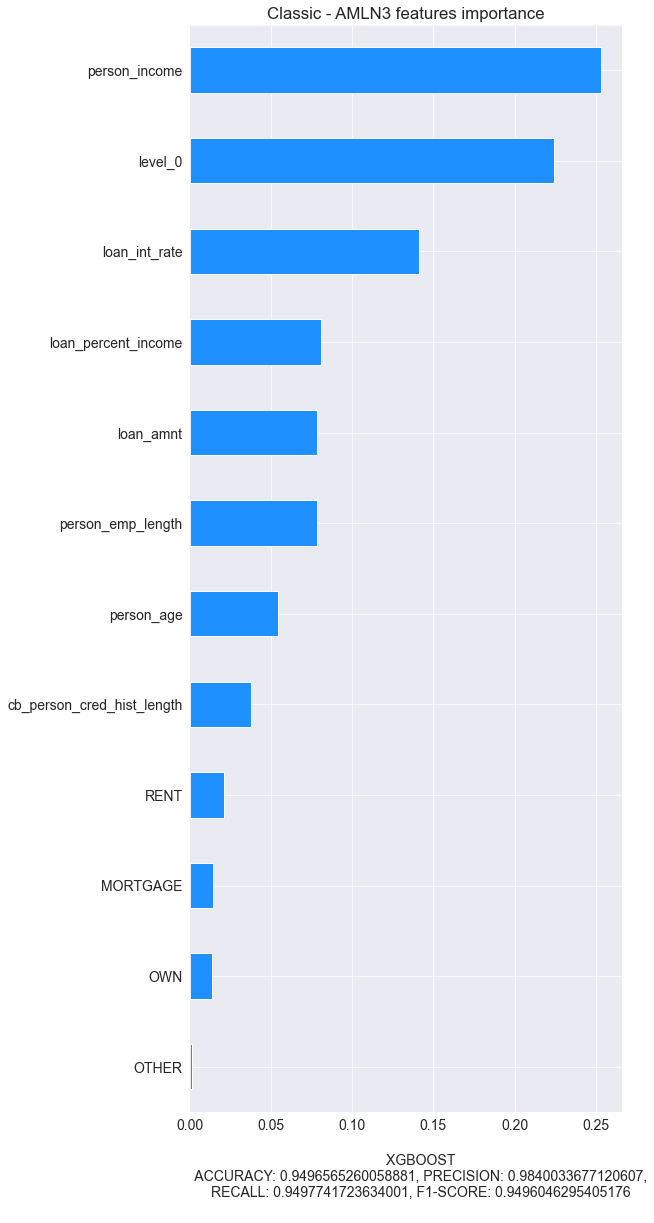

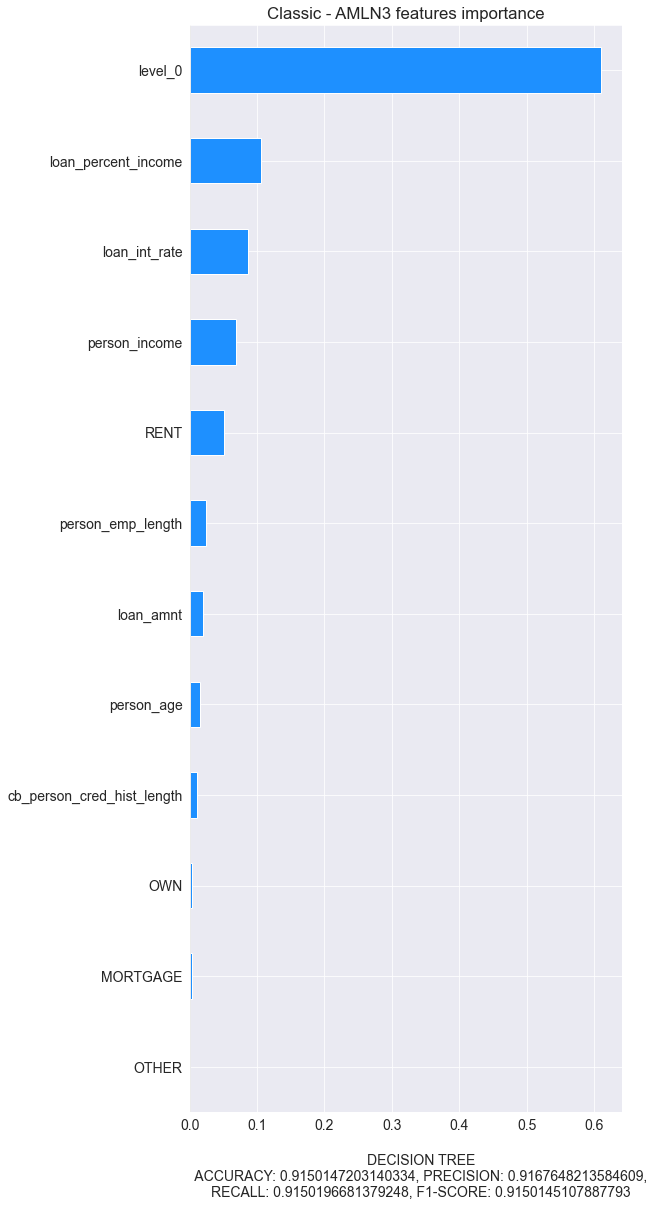

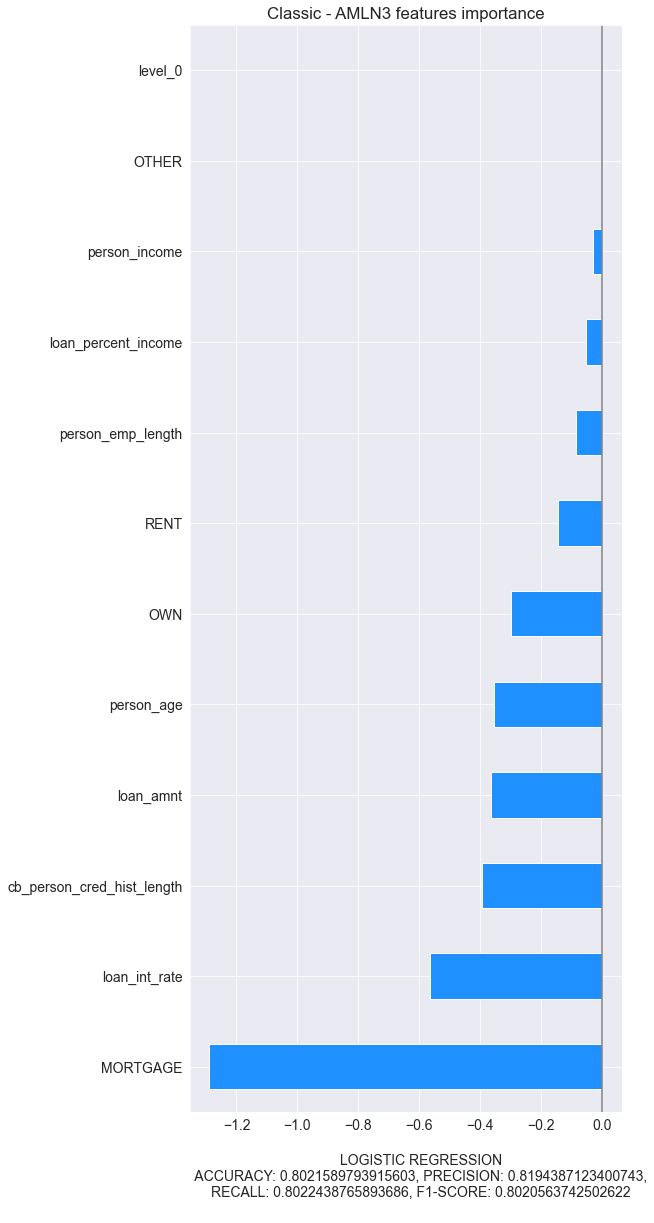

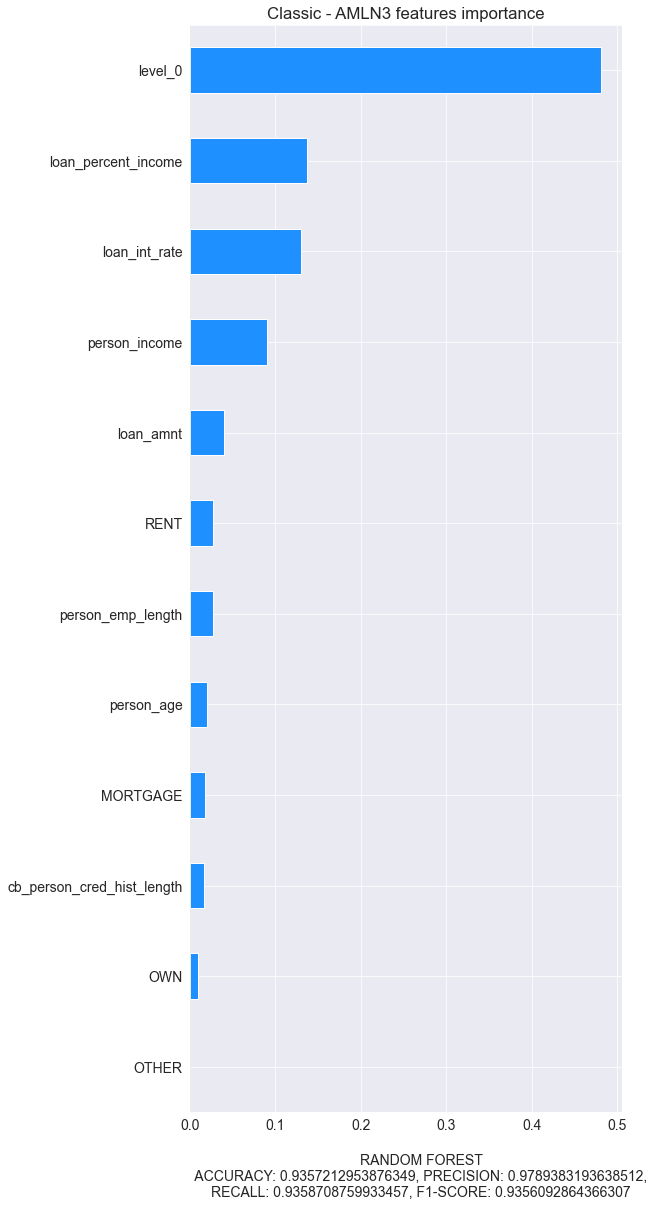

In [130]:
plot_features_importance_as_barh(
    store_c3,
    custom_color,
    modelD,
    "Classic - AMLN3 features importance"
)

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN1 puis augmenté des variables extraitent de ce MLN dans nos modèles de base***

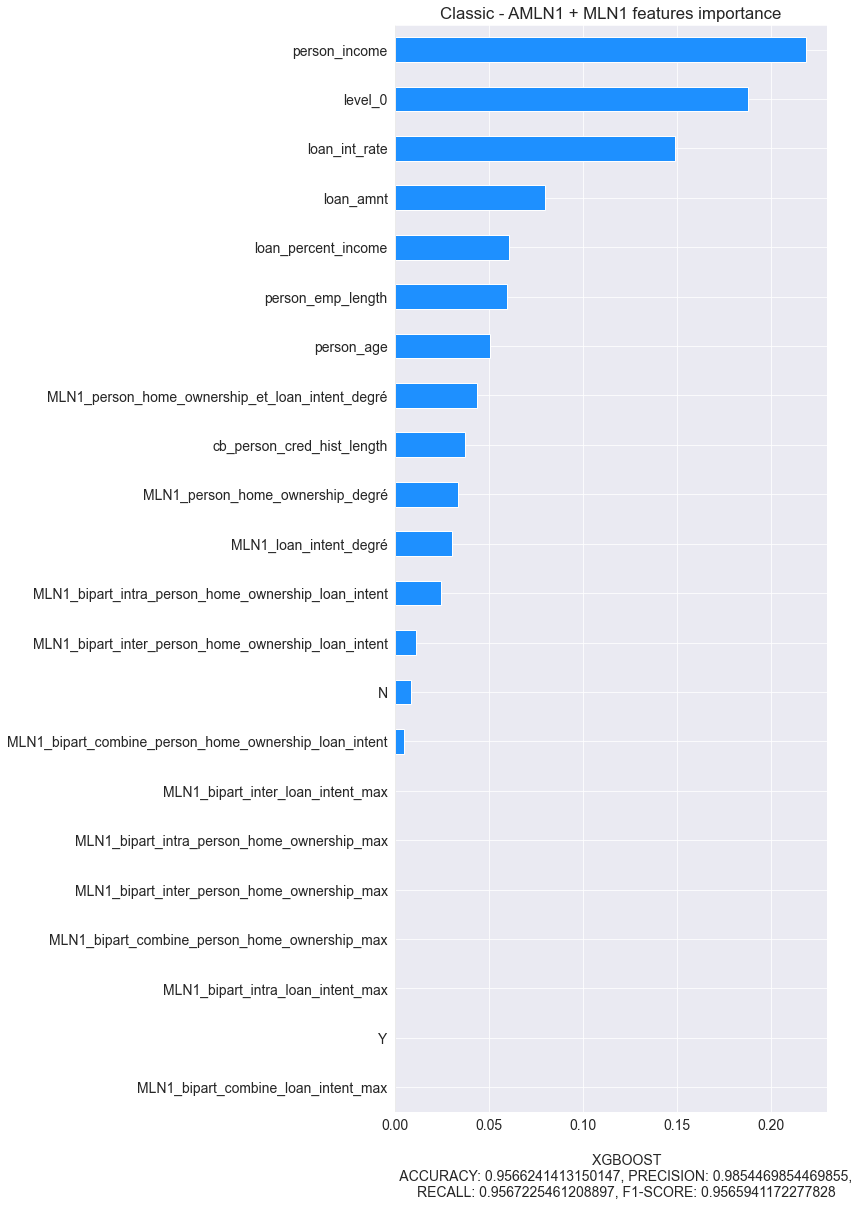

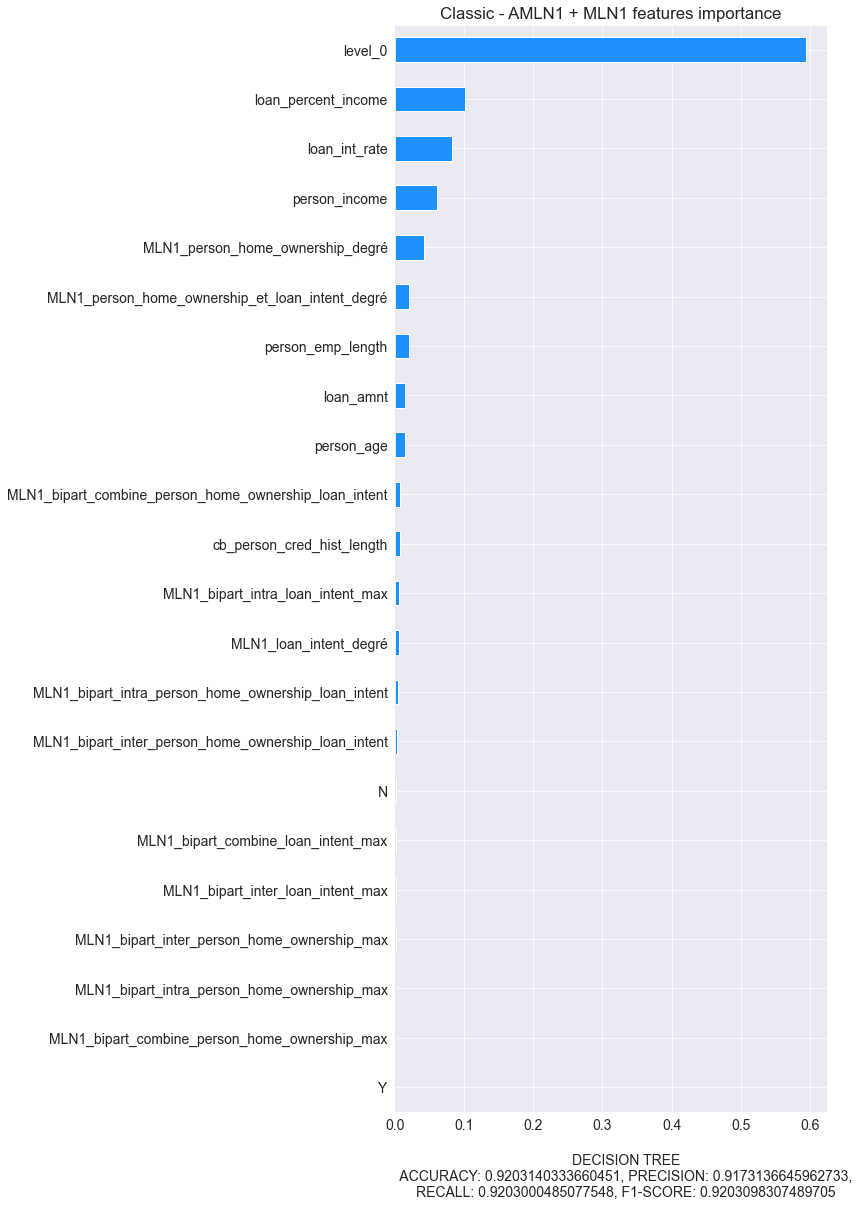

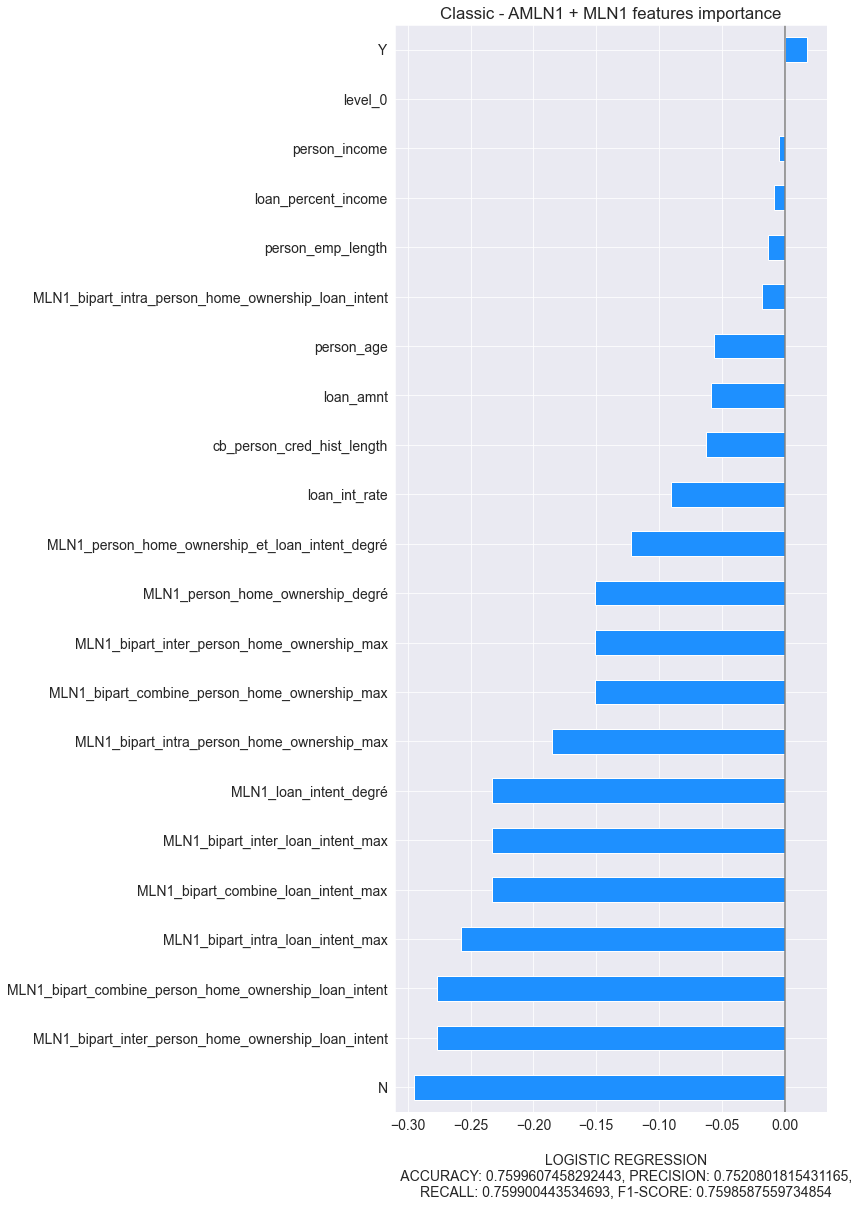

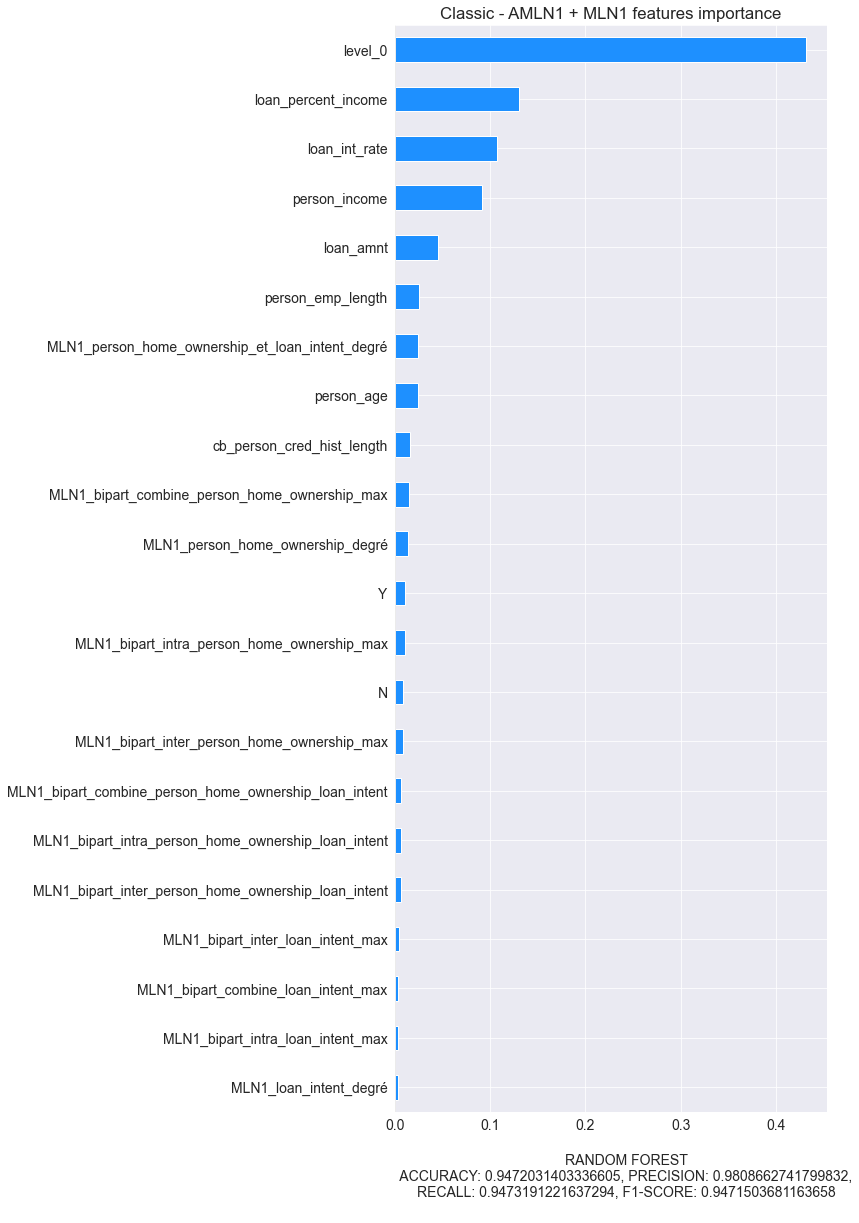

In [131]:
plot_features_importance_as_barh(
    store_c1_mln,
    custom_color,
    modelD,
    "Classic - AMLN1 + MLN1 features importance"
)

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN2 puis augmenté des variables extraitent de ce MLN dans nos modèles de base***

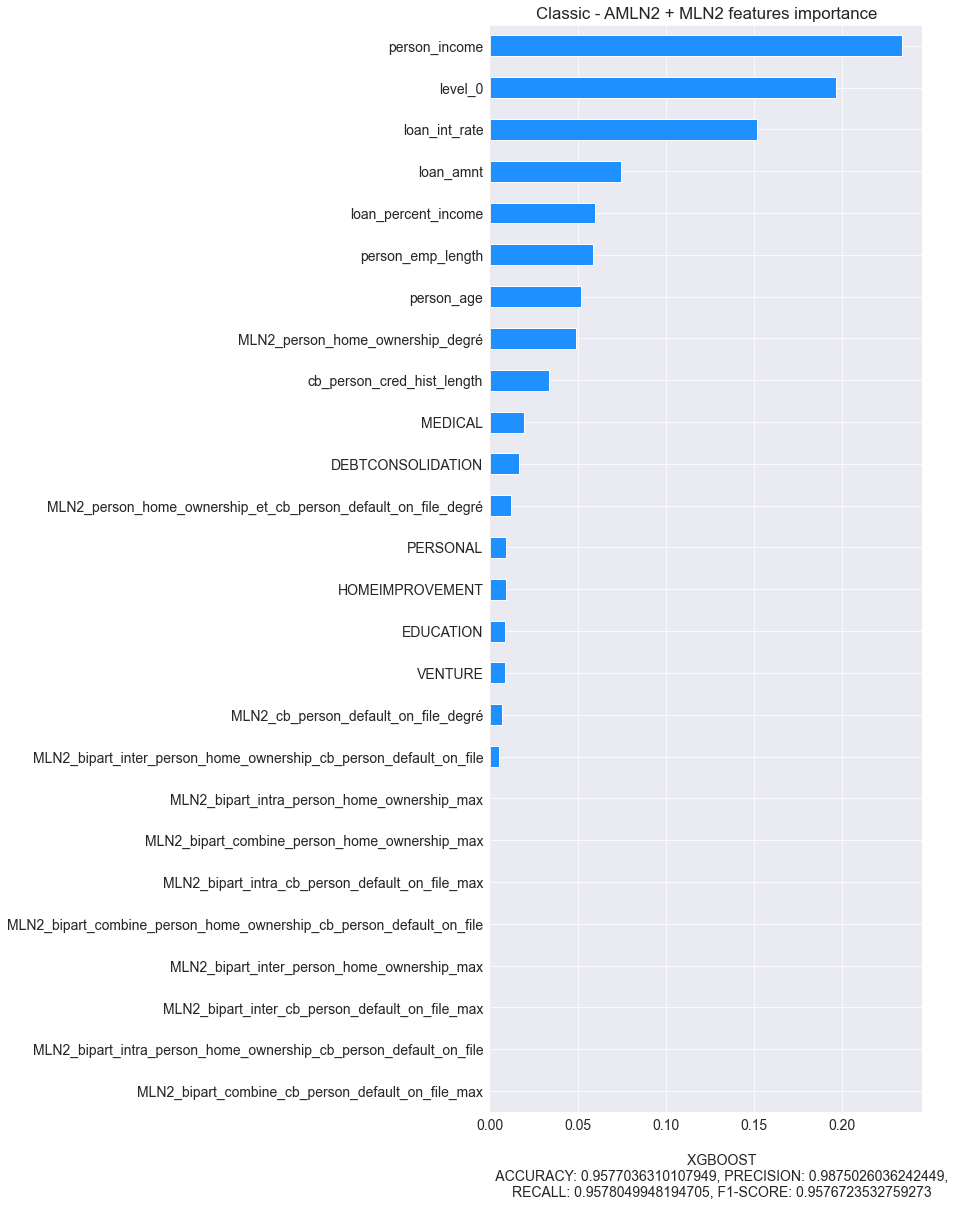

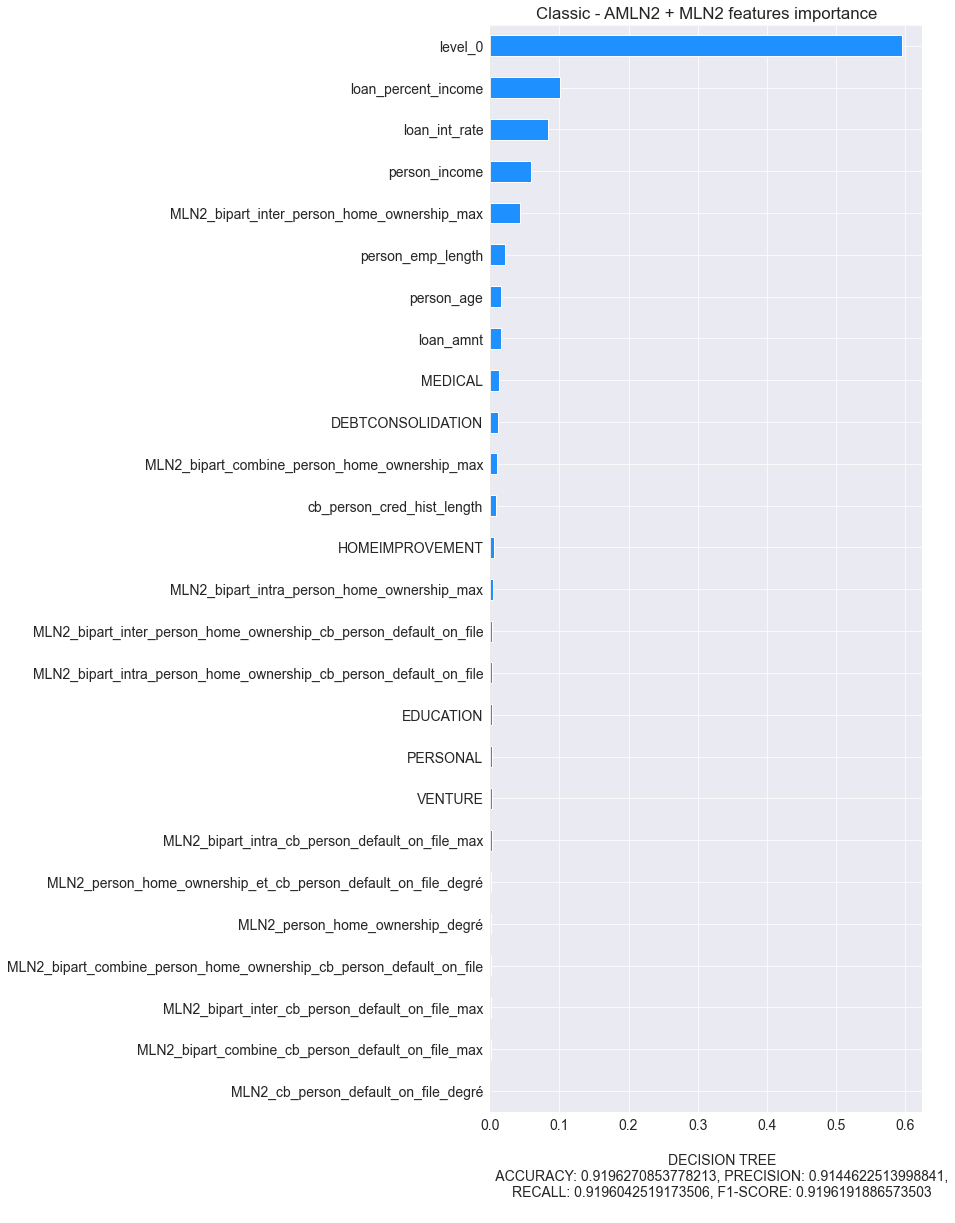

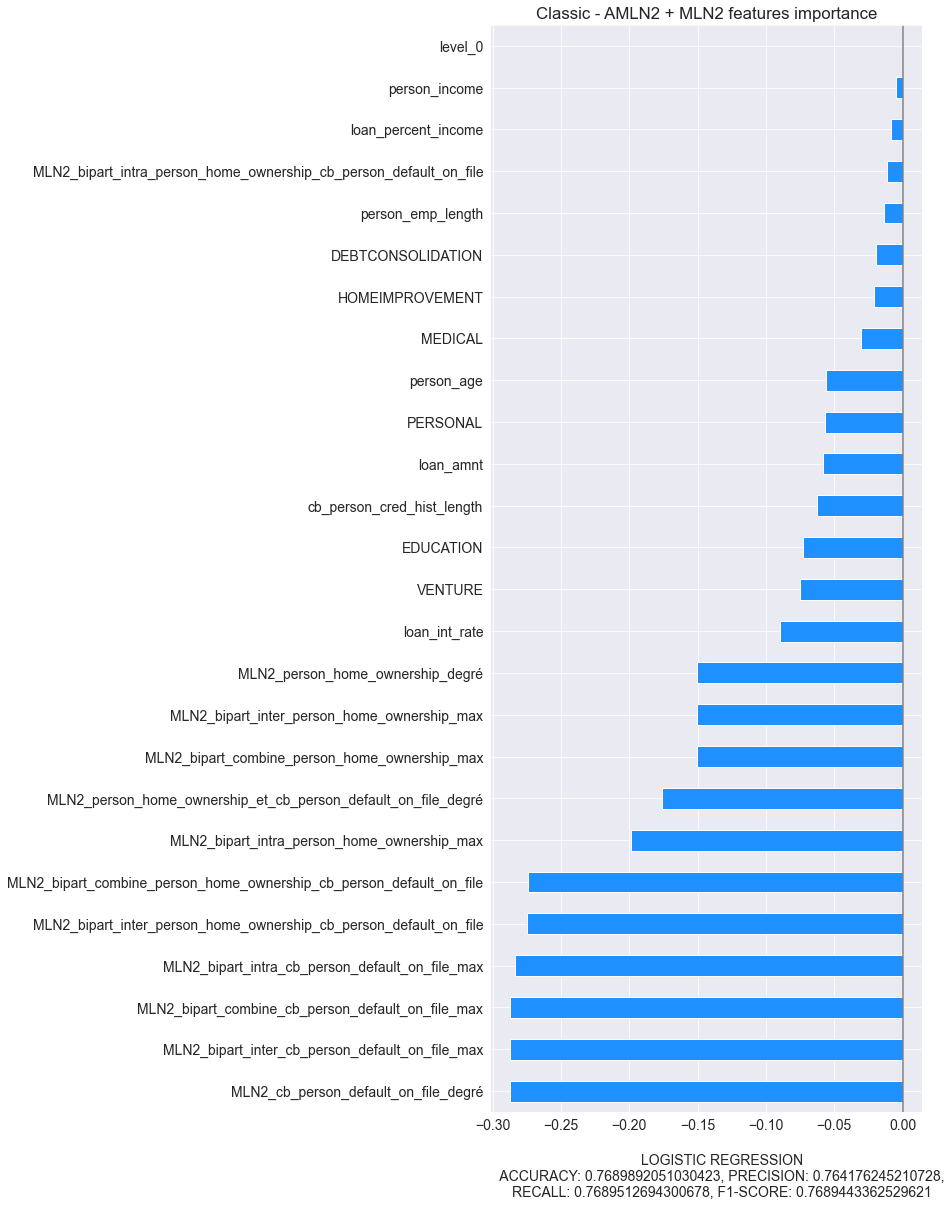

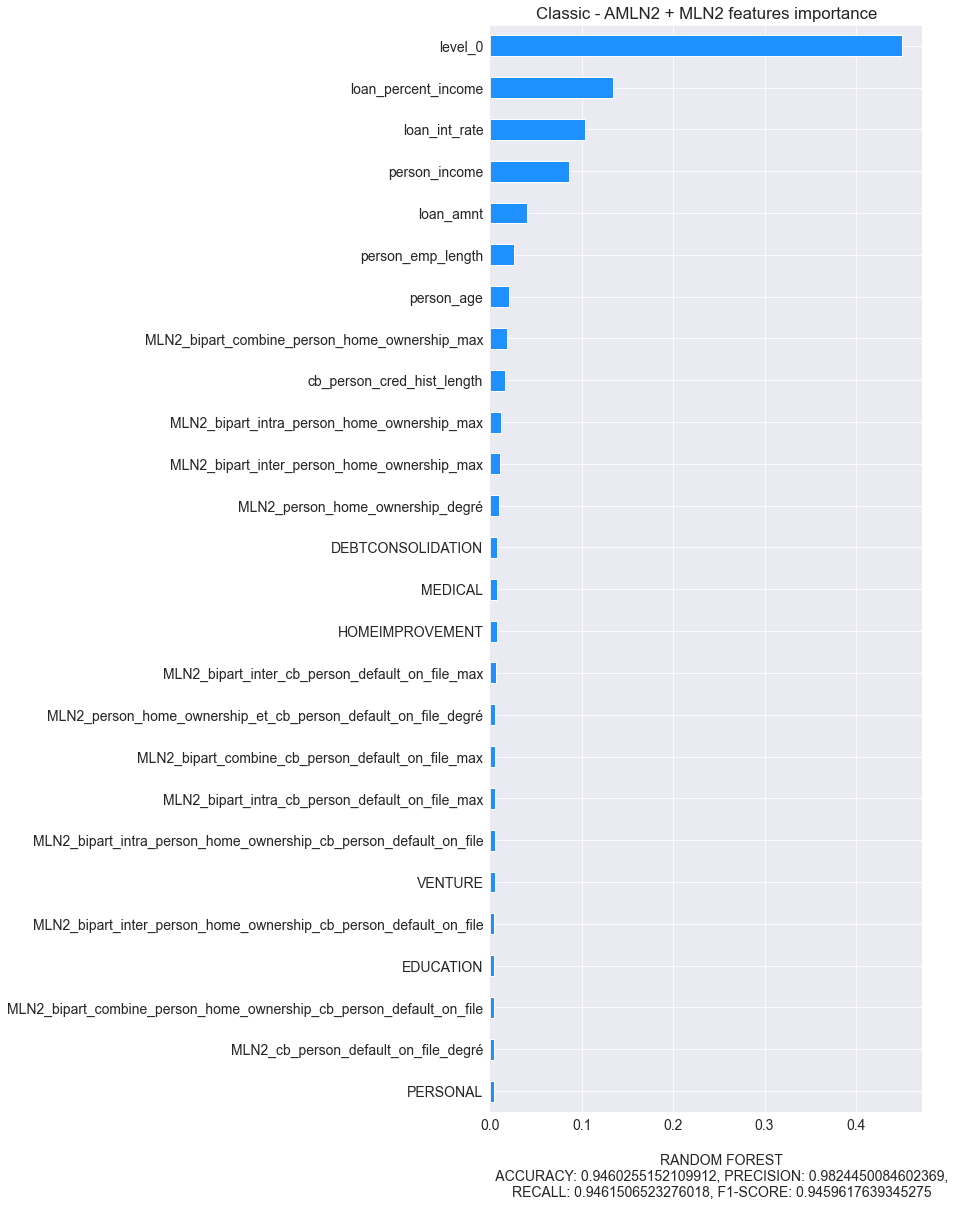

In [132]:
plot_features_importance_as_barh(
    store_c2_mln,
    custom_color,
    modelD,
    "Classic - AMLN2 + MLN2 features importance",
)

***Visualiser le coefficient de contribution de chaque attributs classique diminuer des attributs du MLN3 puis augmenté des variables extraitent de ce MLN dans nos modèles de base***

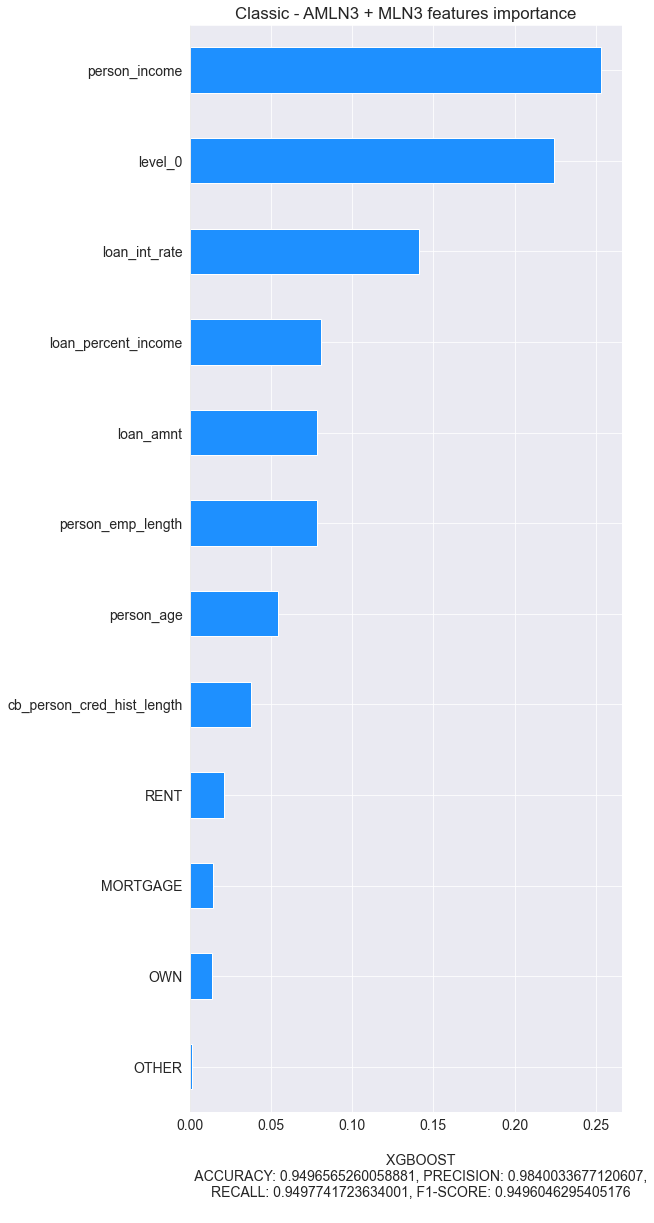

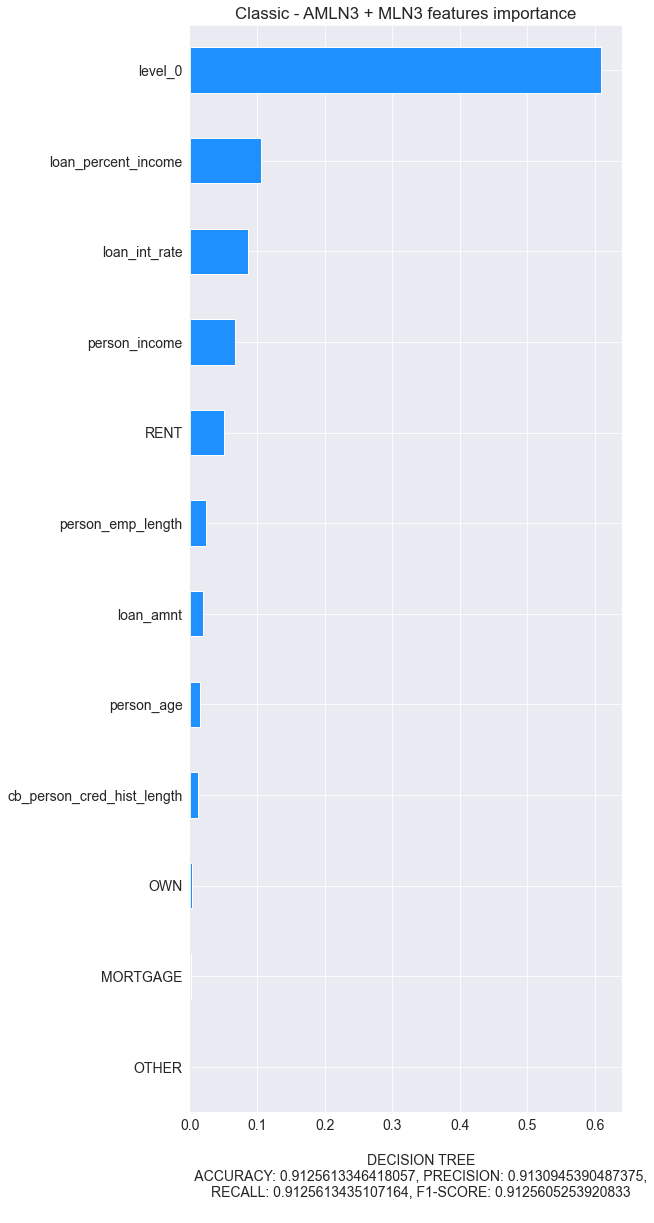

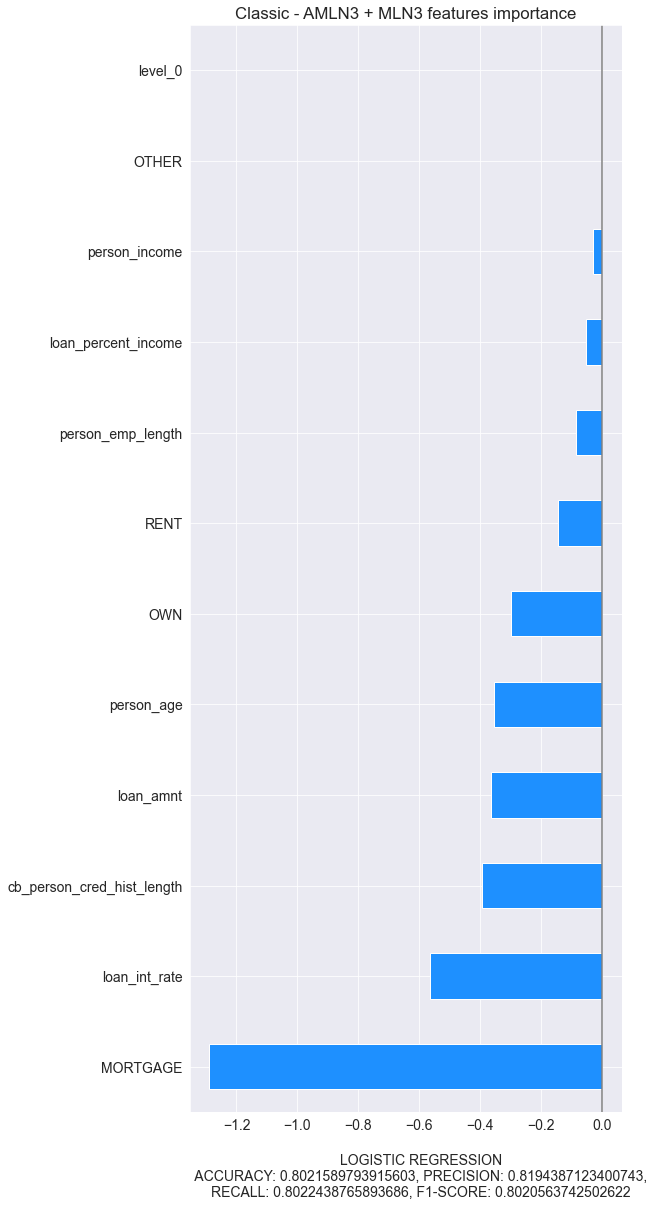

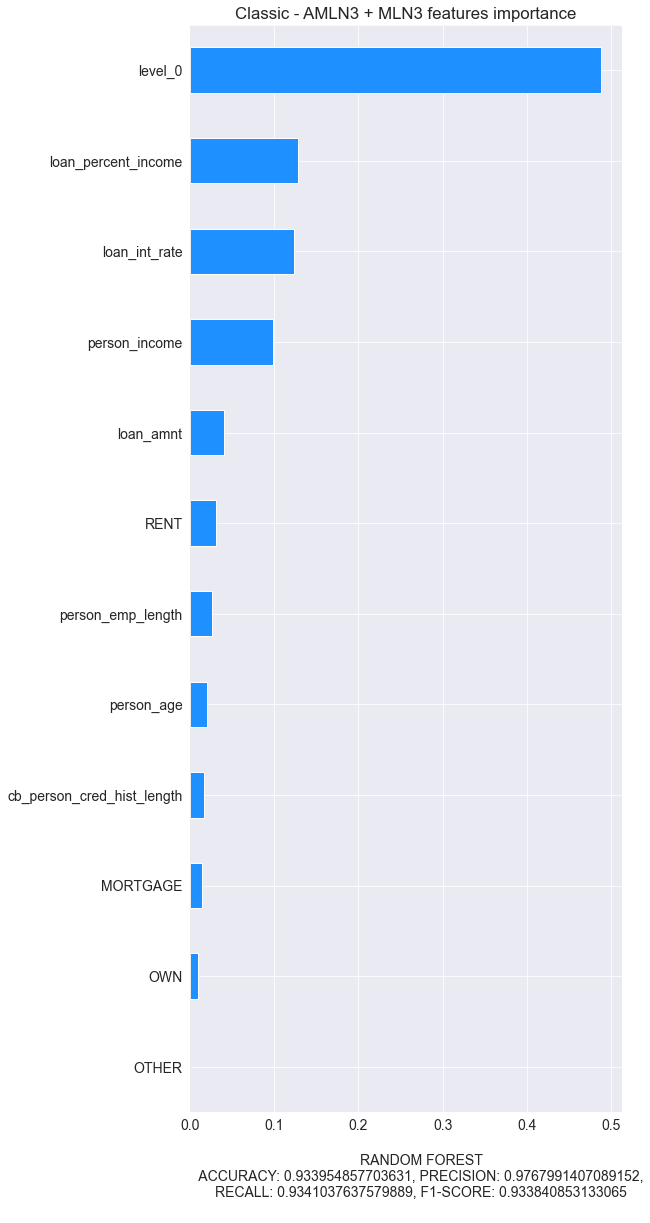

In [133]:
plot_features_importance_as_barh(
    store_c3_mln,
    custom_color,
    modelD,
    "Classic - AMLN3 + MLN3 features importance",
)

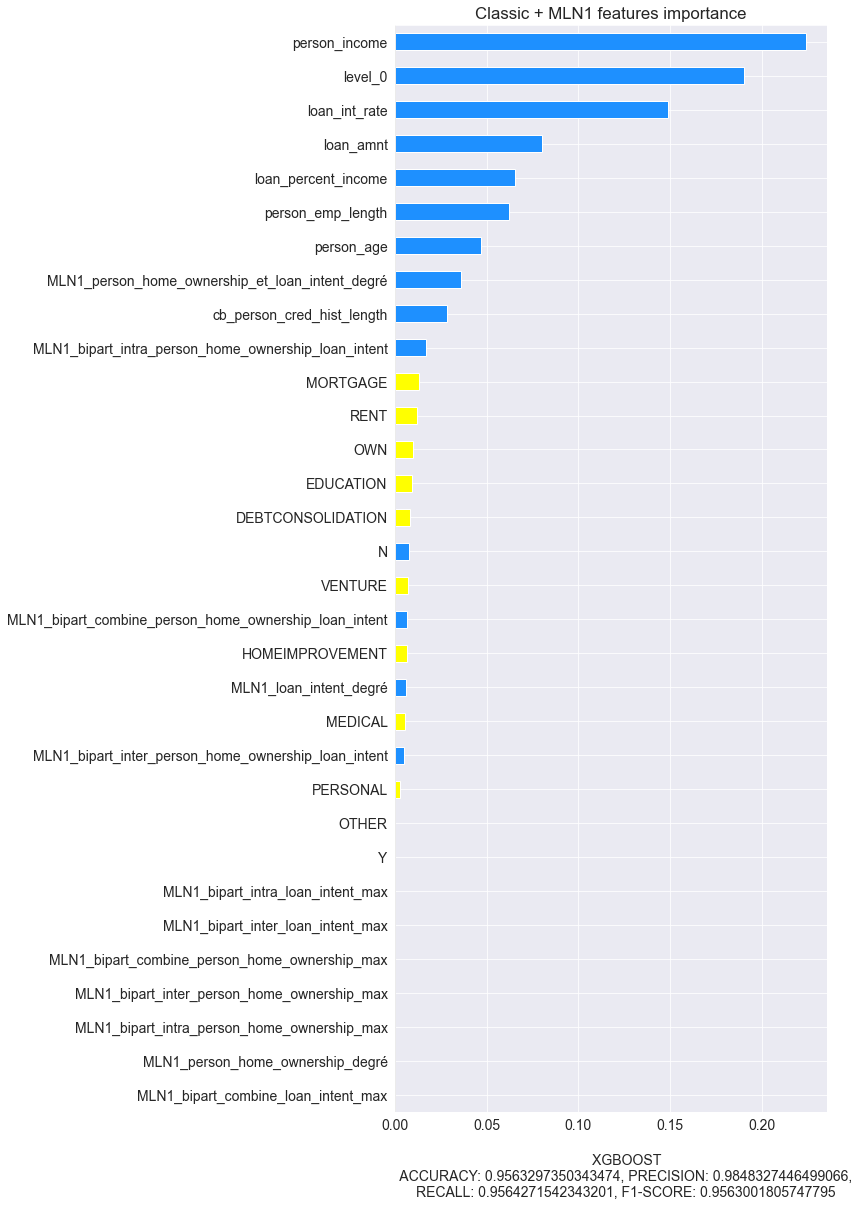

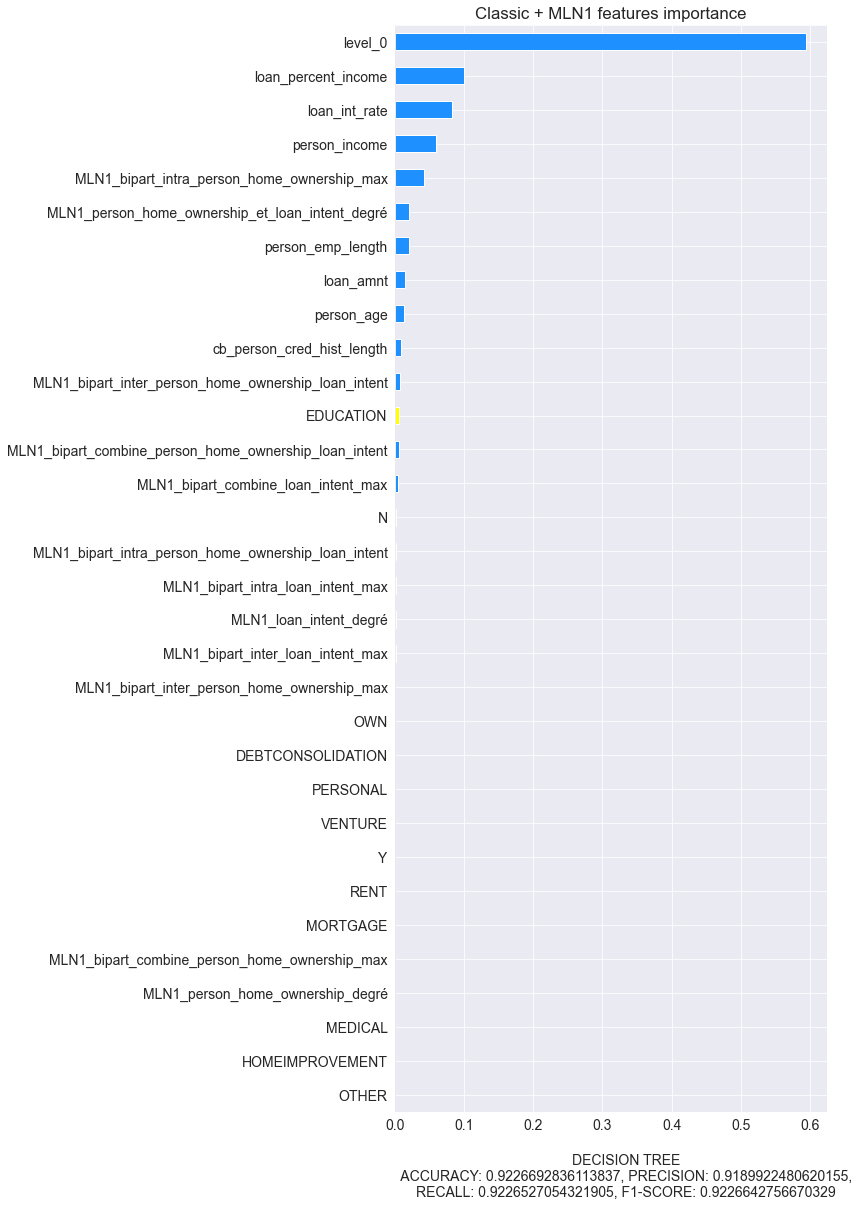

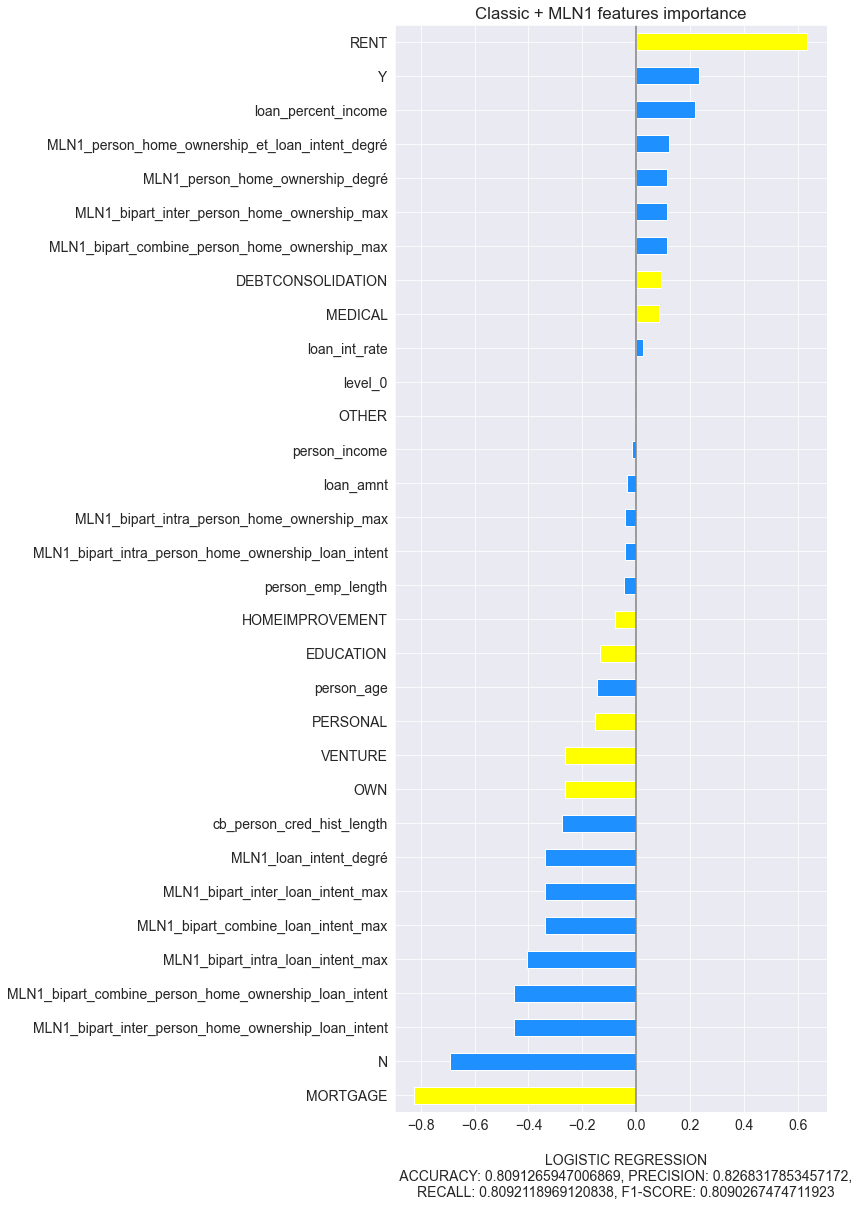

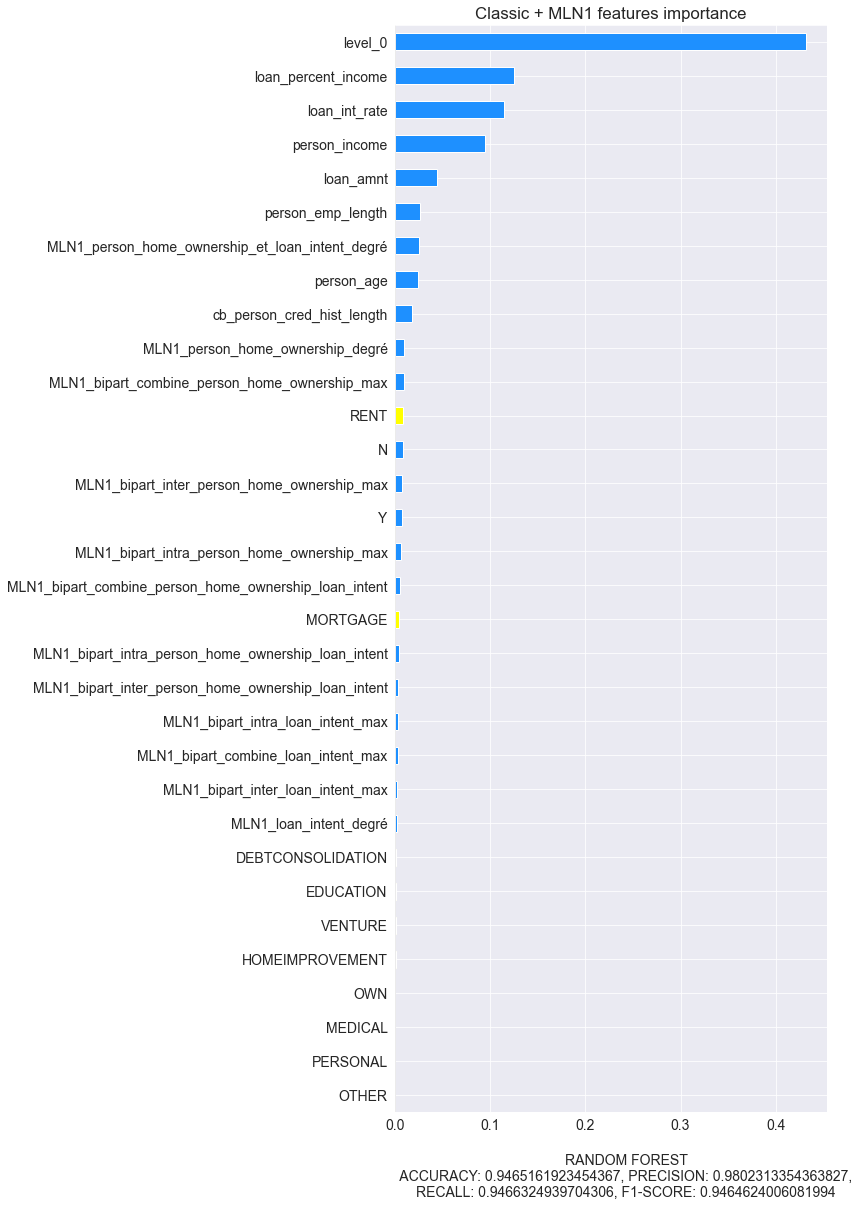

In [134]:
plot_features_importance_as_barh(
    store_mln_1,
    custom_color,
    modelD,
    "Classic + MLN1 features importance",
    [*OHE[0],*OHE[1]]
)

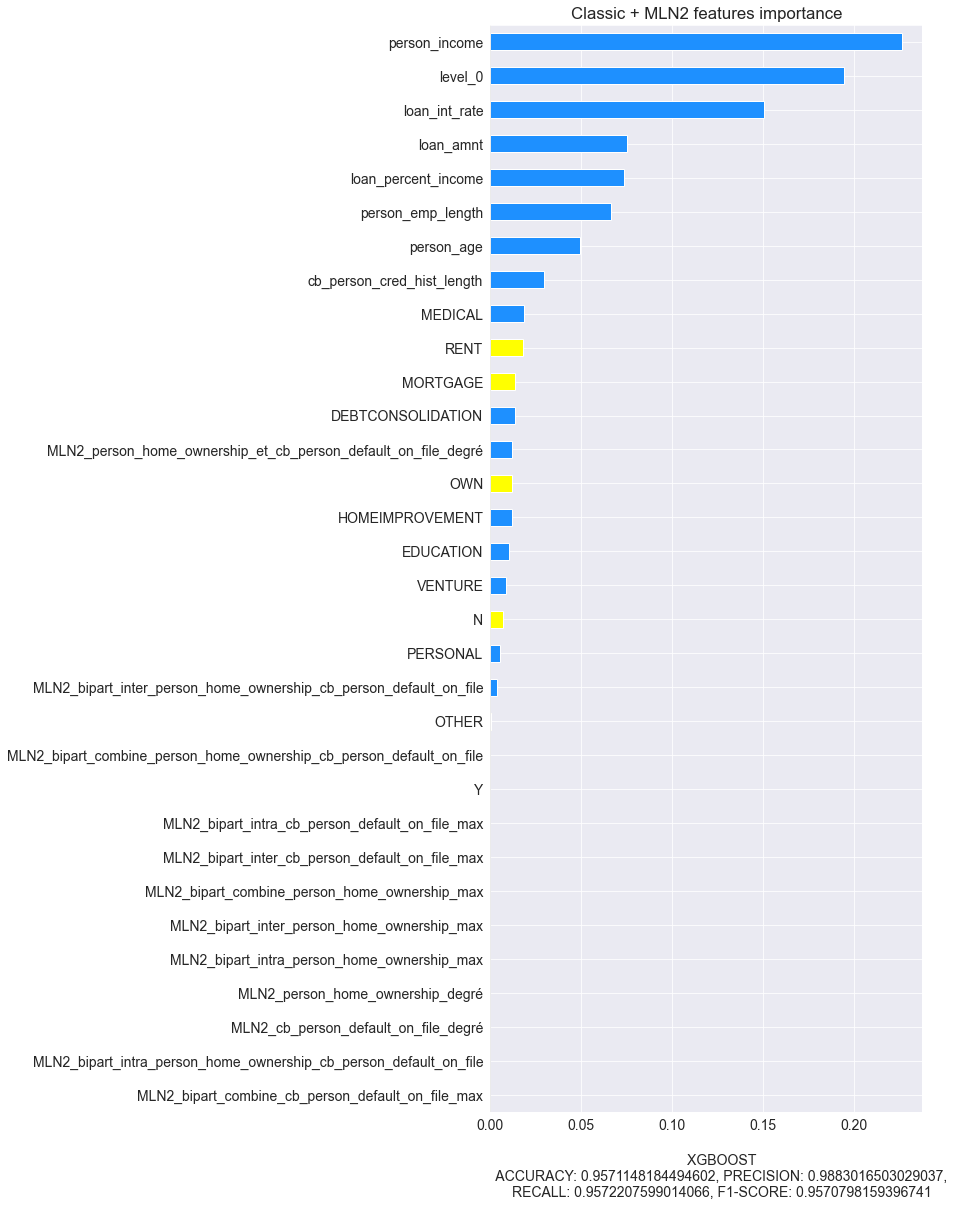

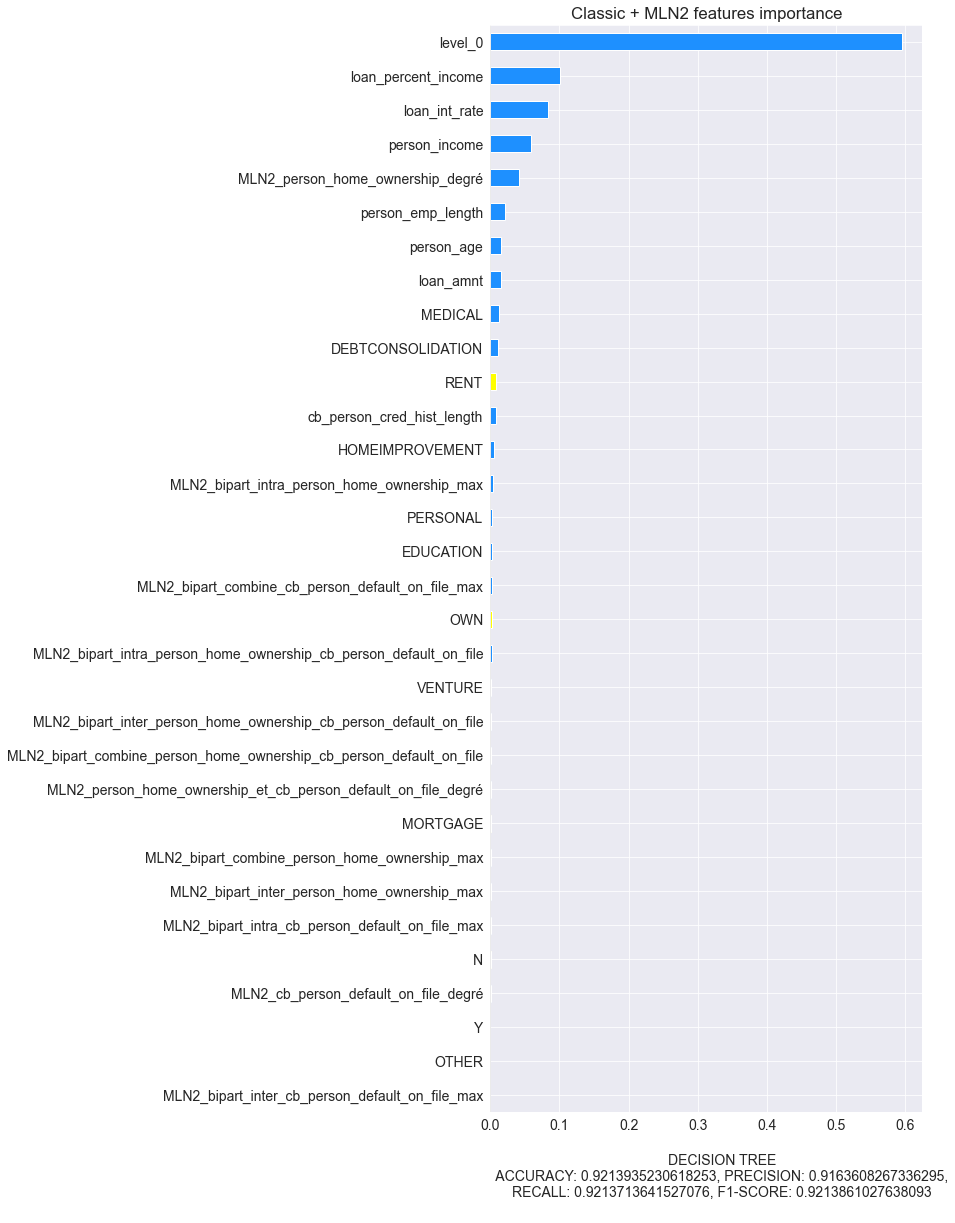

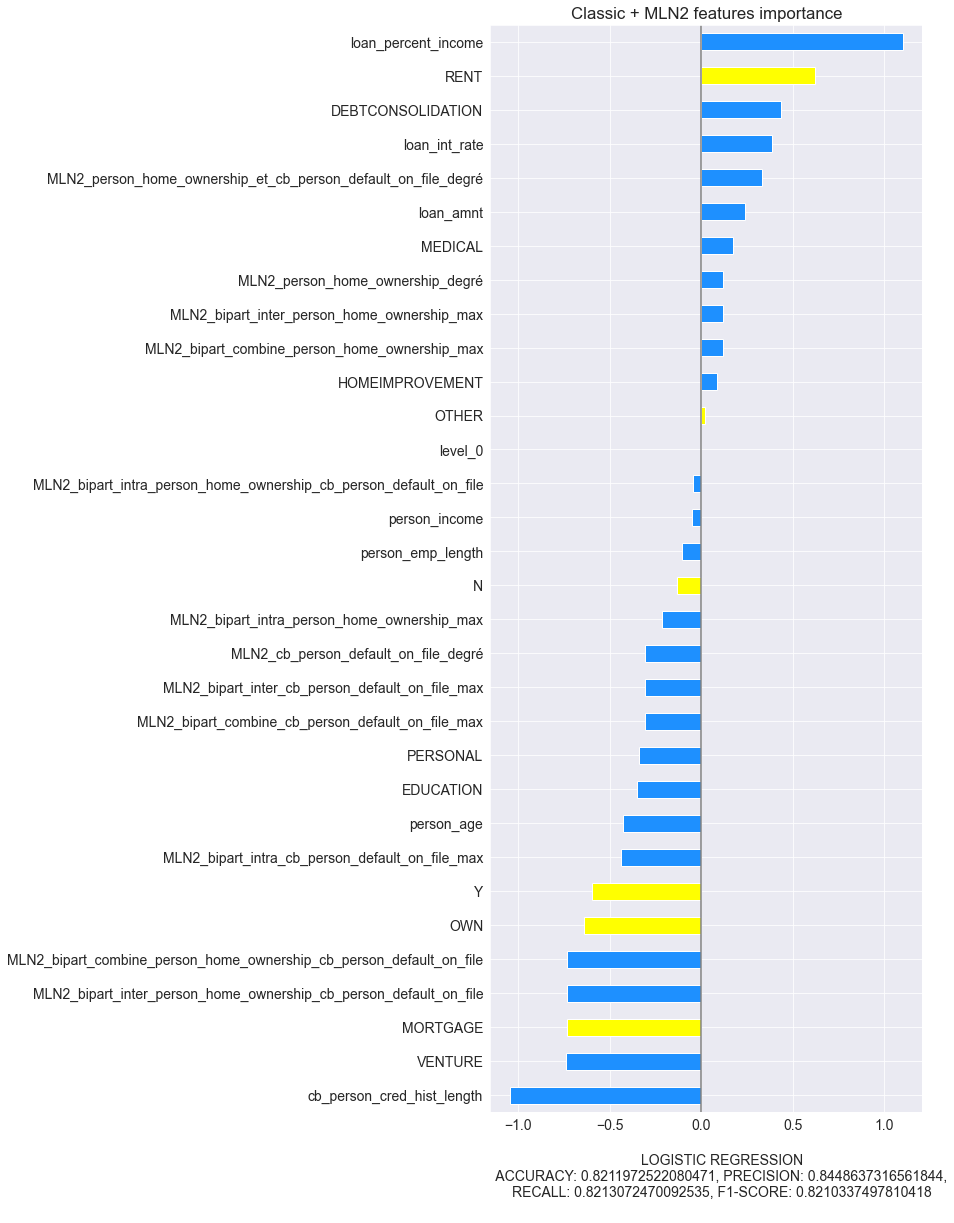

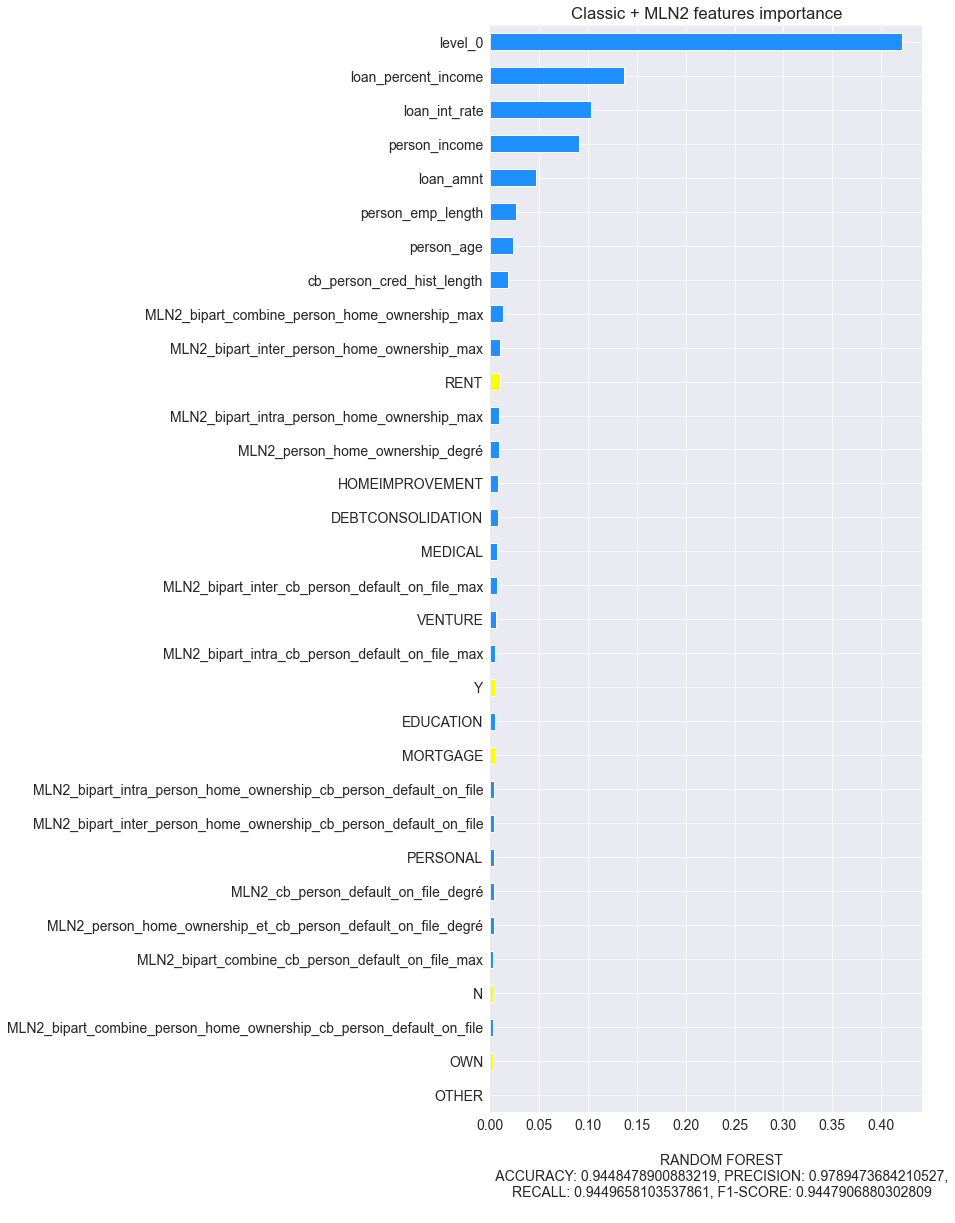

In [135]:
plot_features_importance_as_barh(
    store_mln_2,
    custom_color,
    modelD,
    "Classic + MLN2 features importance",
    [*OHE[0],*OHE[2]]
)

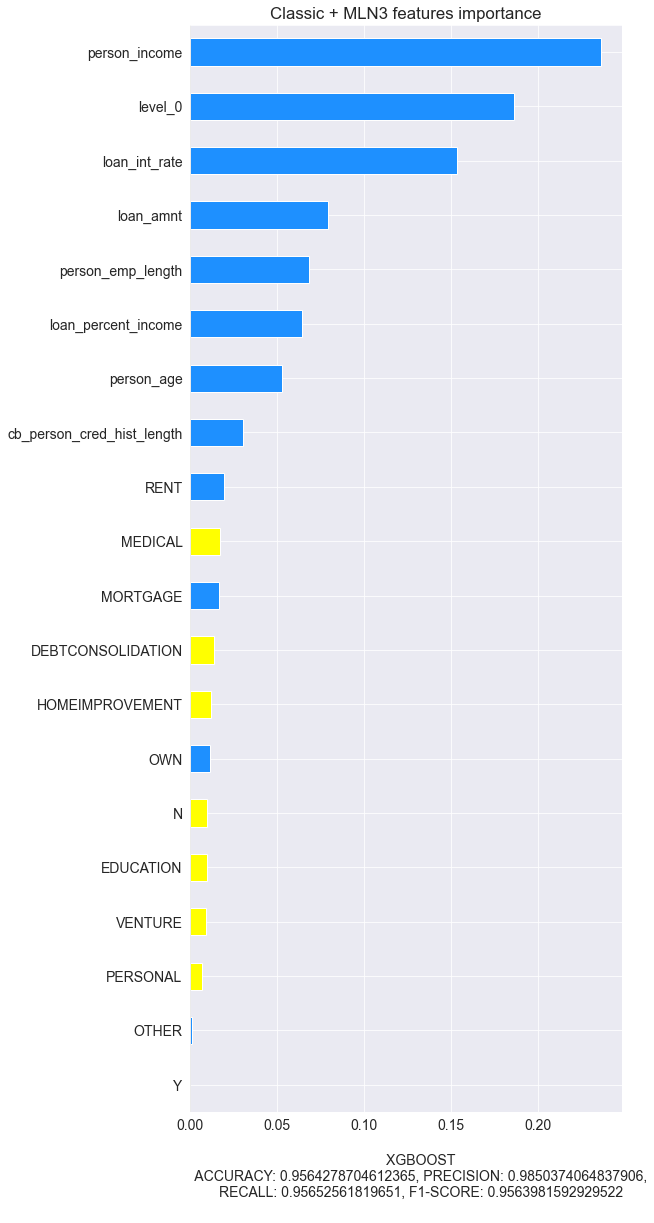

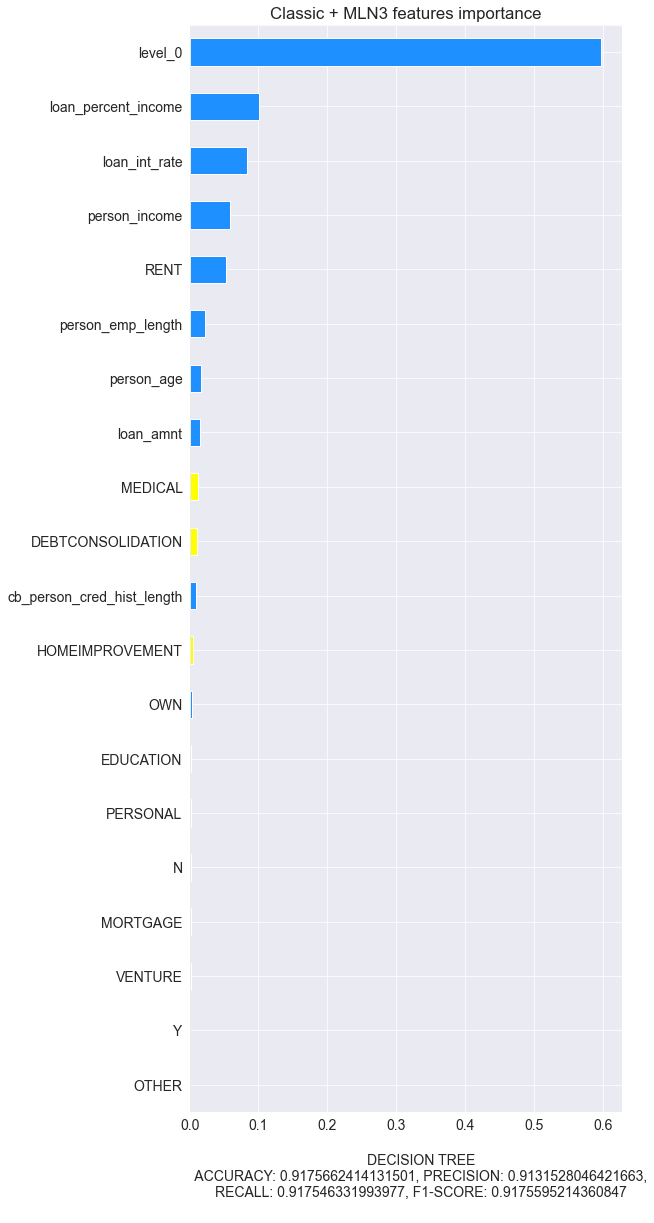

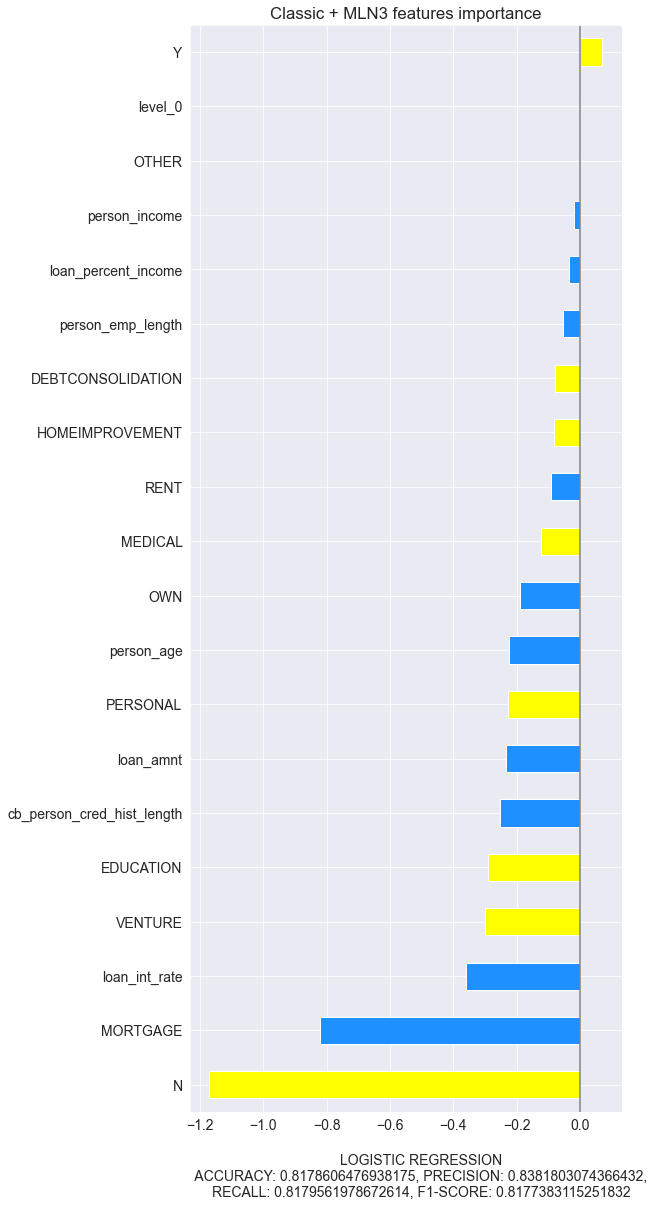

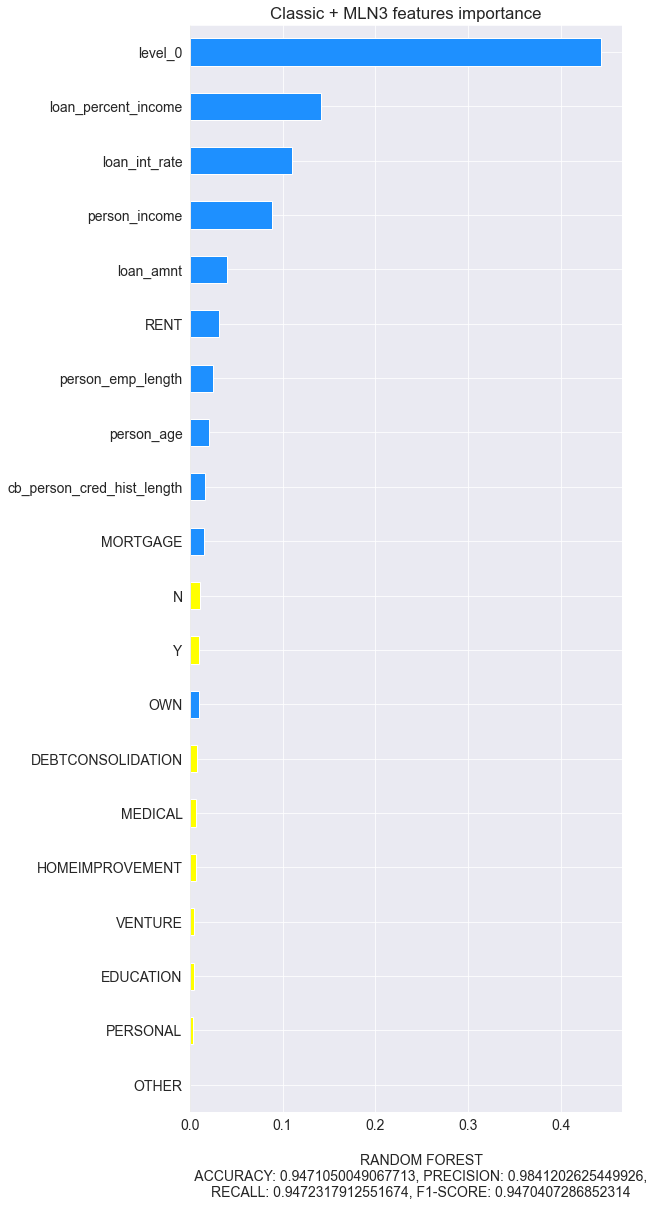

In [136]:
plot_features_importance_as_barh(
    store_mln_3,
    custom_color,
    modelD,
    "Classic + MLN3 features importance",
    [*OHE[1],*OHE[2]]
)

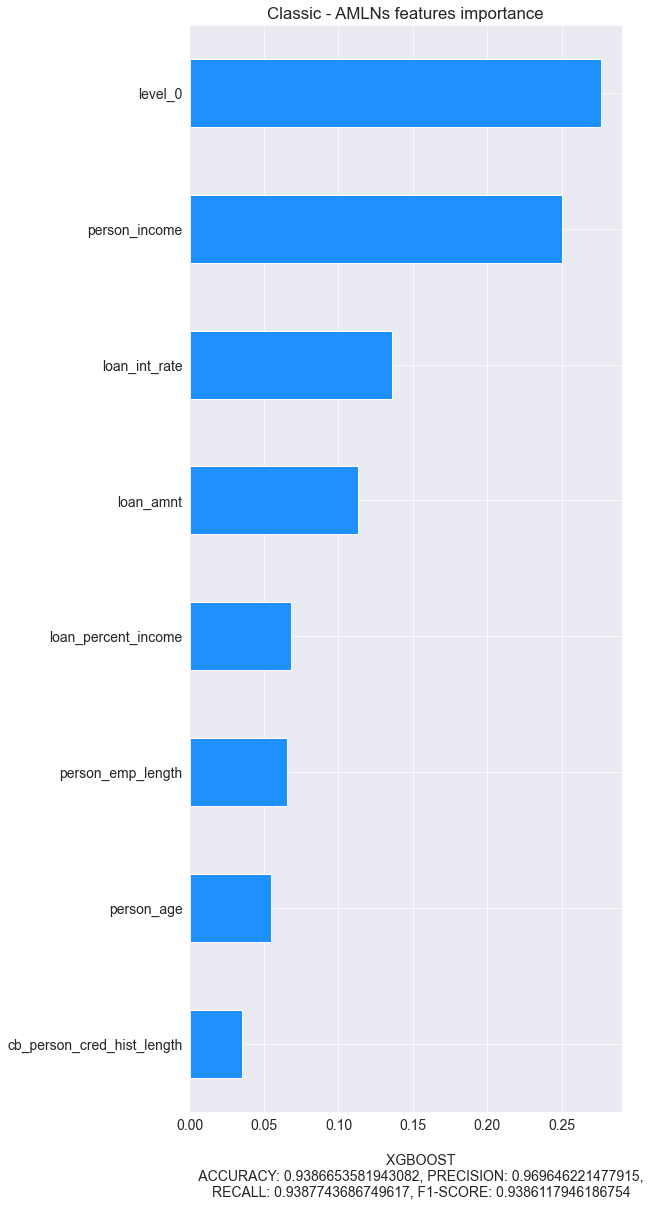

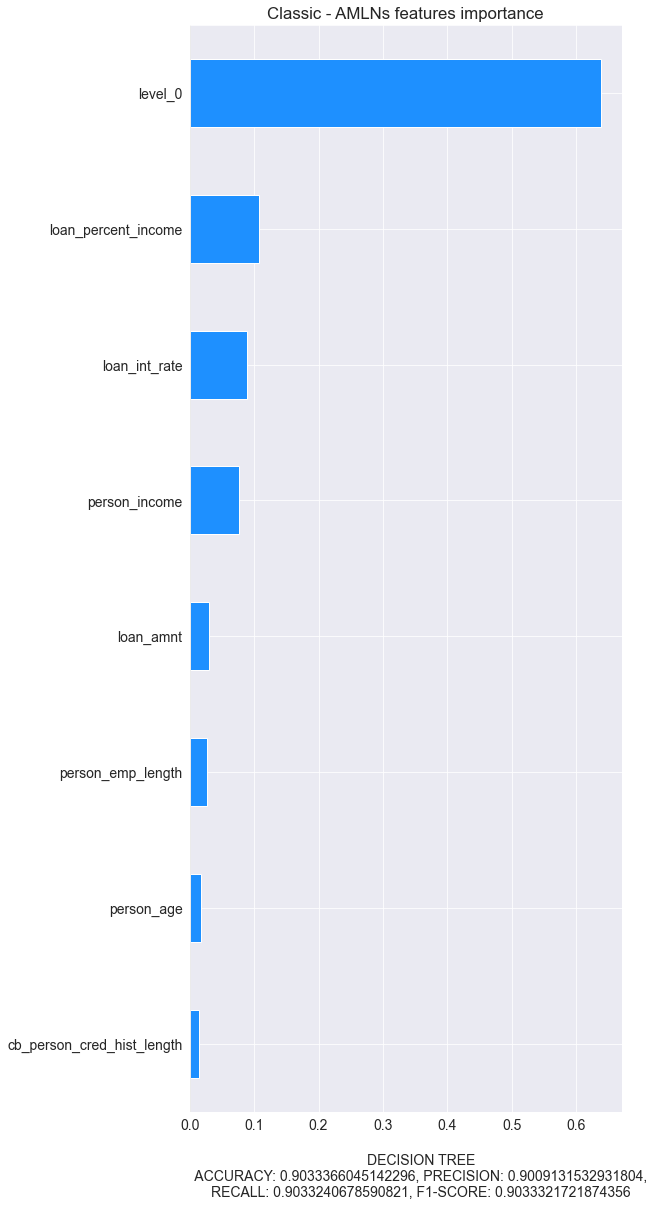

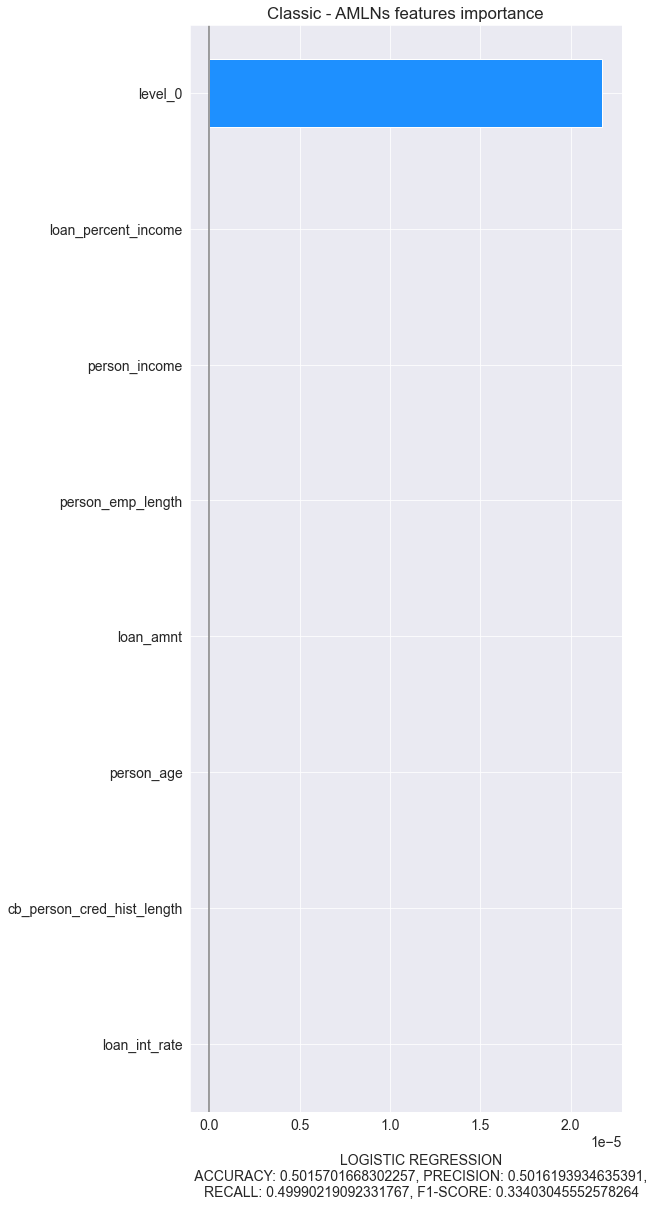

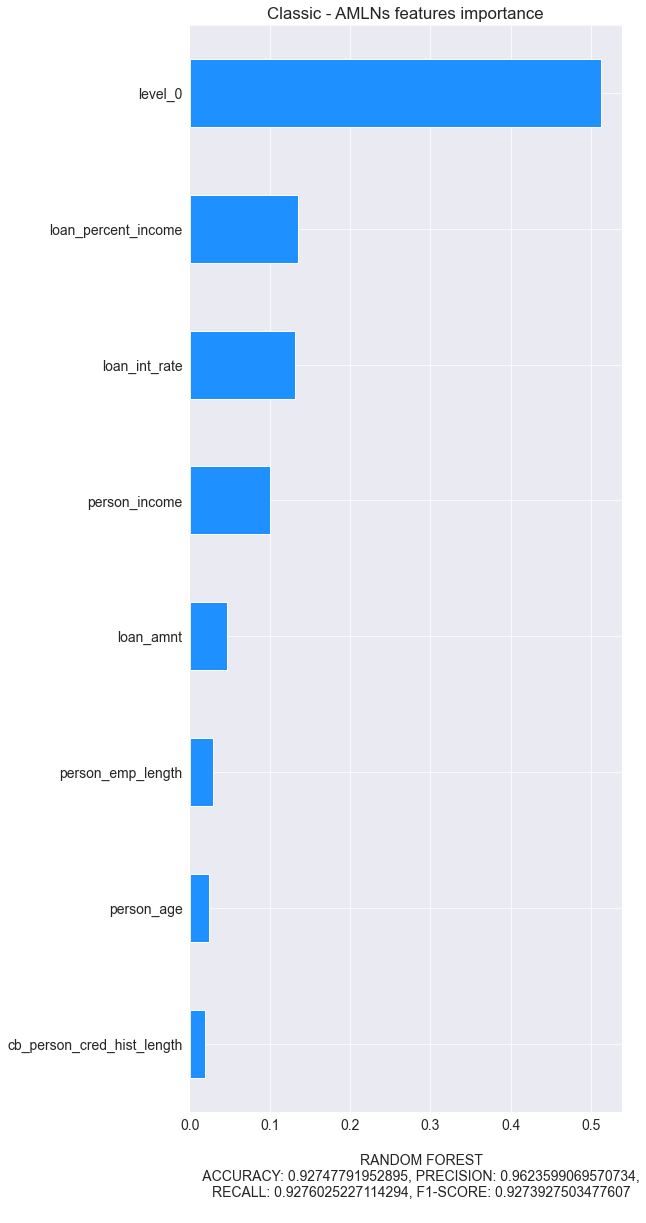

In [137]:
plot_features_importance_as_barh(
    store_amln,
    custom_color,
    modelD,
    "Classic - AMLNs features importance",
)

In [138]:
plot_features_importance_as_barh(
    store_amln_mlns,
    custom_color,
    modelD,
    "Classic - AMLNs + MLNs features importance",
)

NameError: name 'store_amln_mlns' is not defined

# <div style="border-radius:0px; border:#202Fd1 solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">10. Summary</div>

In [139]:
import imgkit

In [145]:
def print_summary(table_list, modelDict):
    baseline = table_list[0][1].index.values.tolist()
    head = '<tr><td></td><td></td><td>Accuracy</td>'+'<td>Precision</td><td>Recall</td><td>F1-score</td></tr>'
    body = ''
    for model in baseline:
        modelLines = f'<tr><td rowspan="{len(table_list)}" >{modelDict[model]}</td>'
        for i, (step,data) in enumerate(table_list):
            modelLines = (
                modelLines + 
                f'<td>{step}</td><td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"accuracy"],4) == max(round(dat.loc[model,"accuracy"],4),round(data.loc[model,"accuracy"],4)) for step, dat in table_list])/len(table_list))} >{round(data.loc[model,"accuracy"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"precision"],4) == max(round(dat.loc[model,"precision"],4),round(data.loc[model,"precision"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"precision"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"recall"],4) == max(round(dat.loc[model,"recall"],4),round(data.loc[model,"recall"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"recall"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"f1-score"],4) == max(round(dat.loc[model,"f1-score"],4),round(data.loc[model,"f1-score"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"f1-score"],4)}</td>'+
                '</tr> <tr >') if i < len(table_list) - 1 else (
                modelLines + 
                f'<td>{step}</td><td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"accuracy"],4) == max(round(dat.loc[model,"accuracy"],4),round(data.loc[model,"accuracy"],4)) for step, dat in table_list])/len(table_list))} >{round(data.loc[model,"accuracy"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"precision"],4) == max(round(dat.loc[model,"precision"],4),round(data.loc[model,"precision"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"precision"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"recall"],4) == max(round(dat.loc[model,"recall"],4),round(data.loc[model,"recall"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"recall"],4)}</td>'+
                f'<td style={"color:blue; font-size: 40px; font-weight: bold;" * int(sum([ round(data.loc[model,"f1-score"],4) == max(round(dat.loc[model,"f1-score"],4),round(data.loc[model,"f1-score"],4)) for step, dat in table_list])/len(table_list))}>{round(data.loc[model,"f1-score"],4)}</td>'+
                '</tr>' )
        body = body + modelLines
    style = '<style>table, th, td {border: 1px solid black;border-collapse: collapse;}</style>'
    table_html = f'<table style="border: 2px solid black; width: 100% !important; background-color: #FFFFFF; color:#000000;">{head}{body}</table>'
    htm = f'<html><head>{style}<title> Summary </title></head><body style="background-color: white;">{table_html}</body></html>'
    return (HTML(htm),htm)



In [155]:

table = print_summary([
    ('classic',store_original),
    #('classic + MLNs',store_mln),
    ('classic + MLN1',store_mln_1),
    ('classic + MLN2',store_mln_2),
    ('classic + MLN3',store_mln_3),
    #('classic - AMLNs',store_amln),
    ('classic - AMLN1',store_c1),
    ('classic - AMLN2',store_c2),
    ('classic - AMLN3',store_c3),
    #('classic - AMLNs + MLNs',store_amln_mlns),
    ('classic - AMLN1 + MLN1',store_c1_mln),
    ('classic - AMLN2 + MLN2',store_c2_mln),
    ('classic - AMLN3 + MLN3',store_c3_mln),
    
],modelD)

Html_file= open("summary.html","w")
Html_file.write(table[1])
Html_file.close()

table[0]

In [156]:

#imgkit.from_file('summary.html', './plots/AFB_summary.png')


In [157]:

table = print_summary([
    ('classic',store_original),
    ('classic + MLN1',store_mln_1),
    ('classic - AMLN1',store_c1),
    ('classic - AMLN1 + MLN1',store_c1_mln),
    
],modelD)

Html_file= open("summary_1.html","w")
Html_file.write(table[1])
Html_file.close()

table[0]

In [158]:

table = print_summary([
    ('classic',store_original),
    ('classic + MLN2',store_mln_2),
    ('classic - AMLN2',store_c2),
    ('classic - AMLN2 + MLN2',store_c2_mln),
    
],modelD)

Html_file= open("summary_2.html","w")
Html_file.write(table[1])
Html_file.close()

table[0]

In [159]:

table = print_summary([
    ('classic',store_original),
    ('classic + MLN3',store_mln_3),
    ('classic - AMLN3',store_c3),
    ('classic - AMLN3 + MLN3',store_c3_mln),
    
],modelD)

Html_file= open("summary_3.html","w")
Html_file.write(table[1])
Html_file.close()

table[0]